# Machine-learning analysis - Balanced dataset - All patients - Only Hugo - q-value < 1

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import seaborn as sns
import os
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

import sklearn
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import shap
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC
import xgboost as xgb

In [2]:
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Occurrence matrix data_definitivo")

In [3]:
# load the occurrence matrix 
occurrence_matrix_TNandNONTN_relgenes_q1 = pd.read_csv('Occurrence_Matrix_TNandNONTNrelgenes_q1_withLabels_ONLYHUGO_definitivo.csv', sep=None, engine='python')

# Set the first column as row indices
occurrence_matrix_TNandNONTN_relgenes_q1 = occurrence_matrix_TNandNONTN_relgenes_q1.set_index(occurrence_matrix_TNandNONTN_relgenes_q1.iloc[:, 0])
# Remove the name of the index column
occurrence_matrix_TNandNONTN_relgenes_q1 = occurrence_matrix_TNandNONTN_relgenes_q1.rename_axis(None, axis='index')
# Drop the first column from the DataFrame
occurrence_matrix_TNandNONTN_relgenes_q1 = occurrence_matrix_TNandNONTN_relgenes_q1.iloc[:, 1:]

occurrence_matrix_TNandNONTN_relgenes_q1

TP53_270_282  PIK3CA_541_542  PIK3CA_345_345  \
brca_smc_2018_BB01_002             0               0               0   
brca_smc_2018_BB01_004             1               0               0   
brca_smc_2018_BB01_005             0               0               0   
brca_smc_2018_BB01_006             0               0               0   
brca_smc_2018_BB01_008             0               0               0   
...                              ...             ...             ...   
MBCProject_xlhkS5CG                0               0               0   
MBCProject_xoHAF6s8                0               0               0   
MBCProject_yZSnSluK                0               0               0   
MBCProject_ygcMFgCR                0               0               0   
MBCProject_zyt5TKFB                0               0               0   

                        PIK3CA_102_113  ZNF195_109_111  MAML3_503_503  \
brca_smc_2018_BB01_002               0               0              0   
brca_smc_2018_BB01_004               0               0              1   
brca_smc_2018_BB01_005               0               0              0   
brca_smc_2018_BB01_006               0               0              0   
brca_smc_2018_BB01_008               0               0              0   
...                                ...             ...            ...   
MBCProject_xlhkS5CG                  0               0              0   
MBCProject_xoHAF6s8                  0               0              0   
MBCProject_yZSnSluK                  0               0              0   
MBCProject_ygcMFgCR                  0               0              0   
MBCProject_zyt5TKFB                  0               0              0   

                        PIK3R1_566_578  ZNF814_303_311  RBM27_719_719  \
brca_smc_2018_BB01_002               0               0              0   
brca_smc_2018_BB01_004               0               0              0   
brca_smc_2018_BB01_005               0               0              0   
brca_smc_2018_BB01_006               0               0              0   
brca_smc_2018_BB01_008               0               0              0   
...                                ...             ...            ...   
MBCProject_xlhkS5CG                  0               0              0   
MBCProject_xoHAF6s8                  0               3              0   
MBCProject_yZSnSluK                  0               0              0   
MBCProject_ygcMFgCR                  0               0              0   
MBCProject_zyt5TKFB                  0               0              0   

                        KRAS_12_12  ...  MTA2_noClust  GAS8_noClust  \
brca_smc_2018_BB01_002           0  ...             0             0   
brca_smc_2018_BB01_004           0  ...             0             0   
brca_smc_2018_BB01_005           0  ...             0             0   
brca_smc_2018_BB01_006           0  ...             0             0   
brca_smc_2018_BB01_008           0  ...             0             0   
...                            ...  ...           ...           ...   
MBCProject_xlhkS5CG              0  ...             0             0   
MBCProject_xoHAF6s8              0  ...             0             0   
MBCProject_yZSnSluK              0  ...             0             0   
MBCProject_ygcMFgCR              0  ...             0             0   
MBCProject_zyt5TKFB              0  ...             0             0   

                        AP1S3_noClust  OR6B1_noClust  PLTP_noClust  \
brca_smc_2018_BB01_002              0              0             0   
brca_smc_2018_BB01_004              0              0             0   
brca_smc_2018_BB01_005              0              0             0   
brca_smc_2018_BB01_006              0              0             0   
brca_smc_2018_BB01_008              0              0             0   
...                               ...            ...           ...   
MBCProject_xlhkS5CG                 0              0          

In [4]:
occurrence_matrix_TNandNONTN_relgenes_q1.loc['brca_smc_2018_BB01_130']

TP53_270_282        0
PIK3CA_541_542      0
PIK3CA_345_345      0
PIK3CA_102_113      0
ZNF195_109_111      0
                   ..
PODXL_noClust       0
HMBS_noClust        0
EIF3C_noClust       0
KRTAP5-1_noClust    0
Target              0
Name: brca_smc_2018_BB01_130, Length: 360, dtype: int64

In [5]:
# SELECT THE PATIENTS

# Extract the row indices as a list
total_patient_indices = occurrence_matrix_TNandNONTN_relgenes_q1.index.tolist()
# Create a new DataFrame with the patient indices
total_patient_indices = pd.DataFrame({'Patient': total_patient_indices})
total_patient_indices

Patient
0     brca_smc_2018_BB01_002
1     brca_smc_2018_BB01_004
2     brca_smc_2018_BB01_005
3     brca_smc_2018_BB01_006
4     brca_smc_2018_BB01_008
...                      ...
1452     MBCProject_xlhkS5CG
1453     MBCProject_xoHAF6s8
1454     MBCProject_yZSnSluK
1455     MBCProject_ygcMFgCR
1456     MBCProject_zyt5TKFB

[1457 rows x 1 columns]

In [6]:
columns_with_all_zeros = (occurrence_matrix_TNandNONTN_relgenes_q1 == 0).all().sum()
columns_with_all_zeros

0

In [7]:
(occurrence_matrix_TNandNONTN_relgenes_q1 == 0).all().sum()

0

There are no rows and no columns with all zero values.

In [8]:
# load the patients you want to keep in the test set 
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Test_patients")
# load the test patients of the encoding 'only cluster'
test_patients_5A = pd.read_csv('Test_pts_5A.txt', sep=',', engine='python')
test_patients_5A

Patient
0    brca_smc_2018_BB01_130
1    brca_smc_2018_BB01_110
2    brca_smc_2018_BB01_037
3    brca_smc_2018_BB01_126
4       brca_smc_2018_BR097
..                      ...
139     MBCProject_27uAugT4
140     MBCProject_2kS5fYc1
141     MBCProject_7oIotZSe
142     MBCProject_LVSjf8h7
143     MBCProject_pktAIxFb

[144 rows x 1 columns]

In [9]:
test_patients_5A_list = test_patients_5A['Patient'].to_list()
test_patients_5A_list

['brca_smc_2018_BB01_130',
 'brca_smc_2018_BB01_110',
 'brca_smc_2018_BB01_037',
 'brca_smc_2018_BB01_126',
 'brca_smc_2018_BR097',
 'brca_smc_2018_BR105',
 'brca_smc_2018_BR145',
 'brca_smc_2018_BR301',
 'brca_smc_2018_BR419',
 'BR-M-045',
 'BR-M-122',
 'PD4133a',
 'PD4252a',
 'X11BR003',
 'X18BR002',
 'X20BR008',
 'TCGA-A2-A04P',
 'TCGA-A2-A0D0',
 'TCGA-A2-A0T2',
 'TCGA-A2-A0YE',
 'TCGA-A2-A1G1',
 'TCGA-A2-A3Y0',
 'TCGA-A7-A0CE',
 'TCGA-A7-A0DA',
 'TCGA-A8-A07O',
 'TCGA-AC-A6IW',
 'TCGA-AN-A0AL',
 'TCGA-AO-A129',
 'TCGA-AR-A0TP',
 'TCGA-AR-A0U0',
 'TCGA-AR-A1AJ',
 'TCGA-B6-A0I1',
 'TCGA-B6-A0I2',
 'TCGA-B6-A409',
 'TCGA-BH-A0AV',
 'TCGA-BH-A0BL',
 'TCGA-BH-A0E0',
 'TCGA-C8-A131',
 'TCGA-C8-A1HJ',
 'TCGA-C8-A27B',
 'TCGA-D8-A142',
 'TCGA-D8-A27F',
 'TCGA-E2-A14N',
 'TCGA-E2-A14R',
 'TCGA-E2-A14Y',
 'TCGA-E2-A573',
 'TCGA-E9-A1N8',
 'TCGA-E9-A243',
 'TCGA-E9-A244',
 'TCGA-OL-A5S0',
 'TCGA-OL-A66I',
 'MBC_85',
 'MBC_93',
 'MBC_120',
 'MBC_132',
 'MBC_142',
 'MBC_163',
 'MBC_167',
 'MBC_

### Study the intersection between these patients and the test patients from 1A and 2A experiments

In [10]:
pd.merge(total_patient_indices, test_patients_5A, how='inner', on=['Patient'])

Patient
0    brca_smc_2018_BB01_017
1    brca_smc_2018_BB01_037
2    brca_smc_2018_BB01_110
3    brca_smc_2018_BB01_126
4    brca_smc_2018_BB01_130
..                      ...
139     MBCProject_LVSjf8h7
140     MBCProject_d5CbUNTb
141     MBCProject_epUYsdCE
142     MBCProject_oqupfDu7
143     MBCProject_pktAIxFb

[144 rows x 1 columns]

All the patients in the 1A (and 2A) dataset are present in the dataset under interest.

In [11]:
# load the patients you want to keep in the training set 
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Training_patients")
# load the test patients of 1C experiment
training_patients_5A = pd.read_csv('Training_pts_5A.txt', sep=',', engine='python')
training_patients_5A

Patient
0              TCGA-AO-A0JB
1              TCGA-BH-A0DZ
2                   PD4128a
3                   PD4203a
4              TCGA-BH-A0BD
..                      ...
425     MBCProject_lQtMtjFR
426     MBCProject_pMcWcrtZ
427     MBCProject_rJHBiKTl
428     MBCProject_wzCxuoio
429  brca_smc_2018_BB01_119

[430 rows x 1 columns]

In [12]:
training_patients_5A_list = training_patients_5A['Patient'].to_list()
training_patients_5A_list

['TCGA-AO-A0JB',
 'TCGA-BH-A0DZ',
 'PD4128a',
 'PD4203a',
 'TCGA-BH-A0BD',
 'TCGA-E9-A22E',
 'MBC_118',
 'TCGA-E9-A22H',
 'X11BR031',
 'TCGA-D8-A1X5',
 'brca_smc_2018_BR107',
 'brca_smc_2018_BR206',
 'MBCProject_kzuMSZIW',
 'X18BR009',
 'MBC_17',
 'PD4076a',
 'BR-V-070',
 'TCGA-AN-A0G0',
 'TCGA-A2-A0CS',
 'MBCProject_5gHasou8',
 'TCGA-AN-A0AJ',
 'MBC_154',
 'TCGA-V7-A7HQ',
 'TCGA-D8-A13Z',
 'TCGA-A8-A095',
 'TCGA-BH-A0B1',
 'TCGA-E2-A155',
 'X20BR002',
 'TCGA-GM-A2DL',
 'TCGA-E2-A1L7',
 'TCGA-BH-A0DD',
 'TCGA-D8-A1JD',
 'X01BR030',
 'TCGA-EW-A1P5',
 'BR-V-037',
 'TCGA-AN-A0FT',
 'TCGA-BH-A0EE',
 'TCGA-AN-A049',
 'brca_smc_2018_BB01_023',
 'TCGA-LL-A740',
 'brca_smc_2018_BB01_120',
 'TCGA-C8-A26Y',
 'TCGA-AR-A0U3',
 'BR-M-120',
 'brca_smc_2018_BB01_111',
 'TCGA-A8-A096',
 'TCGA-C8-A130',
 'brca_smc_2018_BR205',
 'MBCProject_yZSnSluK',
 'TCGA-C8-A12Z',
 'TCGA-B6-A0I8',
 'TCGA-GM-A2DK',
 'TCGA-D8-A27L',
 'MBCProject_ErfKfJt0',
 'PD4001a',
 'TCGA-A2-A0CU',
 'MBCProject_EWubi6hd',
 'PD4104a

### Check if there are patients with no features (zero rows) and mutations not present in any patient (zero columns)

In [13]:
patient_target = occurrence_matrix_TNandNONTN_relgenes_q1[['Target']]
patient_target

Target
brca_smc_2018_BB01_002       0
brca_smc_2018_BB01_004       1
brca_smc_2018_BB01_005       0
brca_smc_2018_BB01_006       0
brca_smc_2018_BB01_008       0
...                        ...
MBCProject_xlhkS5CG          0
MBCProject_xoHAF6s8          0
MBCProject_yZSnSluK          0
MBCProject_ygcMFgCR          0
MBCProject_zyt5TKFB          0

[1457 rows x 1 columns]

In [14]:
occurrence_matrix_without_target = occurrence_matrix_TNandNONTN_relgenes_q1.drop('Target', axis=1)
occurrence_matrix_without_target

TP53_270_282  PIK3CA_541_542  PIK3CA_345_345  \
brca_smc_2018_BB01_002             0               0               0   
brca_smc_2018_BB01_004             1               0               0   
brca_smc_2018_BB01_005             0               0               0   
brca_smc_2018_BB01_006             0               0               0   
brca_smc_2018_BB01_008             0               0               0   
...                              ...             ...             ...   
MBCProject_xlhkS5CG                0               0               0   
MBCProject_xoHAF6s8                0               0               0   
MBCProject_yZSnSluK                0               0               0   
MBCProject_ygcMFgCR                0               0               0   
MBCProject_zyt5TKFB                0               0               0   

                        PIK3CA_102_113  ZNF195_109_111  MAML3_503_503  \
brca_smc_2018_BB01_002               0               0              0   
brca_smc_2018_BB01_004               0               0              1   
brca_smc_2018_BB01_005               0               0              0   
brca_smc_2018_BB01_006               0               0              0   
brca_smc_2018_BB01_008               0               0              0   
...                                ...             ...            ...   
MBCProject_xlhkS5CG                  0               0              0   
MBCProject_xoHAF6s8                  0               0              0   
MBCProject_yZSnSluK                  0               0              0   
MBCProject_ygcMFgCR                  0               0              0   
MBCProject_zyt5TKFB                  0               0              0   

                        PIK3R1_566_578  ZNF814_303_311  RBM27_719_719  \
brca_smc_2018_BB01_002               0               0              0   
brca_smc_2018_BB01_004               0               0              0   
brca_smc_2018_BB01_005               0               0              0   
brca_smc_2018_BB01_006               0               0              0   
brca_smc_2018_BB01_008               0               0              0   
...                                ...             ...            ...   
MBCProject_xlhkS5CG                  0               0              0   
MBCProject_xoHAF6s8                  0               3              0   
MBCProject_yZSnSluK                  0               0              0   
MBCProject_ygcMFgCR                  0               0              0   
MBCProject_zyt5TKFB                  0               0              0   

                        KRAS_12_12  ...  CDC73_noClust  MTA2_noClust  \
brca_smc_2018_BB01_002           0  ...              0             0   
brca_smc_2018_BB01_004           0  ...              0             0   
brca_smc_2018_BB01_005           0  ...              0             0   
brca_smc_2018_BB01_006           0  ...              0             0   
brca_smc_2018_BB01_008           0  ...              0             0   
...                            ...  ...            ...           ...   
MBCProject_xlhkS5CG              0  ...              0             0   
MBCProject_xoHAF6s8              0  ...              0             0   
MBCProject_yZSnSluK              0  ...              0             0   
MBCProject_ygcMFgCR              0  ...              0             0   
MBCProject_zyt5TKFB              0  ...              0             0   

                        GAS8_noClust  AP1S3_noClust  OR6B1_noClust  \
brca_smc_2018_BB01_002             0              0              0   
brca_smc_2018_BB01_004             0              0              0   
brca_smc_2018_BB01_005             0              0              0   
brca_smc_2018_BB01_006             0              0              0   
brca_smc_2018_BB01_008             0              0              0   
...                              ...            ...            ...   
MBCProject_xlhkS5CG                0              

In [15]:
zero_rows = occurrence_matrix_without_target[(occurrence_matrix_without_target == 0).all(axis=1)]
zero_rows

Empty DataFrame
Columns: [TP53_270_282, PIK3CA_541_542, PIK3CA_345_345, PIK3CA_102_113, ZNF195_109_111, MAML3_503_503, PIK3R1_566_578, ZNF814_303_311, RBM27_719_719, KRAS_12_12, ZKSCAN1_270_270, GATA3_308_335, GATA3_406_408, GATA3_429_434, MTMR12_520_521, ZNF208_548_549, FAM208B_805_805, PRB2_81_81, ERBB2_767_777, SF3B1_700_700, FOXA1_254_268, NUP93_14_15, CTCF_283_288, MYL10_26_26, ESR1_380_380, ESR1_537_538, PIK3CA_545_546, PIK3CA_1046_1047, AKT1_17_17, TP53_191_199, TP53_236_258, TP53_173_177, USP8_523_523, RUNX1_122_123, TBX3_210_218, CHD9_2120_2120, ZNF19_280_280, COL17A1_90_106, ERBB3_928_928, ABCG2_22_32, FAM193A_1170_1214, RCC2_271_278, PTEN_317_318, FHDC1_57_57, TP53_211_218, FGFR2_549_549, DAP3_331_331, MAP4K3_395_415, PTEN_128_131, PIK3CA_418_420, TP53_noClust, PIK3CA_noClust, MAML3_noClust, SF3B4_noClust, NF1_noClust, ACACB_noClust, CXorf38_noClust, COL5A3_noClust, KMT2C_noClust, PTEN_noClust, ZNF19_noClust, GPRIN1_noClust, NIPBL_noClust, ITPKB_noClust, FBRSL1_noClust, PALB2_noClust, CBFB_noClust, ARID1A_noClust, JMJD6_noClust, ZNF546_noClust, SEC63_noClust, GATA3_noClust, COL17A1_noClust, NOTCH2_noClust, CFTR_noClust, RAD54B_noClust, PNN_noClust, SPEN_noClust, DNAH12_noClust, PRB2_noClust, ERBB2_noClust, MAP2K4_noClust, ASH1L_noClust, PODXL2_noClust, TUBD1_noClust, FOXA1_noClust, KIAA1109_noClust, RSBN1L_noClust, CTCF_noClust, HIST1H3B_noClust, SZT2_noClust, MTHFD1L_noClust, DOCK11_noClust, IL31RA_noClust, FBXO18_noClust, MCRS1_noClust, SNX16_noClust, OSBPL8_noClust, ZC3H4_noClust, AKT1_noClust, ...]
Index: []

[0 rows x 359 columns]

There aren't patients with zero mutations.

In [16]:
# separate the class 0 (non TN) from the class 1 (TN)

# class count
class_count_0, class_count_1 = occurrence_matrix_TNandNONTN_relgenes_q1['Target'].value_counts()

In [17]:
class_count_0

1170

In [18]:
class_count_1

287

In [19]:
# Separate class
class_0 = occurrence_matrix_TNandNONTN_relgenes_q1[occurrence_matrix_TNandNONTN_relgenes_q1['Target'] == 0]
class_1 = occurrence_matrix_TNandNONTN_relgenes_q1[occurrence_matrix_TNandNONTN_relgenes_q1['Target'] == 1] # print the shape of the class
print('Target 0 - Non TN:', class_0.shape)
print('Target 1 - TN:', class_1.shape)

Target 0 - Non TN: (1170, 360)
Target 1 - TN: (287, 360)


In [20]:
# Non Triple-Negative patients (the patients without mutations in the considered genes have been dropped out) 
class_0

TP53_270_282  PIK3CA_541_542  PIK3CA_345_345  \
brca_smc_2018_BB01_002             0               0               0   
brca_smc_2018_BB01_005             0               0               0   
brca_smc_2018_BB01_006             0               0               0   
brca_smc_2018_BB01_008             0               0               0   
brca_smc_2018_BB01_009             0               0               0   
...                              ...             ...             ...   
MBCProject_xlhkS5CG                0               0               0   
MBCProject_xoHAF6s8                0               0               0   
MBCProject_yZSnSluK                0               0               0   
MBCProject_ygcMFgCR                0               0               0   
MBCProject_zyt5TKFB                0               0               0   

                        PIK3CA_102_113  ZNF195_109_111  MAML3_503_503  \
brca_smc_2018_BB01_002               0               0              0   
brca_smc_2018_BB01_005               0               0              0   
brca_smc_2018_BB01_006               0               0              0   
brca_smc_2018_BB01_008               0               0              0   
brca_smc_2018_BB01_009               0               0              0   
...                                ...             ...            ...   
MBCProject_xlhkS5CG                  0               0              0   
MBCProject_xoHAF6s8                  0               0              0   
MBCProject_yZSnSluK                  0               0              0   
MBCProject_ygcMFgCR                  0               0              0   
MBCProject_zyt5TKFB                  0               0              0   

                        PIK3R1_566_578  ZNF814_303_311  RBM27_719_719  \
brca_smc_2018_BB01_002               0               0              0   
brca_smc_2018_BB01_005               0               0              0   
brca_smc_2018_BB01_006               0               0              0   
brca_smc_2018_BB01_008               0               0              0   
brca_smc_2018_BB01_009               0               0              0   
...                                ...             ...            ...   
MBCProject_xlhkS5CG                  0               0              0   
MBCProject_xoHAF6s8                  0               3              0   
MBCProject_yZSnSluK                  0               0              0   
MBCProject_ygcMFgCR                  0               0              0   
MBCProject_zyt5TKFB                  0               0              0   

                        KRAS_12_12  ...  MTA2_noClust  GAS8_noClust  \
brca_smc_2018_BB01_002           0  ...             0             0   
brca_smc_2018_BB01_005           0  ...             0             0   
brca_smc_2018_BB01_006           0  ...             0             0   
brca_smc_2018_BB01_008           0  ...             0             0   
brca_smc_2018_BB01_009           0  ...             0             0   
...                            ...  ...           ...           ...   
MBCProject_xlhkS5CG              0  ...             0             0   
MBCProject_xoHAF6s8              0  ...             0             0   
MBCProject_yZSnSluK              0  ...             0             0   
MBCProject_ygcMFgCR              0  ...             0             0   
MBCProject_zyt5TKFB              0  ...             0             0   

                        AP1S3_noClust  OR6B1_noClust  PLTP_noClust  \
brca_smc_2018_BB01_002              0              0             0   
brca_smc_2018_BB01_005              0              0             0   
brca_smc_2018_BB01_006              0              0             0   
brca_smc_2018_BB01_008              0              0             0   
brca_smc_2018_BB01_009              0              0             0   
...                               ...            ...           ...   
MBCProject_xlhkS5CG                 0              0          

In [21]:
# Triple-Negative patients 
class_1

TP53_270_282  PIK3CA_541_542  PIK3CA_345_345  \
brca_smc_2018_BB01_004             1               0               0   
brca_smc_2018_BB01_022             0               0               0   
brca_smc_2018_BB01_026             0               0               0   
brca_smc_2018_BB01_035             0               0               0   
brca_smc_2018_BB01_037             0               0               0   
...                              ...             ...             ...   
MBCProject_lQtMtjFR                0               0               0   
MBCProject_oqupfDu7                0               0               0   
MBCProject_pMcWcrtZ                0               0               0   
MBCProject_rJHBiKTl                0               0               0   
MBCProject_wzCxuoio                0               0               0   

                        PIK3CA_102_113  ZNF195_109_111  MAML3_503_503  \
brca_smc_2018_BB01_004               0               0              1   
brca_smc_2018_BB01_022               0               0              0   
brca_smc_2018_BB01_026               0               0              0   
brca_smc_2018_BB01_035               0               0              0   
brca_smc_2018_BB01_037               0               0              0   
...                                ...             ...            ...   
MBCProject_lQtMtjFR                  0               0              0   
MBCProject_oqupfDu7                  0               0              0   
MBCProject_pMcWcrtZ                  0               0              0   
MBCProject_rJHBiKTl                  0               0              0   
MBCProject_wzCxuoio                  0               0              0   

                        PIK3R1_566_578  ZNF814_303_311  RBM27_719_719  \
brca_smc_2018_BB01_004               0               0              0   
brca_smc_2018_BB01_022               0               0              0   
brca_smc_2018_BB01_026               0               0              0   
brca_smc_2018_BB01_035               0               0              0   
brca_smc_2018_BB01_037               0               0              0   
...                                ...             ...            ...   
MBCProject_lQtMtjFR                  0               0              0   
MBCProject_oqupfDu7                  0               0              0   
MBCProject_pMcWcrtZ                  0               0              0   
MBCProject_rJHBiKTl                  0               0              0   
MBCProject_wzCxuoio                  0               0              0   

                        KRAS_12_12  ...  MTA2_noClust  GAS8_noClust  \
brca_smc_2018_BB01_004           0  ...             0             0   
brca_smc_2018_BB01_022           0  ...             0             0   
brca_smc_2018_BB01_026           0  ...             0             0   
brca_smc_2018_BB01_035           0  ...             0             0   
brca_smc_2018_BB01_037           0  ...             0             0   
...                            ...  ...           ...           ...   
MBCProject_lQtMtjFR              0  ...             0             0   
MBCProject_oqupfDu7              0  ...             0             0   
MBCProject_pMcWcrtZ              0  ...             0             0   
MBCProject_rJHBiKTl              0  ...             0             0   
MBCProject_wzCxuoio              0  ...             0             0   

                        AP1S3_noClust  OR6B1_noClust  PLTP_noClust  \
brca_smc_2018_BB01_004              0              0             0   
brca_smc_2018_BB01_022              0              0             0   
brca_smc_2018_BB01_026              0              0             0   
brca_smc_2018_BB01_035              0              0             0   
brca_smc_2018_BB01_037              0              0             0   
...                               ...            ...           ...   
MBCProject_lQtMtjFR                 0              0          

In [22]:
class_1.sum(axis=1).head(30)

brca_smc_2018_BB01_004    3
brca_smc_2018_BB01_022    2
brca_smc_2018_BB01_026    6
brca_smc_2018_BB01_035    2
brca_smc_2018_BB01_037    6
brca_smc_2018_BB01_040    2
brca_smc_2018_BB01_041    3
brca_smc_2018_BB01_044    4
brca_smc_2018_BB01_059    3
brca_smc_2018_BB01_067    5
brca_smc_2018_BB01_074    3
brca_smc_2018_BB01_079    5
brca_smc_2018_BB01_094    5
brca_smc_2018_BB01_099    3
brca_smc_2018_BB01_109    2
brca_smc_2018_BB01_110    2
brca_smc_2018_BB01_119    6
brca_smc_2018_BB01_126    2
brca_smc_2018_BR017       3
brca_smc_2018_BR041       4
brca_smc_2018_BR091       4
brca_smc_2018_BR094       2
brca_smc_2018_BR097       4
brca_smc_2018_BR105       2
brca_smc_2018_BR108       3
brca_smc_2018_BR145       5
brca_smc_2018_BR164       5
brca_smc_2018_BR200       3
brca_smc_2018_BR301       2
brca_smc_2018_BR313       3
dtype: int64

In [23]:
# select the training patients from the initial occurrence matrix 
occurrence_matrix_training = occurrence_matrix_TNandNONTN_relgenes_q1.loc[training_patients_5A_list]
occurrence_matrix_training

TP53_270_282  PIK3CA_541_542  PIK3CA_345_345  \
TCGA-AO-A0JB                       0               0               0   
TCGA-BH-A0DZ                       0               0               0   
PD4128a                            0               0               0   
PD4203a                            0               0               0   
TCGA-BH-A0BD                       0               0               0   
...                              ...             ...             ...   
MBCProject_lQtMtjFR                0               0               0   
MBCProject_pMcWcrtZ                0               0               0   
MBCProject_rJHBiKTl                0               0               0   
MBCProject_wzCxuoio                0               0               0   
brca_smc_2018_BB01_119             0               0               0   

                        PIK3CA_102_113  ZNF195_109_111  MAML3_503_503  \
TCGA-AO-A0JB                         0               0              0   
TCGA-BH-A0DZ                         0               0              0   
PD4128a                              0               0              0   
PD4203a                              0               0              0   
TCGA-BH-A0BD                         0               0              0   
...                                ...             ...            ...   
MBCProject_lQtMtjFR                  0               0              0   
MBCProject_pMcWcrtZ                  0               0              0   
MBCProject_rJHBiKTl                  0               0              0   
MBCProject_wzCxuoio                  0               0              0   
brca_smc_2018_BB01_119               0               0              0   

                        PIK3R1_566_578  ZNF814_303_311  RBM27_719_719  \
TCGA-AO-A0JB                         0               0              0   
TCGA-BH-A0DZ                         0               0              0   
PD4128a                              0               0              0   
PD4203a                              0               0              0   
TCGA-BH-A0BD                         0               0              0   
...                                ...             ...            ...   
MBCProject_lQtMtjFR                  0               0              0   
MBCProject_pMcWcrtZ                  0               0              0   
MBCProject_rJHBiKTl                  0               0              0   
MBCProject_wzCxuoio                  0               0              0   
brca_smc_2018_BB01_119               0               0              0   

                        KRAS_12_12  ...  MTA2_noClust  GAS8_noClust  \
TCGA-AO-A0JB                     0  ...             0             0   
TCGA-BH-A0DZ                     0  ...             0             0   
PD4128a                          0  ...             0             0   
PD4203a                          0  ...             0             0   
TCGA-BH-A0BD                     0  ...             0             0   
...                            ...  ...           ...           ...   
MBCProject_lQtMtjFR              0  ...             0             0   
MBCProject_pMcWcrtZ              0  ...             0             0   
MBCProject_rJHBiKTl              0  ...             0             0   
MBCProject_wzCxuoio              0  ...             0             0   
brca_smc_2018_BB01_119           0  ...             0             0   

                        AP1S3_noClust  OR6B1_noClust  PLTP_noClust  \
TCGA-AO-A0JB                        0              0             0   
TCGA-BH-A0DZ                        0              0             0   
PD4128a                             0              0             0   
PD4203a                             0              0             0   
TCGA-BH-A0BD                        0              0             0   
...                               ...            ...           ...   
MBCProject_lQtMtjFR                 0              0          

In [24]:
occurrence_matrix_training['Target'].value_counts()

Target
0    215
1    215
Name: count, dtype: int64

In [25]:
# select the test patients from the initial occurrence matrix 
occurrence_matrix_test = occurrence_matrix_TNandNONTN_relgenes_q1.loc[test_patients_5A_list]
occurrence_matrix_test

TP53_270_282  PIK3CA_541_542  PIK3CA_345_345  \
brca_smc_2018_BB01_130             0               0               0   
brca_smc_2018_BB01_110             0               0               0   
brca_smc_2018_BB01_037             0               0               0   
brca_smc_2018_BB01_126             1               0               0   
brca_smc_2018_BR097                0               0               0   
...                              ...             ...             ...   
MBCProject_27uAugT4                0               0               0   
MBCProject_2kS5fYc1                0               0               0   
MBCProject_7oIotZSe                0               0               0   
MBCProject_LVSjf8h7                0               0               0   
MBCProject_pktAIxFb                0               0               0   

                        PIK3CA_102_113  ZNF195_109_111  MAML3_503_503  \
brca_smc_2018_BB01_130               0               0              0   
brca_smc_2018_BB01_110               0               0              0   
brca_smc_2018_BB01_037               0               0              0   
brca_smc_2018_BB01_126               0               0              0   
brca_smc_2018_BR097                  0               0              0   
...                                ...             ...            ...   
MBCProject_27uAugT4                  0               0              0   
MBCProject_2kS5fYc1                  0               0              0   
MBCProject_7oIotZSe                  0               0              0   
MBCProject_LVSjf8h7                  0               0              0   
MBCProject_pktAIxFb                  0               0              0   

                        PIK3R1_566_578  ZNF814_303_311  RBM27_719_719  \
brca_smc_2018_BB01_130               0               0              0   
brca_smc_2018_BB01_110               0               0              0   
brca_smc_2018_BB01_037               0               0              0   
brca_smc_2018_BB01_126               0               0              0   
brca_smc_2018_BR097                  0               0              0   
...                                ...             ...            ...   
MBCProject_27uAugT4                  0               0              0   
MBCProject_2kS5fYc1                  0               0              0   
MBCProject_7oIotZSe                  0               0              0   
MBCProject_LVSjf8h7                  0               0              0   
MBCProject_pktAIxFb                  0               0              0   

                        KRAS_12_12  ...  MTA2_noClust  GAS8_noClust  \
brca_smc_2018_BB01_130           0  ...             0             0   
brca_smc_2018_BB01_110           0  ...             0             0   
brca_smc_2018_BB01_037           0  ...             0             0   
brca_smc_2018_BB01_126           0  ...             0             0   
brca_smc_2018_BR097              0  ...             0             0   
...                            ...  ...           ...           ...   
MBCProject_27uAugT4              0  ...             0             0   
MBCProject_2kS5fYc1              0  ...             0             0   
MBCProject_7oIotZSe              0  ...             0             0   
MBCProject_LVSjf8h7              0  ...             0             0   
MBCProject_pktAIxFb              0  ...             0             0   

                        AP1S3_noClust  OR6B1_noClust  PLTP_noClust  \
brca_smc_2018_BB01_130              0              0             0   
brca_smc_2018_BB01_110              0              0             0   
brca_smc_2018_BB01_037              0              0             0   
brca_smc_2018_BB01_126              0              0             0   
brca_smc_2018_BR097                 0              0             0   
...                               ...            ...           ...   
MBCProject_27uAugT4                 0              0          

In [26]:
occurrence_matrix_test['Target'].value_counts()

Target
0    72
1    72
Name: count, dtype: int64

In [27]:
occurrence_matrix_BALANCED = pd.concat([occurrence_matrix_training, occurrence_matrix_test], axis=0)
occurrence_matrix_BALANCED

TP53_270_282  PIK3CA_541_542  PIK3CA_345_345  \
TCGA-AO-A0JB                    0               0               0   
TCGA-BH-A0DZ                    0               0               0   
PD4128a                         0               0               0   
PD4203a                         0               0               0   
TCGA-BH-A0BD                    0               0               0   
...                           ...             ...             ...   
MBCProject_27uAugT4             0               0               0   
MBCProject_2kS5fYc1             0               0               0   
MBCProject_7oIotZSe             0               0               0   
MBCProject_LVSjf8h7             0               0               0   
MBCProject_pktAIxFb             0               0               0   

                     PIK3CA_102_113  ZNF195_109_111  MAML3_503_503  \
TCGA-AO-A0JB                      0               0              0   
TCGA-BH-A0DZ                      0               0              0   
PD4128a                           0               0              0   
PD4203a                           0               0              0   
TCGA-BH-A0BD                      0               0              0   
...                             ...             ...            ...   
MBCProject_27uAugT4               0               0              0   
MBCProject_2kS5fYc1               0               0              0   
MBCProject_7oIotZSe               0               0              0   
MBCProject_LVSjf8h7               0               0              0   
MBCProject_pktAIxFb               0               0              0   

                     PIK3R1_566_578  ZNF814_303_311  RBM27_719_719  \
TCGA-AO-A0JB                      0               0              0   
TCGA-BH-A0DZ                      0               0              0   
PD4128a                           0               0              0   
PD4203a                           0               0              0   
TCGA-BH-A0BD                      0               0              0   
...                             ...             ...            ...   
MBCProject_27uAugT4               0               0              0   
MBCProject_2kS5fYc1               0               0              0   
MBCProject_7oIotZSe               0               0              0   
MBCProject_LVSjf8h7               0               0              0   
MBCProject_pktAIxFb               0               0              0   

                     KRAS_12_12  ...  MTA2_noClust  GAS8_noClust  \
TCGA-AO-A0JB                  0  ...             0             0   
TCGA-BH-A0DZ                  0  ...             0             0   
PD4128a                       0  ...             0             0   
PD4203a                       0  ...             0             0   
TCGA-BH-A0BD                  0  ...             0             0   
...                         ...  ...           ...           ...   
MBCProject_27uAugT4           0  ...             0             0   
MBCProject_2kS5fYc1           0  ...             0             0   
MBCProject_7oIotZSe           0  ...             0             0   
MBCProject_LVSjf8h7           0  ...             0             0   
MBCProject_pktAIxFb           0  ...             0             0   

                     AP1S3_noClust  OR6B1_noClust  PLTP_noClust  \
TCGA-AO-A0JB                     0              0             0   
TCGA-BH-A0DZ                     0              0             0   
PD4128a                          0              0             0   
PD4203a                          0              0             0   
TCGA-BH-A0BD                     0              0             0   
...                            ...            ...           ...   
MBCProject_27uAugT4              0              0             0   
MBCProject_2kS5fYc1              0              0             0   
MBCProject_7oIotZSe              0              0             0   
MBCProject_LVSjf8h7    

total class of 1 and 0: Target
0    287
1    287
Name: count, dtype: int64


<Axes: title={'center': 'Count (target) - Balanced dataset - Total TN and non TN genes'}, xlabel='Target'>

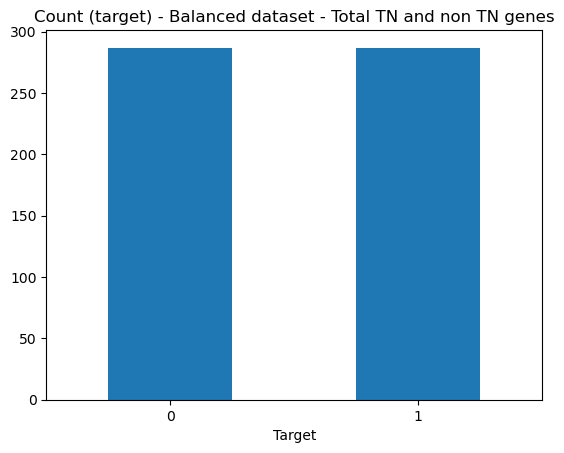

In [28]:
print("total class of 1 and 0:",occurrence_matrix_BALANCED['Target'].value_counts())# plot the count after under-sampling
occurrence_matrix_BALANCED['Target'].value_counts().plot(kind='bar', title='Count (target) - Balanced dataset - Total TN and non TN genes', rot=360)

In [29]:
occurrence_matrix_BALANCED.index.duplicated().sum()

0

In [30]:
occurrence_matrix_BALANCED.sum(axis=0)

TP53_270_282         50
PIK3CA_541_542       14
PIK3CA_345_345       13
PIK3CA_102_113       10
ZNF195_109_111        4
                   ... 
PODXL_noClust         3
HMBS_noClust          1
EIF3C_noClust         1
KRTAP5-1_noClust      1
Target              287
Length: 360, dtype: int64

In [31]:
# check if there are zero rows
(occurrence_matrix_BALANCED.drop('Target', axis=1) == 0).all(axis=1).any()

False

There are not zero rows not considering the Target column: all patients have a mutation in at least one significant gene.

In [32]:
columns_with_all_zero = (occurrence_matrix_BALANCED == 0).all()
columns_with_all_zero

TP53_270_282        False
PIK3CA_541_542      False
PIK3CA_345_345      False
PIK3CA_102_113      False
ZNF195_109_111      False
                    ...  
PODXL_noClust       False
HMBS_noClust        False
EIF3C_noClust       False
KRTAP5-1_noClust    False
Target              False
Length: 360, dtype: bool

In [33]:
# check if there are zero columns
(occurrence_matrix_BALANCED == 0).all().sum()

10

There are 10 columns containing all zero values.

In [34]:
columns_to_drop = occurrence_matrix_BALANCED.columns[occurrence_matrix_BALANCED.eq(0).all()]
columns_to_drop

Index(['CTCF_283_288', 'ZNF19_280_280', 'RCC2_271_278', 'DAP3_331_331',
       'MAP4K3_395_415', 'FGF18_noClust', 'MAP4K3_noClust', 'OR2B6_noClust',
       'HSPA5_noClust', 'FIGNL1_noClust'],
      dtype='object')

In [35]:
# drop from the dataframe the columns containing all zeros
occurrence_matrix_BALANCED = occurrence_matrix_BALANCED.drop(columns_to_drop, axis=1)
occurrence_matrix_BALANCED

TP53_270_282  PIK3CA_541_542  PIK3CA_345_345  \
TCGA-AO-A0JB                    0               0               0   
TCGA-BH-A0DZ                    0               0               0   
PD4128a                         0               0               0   
PD4203a                         0               0               0   
TCGA-BH-A0BD                    0               0               0   
...                           ...             ...             ...   
MBCProject_27uAugT4             0               0               0   
MBCProject_2kS5fYc1             0               0               0   
MBCProject_7oIotZSe             0               0               0   
MBCProject_LVSjf8h7             0               0               0   
MBCProject_pktAIxFb             0               0               0   

                     PIK3CA_102_113  ZNF195_109_111  MAML3_503_503  \
TCGA-AO-A0JB                      0               0              0   
TCGA-BH-A0DZ                      0               0              0   
PD4128a                           0               0              0   
PD4203a                           0               0              0   
TCGA-BH-A0BD                      0               0              0   
...                             ...             ...            ...   
MBCProject_27uAugT4               0               0              0   
MBCProject_2kS5fYc1               0               0              0   
MBCProject_7oIotZSe               0               0              0   
MBCProject_LVSjf8h7               0               0              0   
MBCProject_pktAIxFb               0               0              0   

                     PIK3R1_566_578  ZNF814_303_311  RBM27_719_719  \
TCGA-AO-A0JB                      0               0              0   
TCGA-BH-A0DZ                      0               0              0   
PD4128a                           0               0              0   
PD4203a                           0               0              0   
TCGA-BH-A0BD                      0               0              0   
...                             ...             ...            ...   
MBCProject_27uAugT4               0               0              0   
MBCProject_2kS5fYc1               0               0              0   
MBCProject_7oIotZSe               0               0              0   
MBCProject_LVSjf8h7               0               0              0   
MBCProject_pktAIxFb               0               0              0   

                     KRAS_12_12  ...  MTA2_noClust  GAS8_noClust  \
TCGA-AO-A0JB                  0  ...             0             0   
TCGA-BH-A0DZ                  0  ...             0             0   
PD4128a                       0  ...             0             0   
PD4203a                       0  ...             0             0   
TCGA-BH-A0BD                  0  ...             0             0   
...                         ...  ...           ...           ...   
MBCProject_27uAugT4           0  ...             0             0   
MBCProject_2kS5fYc1           0  ...             0             0   
MBCProject_7oIotZSe           0  ...             0             0   
MBCProject_LVSjf8h7           0  ...             0             0   
MBCProject_pktAIxFb           0  ...             0             0   

                     AP1S3_noClust  OR6B1_noClust  PLTP_noClust  \
TCGA-AO-A0JB                     0              0             0   
TCGA-BH-A0DZ                     0              0             0   
PD4128a                          0              0             0   
PD4203a                          0              0             0   
TCGA-BH-A0BD                     0              0             0   
...                            ...            ...           ...   
MBCProject_27uAugT4              0              0             0   
MBCProject_2kS5fYc1              0              0             0   
MBCProject_7oIotZSe              0              0             0   
MBCProject_LVSjf8h7    

# Preparation of training and test set and range normalization

In [36]:
occurrence_matrix_BALANCED

TP53_270_282  PIK3CA_541_542  PIK3CA_345_345  \
TCGA-AO-A0JB                    0               0               0   
TCGA-BH-A0DZ                    0               0               0   
PD4128a                         0               0               0   
PD4203a                         0               0               0   
TCGA-BH-A0BD                    0               0               0   
...                           ...             ...             ...   
MBCProject_27uAugT4             0               0               0   
MBCProject_2kS5fYc1             0               0               0   
MBCProject_7oIotZSe             0               0               0   
MBCProject_LVSjf8h7             0               0               0   
MBCProject_pktAIxFb             0               0               0   

                     PIK3CA_102_113  ZNF195_109_111  MAML3_503_503  \
TCGA-AO-A0JB                      0               0              0   
TCGA-BH-A0DZ                      0               0              0   
PD4128a                           0               0              0   
PD4203a                           0               0              0   
TCGA-BH-A0BD                      0               0              0   
...                             ...             ...            ...   
MBCProject_27uAugT4               0               0              0   
MBCProject_2kS5fYc1               0               0              0   
MBCProject_7oIotZSe               0               0              0   
MBCProject_LVSjf8h7               0               0              0   
MBCProject_pktAIxFb               0               0              0   

                     PIK3R1_566_578  ZNF814_303_311  RBM27_719_719  \
TCGA-AO-A0JB                      0               0              0   
TCGA-BH-A0DZ                      0               0              0   
PD4128a                           0               0              0   
PD4203a                           0               0              0   
TCGA-BH-A0BD                      0               0              0   
...                             ...             ...            ...   
MBCProject_27uAugT4               0               0              0   
MBCProject_2kS5fYc1               0               0              0   
MBCProject_7oIotZSe               0               0              0   
MBCProject_LVSjf8h7               0               0              0   
MBCProject_pktAIxFb               0               0              0   

                     KRAS_12_12  ...  MTA2_noClust  GAS8_noClust  \
TCGA-AO-A0JB                  0  ...             0             0   
TCGA-BH-A0DZ                  0  ...             0             0   
PD4128a                       0  ...             0             0   
PD4203a                       0  ...             0             0   
TCGA-BH-A0BD                  0  ...             0             0   
...                         ...  ...           ...           ...   
MBCProject_27uAugT4           0  ...             0             0   
MBCProject_2kS5fYc1           0  ...             0             0   
MBCProject_7oIotZSe           0  ...             0             0   
MBCProject_LVSjf8h7           0  ...             0             0   
MBCProject_pktAIxFb           0  ...             0             0   

                     AP1S3_noClust  OR6B1_noClust  PLTP_noClust  \
TCGA-AO-A0JB                     0              0             0   
TCGA-BH-A0DZ                     0              0             0   
PD4128a                          0              0             0   
PD4203a                          0              0             0   
TCGA-BH-A0BD                     0              0             0   
...                            ...            ...           ...   
MBCProject_27uAugT4              0              0             0   
MBCProject_2kS5fYc1              0              0             0   
MBCProject_7oIotZSe              0              0             0   
MBCProject_LVSjf8h7    

In [37]:
# save the BALANCED dataset
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Occurrence matrix data")
occurrence_matrix_BALANCED.to_csv('Occurrence_Matrix_BALANCED_4A.txt', index=True, sep='\t')

In [38]:
X = occurrence_matrix_BALANCED.drop('Target', axis=1)
X

TP53_270_282  PIK3CA_541_542  PIK3CA_345_345  \
TCGA-AO-A0JB                    0               0               0   
TCGA-BH-A0DZ                    0               0               0   
PD4128a                         0               0               0   
PD4203a                         0               0               0   
TCGA-BH-A0BD                    0               0               0   
...                           ...             ...             ...   
MBCProject_27uAugT4             0               0               0   
MBCProject_2kS5fYc1             0               0               0   
MBCProject_7oIotZSe             0               0               0   
MBCProject_LVSjf8h7             0               0               0   
MBCProject_pktAIxFb             0               0               0   

                     PIK3CA_102_113  ZNF195_109_111  MAML3_503_503  \
TCGA-AO-A0JB                      0               0              0   
TCGA-BH-A0DZ                      0               0              0   
PD4128a                           0               0              0   
PD4203a                           0               0              0   
TCGA-BH-A0BD                      0               0              0   
...                             ...             ...            ...   
MBCProject_27uAugT4               0               0              0   
MBCProject_2kS5fYc1               0               0              0   
MBCProject_7oIotZSe               0               0              0   
MBCProject_LVSjf8h7               0               0              0   
MBCProject_pktAIxFb               0               0              0   

                     PIK3R1_566_578  ZNF814_303_311  RBM27_719_719  \
TCGA-AO-A0JB                      0               0              0   
TCGA-BH-A0DZ                      0               0              0   
PD4128a                           0               0              0   
PD4203a                           0               0              0   
TCGA-BH-A0BD                      0               0              0   
...                             ...             ...            ...   
MBCProject_27uAugT4               0               0              0   
MBCProject_2kS5fYc1               0               0              0   
MBCProject_7oIotZSe               0               0              0   
MBCProject_LVSjf8h7               0               0              0   
MBCProject_pktAIxFb               0               0              0   

                     KRAS_12_12  ...  CDC73_noClust  MTA2_noClust  \
TCGA-AO-A0JB                  0  ...              0             0   
TCGA-BH-A0DZ                  0  ...              0             0   
PD4128a                       0  ...              0             0   
PD4203a                       0  ...              0             0   
TCGA-BH-A0BD                  0  ...              0             0   
...                         ...  ...            ...           ...   
MBCProject_27uAugT4           0  ...              0             0   
MBCProject_2kS5fYc1           0  ...              0             0   
MBCProject_7oIotZSe           0  ...              0             0   
MBCProject_LVSjf8h7           0  ...              0             0   
MBCProject_pktAIxFb           0  ...              0             0   

                     GAS8_noClust  AP1S3_noClust  OR6B1_noClust  PLTP_noClust  \
TCGA-AO-A0JB                    0              0              0             0   
TCGA-BH-A0DZ                    0              0              0             0   
PD4128a                         0              0              0             0   
PD4203a                         0              0              0             0   
TCGA-BH-A0BD                    0              0              0             0   
...                           ...            ...            ...           ...   
MBCProject_27uAugT4             0              0              0             0   
MBCProject_2kS5fYc1             0

In [39]:
# sum each column
X.sum(axis=0)

TP53_270_282        50
PIK3CA_541_542      14
PIK3CA_345_345      13
PIK3CA_102_113      10
ZNF195_109_111       4
                    ..
PLTP_noClust         2
PODXL_noClust        3
HMBS_noClust         1
EIF3C_noClust        1
KRTAP5-1_noClust     1
Length: 349, dtype: int64

In [40]:
# select and store the Target column
y = occurrence_matrix_BALANCED['Target']
y

TCGA-AO-A0JB           0
TCGA-BH-A0DZ           0
PD4128a                0
PD4203a                0
TCGA-BH-A0BD           0
                      ..
MBCProject_27uAugT4    0
MBCProject_2kS5fYc1    0
MBCProject_7oIotZSe    0
MBCProject_LVSjf8h7    0
MBCProject_pktAIxFb    0
Name: Target, Length: 574, dtype: int64

In [41]:
occurrence_matrix_training2 = occurrence_matrix_BALANCED.loc[training_patients_5A_list]
occurrence_matrix_training2

TP53_270_282  PIK3CA_541_542  PIK3CA_345_345  \
TCGA-AO-A0JB                       0               0               0   
TCGA-BH-A0DZ                       0               0               0   
PD4128a                            0               0               0   
PD4203a                            0               0               0   
TCGA-BH-A0BD                       0               0               0   
...                              ...             ...             ...   
MBCProject_lQtMtjFR                0               0               0   
MBCProject_pMcWcrtZ                0               0               0   
MBCProject_rJHBiKTl                0               0               0   
MBCProject_wzCxuoio                0               0               0   
brca_smc_2018_BB01_119             0               0               0   

                        PIK3CA_102_113  ZNF195_109_111  MAML3_503_503  \
TCGA-AO-A0JB                         0               0              0   
TCGA-BH-A0DZ                         0               0              0   
PD4128a                              0               0              0   
PD4203a                              0               0              0   
TCGA-BH-A0BD                         0               0              0   
...                                ...             ...            ...   
MBCProject_lQtMtjFR                  0               0              0   
MBCProject_pMcWcrtZ                  0               0              0   
MBCProject_rJHBiKTl                  0               0              0   
MBCProject_wzCxuoio                  0               0              0   
brca_smc_2018_BB01_119               0               0              0   

                        PIK3R1_566_578  ZNF814_303_311  RBM27_719_719  \
TCGA-AO-A0JB                         0               0              0   
TCGA-BH-A0DZ                         0               0              0   
PD4128a                              0               0              0   
PD4203a                              0               0              0   
TCGA-BH-A0BD                         0               0              0   
...                                ...             ...            ...   
MBCProject_lQtMtjFR                  0               0              0   
MBCProject_pMcWcrtZ                  0               0              0   
MBCProject_rJHBiKTl                  0               0              0   
MBCProject_wzCxuoio                  0               0              0   
brca_smc_2018_BB01_119               0               0              0   

                        KRAS_12_12  ...  MTA2_noClust  GAS8_noClust  \
TCGA-AO-A0JB                     0  ...             0             0   
TCGA-BH-A0DZ                     0  ...             0             0   
PD4128a                          0  ...             0             0   
PD4203a                          0  ...             0             0   
TCGA-BH-A0BD                     0  ...             0             0   
...                            ...  ...           ...           ...   
MBCProject_lQtMtjFR              0  ...             0             0   
MBCProject_pMcWcrtZ              0  ...             0             0   
MBCProject_rJHBiKTl              0  ...             0             0   
MBCProject_wzCxuoio              0  ...             0             0   
brca_smc_2018_BB01_119           0  ...             0             0   

                        AP1S3_noClust  OR6B1_noClust  PLTP_noClust  \
TCGA-AO-A0JB                        0              0             0   
TCGA-BH-A0DZ                        0              0             0   
PD4128a                             0              0             0   
PD4203a                             0              0             0   
TCGA-BH-A0BD                        0              0             0   
...                               ...            ...           ...   
MBCProject_lQtMtjFR                 0              0          

In [42]:
y_train = occurrence_matrix_training2['Target']
y_train

TCGA-AO-A0JB              0
TCGA-BH-A0DZ              0
PD4128a                   0
PD4203a                   0
TCGA-BH-A0BD              0
                         ..
MBCProject_lQtMtjFR       1
MBCProject_pMcWcrtZ       1
MBCProject_rJHBiKTl       1
MBCProject_wzCxuoio       1
brca_smc_2018_BB01_119    1
Name: Target, Length: 430, dtype: int64

In [43]:
y_train.value_counts()

Target
0    215
1    215
Name: count, dtype: int64

In [44]:
X_train = occurrence_matrix_training2.drop('Target', axis=1)
X_train

TP53_270_282  PIK3CA_541_542  PIK3CA_345_345  \
TCGA-AO-A0JB                       0               0               0   
TCGA-BH-A0DZ                       0               0               0   
PD4128a                            0               0               0   
PD4203a                            0               0               0   
TCGA-BH-A0BD                       0               0               0   
...                              ...             ...             ...   
MBCProject_lQtMtjFR                0               0               0   
MBCProject_pMcWcrtZ                0               0               0   
MBCProject_rJHBiKTl                0               0               0   
MBCProject_wzCxuoio                0               0               0   
brca_smc_2018_BB01_119             0               0               0   

                        PIK3CA_102_113  ZNF195_109_111  MAML3_503_503  \
TCGA-AO-A0JB                         0               0              0   
TCGA-BH-A0DZ                         0               0              0   
PD4128a                              0               0              0   
PD4203a                              0               0              0   
TCGA-BH-A0BD                         0               0              0   
...                                ...             ...            ...   
MBCProject_lQtMtjFR                  0               0              0   
MBCProject_pMcWcrtZ                  0               0              0   
MBCProject_rJHBiKTl                  0               0              0   
MBCProject_wzCxuoio                  0               0              0   
brca_smc_2018_BB01_119               0               0              0   

                        PIK3R1_566_578  ZNF814_303_311  RBM27_719_719  \
TCGA-AO-A0JB                         0               0              0   
TCGA-BH-A0DZ                         0               0              0   
PD4128a                              0               0              0   
PD4203a                              0               0              0   
TCGA-BH-A0BD                         0               0              0   
...                                ...             ...            ...   
MBCProject_lQtMtjFR                  0               0              0   
MBCProject_pMcWcrtZ                  0               0              0   
MBCProject_rJHBiKTl                  0               0              0   
MBCProject_wzCxuoio                  0               0              0   
brca_smc_2018_BB01_119               0               0              0   

                        KRAS_12_12  ...  CDC73_noClust  MTA2_noClust  \
TCGA-AO-A0JB                     0  ...              0             0   
TCGA-BH-A0DZ                     0  ...              0             0   
PD4128a                          0  ...              0             0   
PD4203a                          0  ...              0             0   
TCGA-BH-A0BD                     0  ...              0             0   
...                            ...  ...            ...           ...   
MBCProject_lQtMtjFR              0  ...              0             0   
MBCProject_pMcWcrtZ              0  ...              0             0   
MBCProject_rJHBiKTl              0  ...              0             0   
MBCProject_wzCxuoio              0  ...              0             0   
brca_smc_2018_BB01_119           0  ...              0             0   

                        GAS8_noClust  AP1S3_noClust  OR6B1_noClust  \
TCGA-AO-A0JB                       0              0              0   
TCGA-BH-A0DZ                       0              0              0   
PD4128a                            0              0              0   
PD4203a                            0              0              0   
TCGA-BH-A0BD                       0              0              0   
...                              ...            ...            ...   
MBCProject_lQtMtjFR                0              

In [45]:
# save the BALANCED dataset
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Occurrence matrix data")
X_train.to_csv('4A_balanced_occurrence_matrix_TRAINING_setv5.txt', index=True, sep='\t')

In [46]:
occurrence_matrix_test2 = occurrence_matrix_BALANCED.loc[test_patients_5A_list]
occurrence_matrix_test2

TP53_270_282  PIK3CA_541_542  PIK3CA_345_345  \
brca_smc_2018_BB01_130             0               0               0   
brca_smc_2018_BB01_110             0               0               0   
brca_smc_2018_BB01_037             0               0               0   
brca_smc_2018_BB01_126             1               0               0   
brca_smc_2018_BR097                0               0               0   
...                              ...             ...             ...   
MBCProject_27uAugT4                0               0               0   
MBCProject_2kS5fYc1                0               0               0   
MBCProject_7oIotZSe                0               0               0   
MBCProject_LVSjf8h7                0               0               0   
MBCProject_pktAIxFb                0               0               0   

                        PIK3CA_102_113  ZNF195_109_111  MAML3_503_503  \
brca_smc_2018_BB01_130               0               0              0   
brca_smc_2018_BB01_110               0               0              0   
brca_smc_2018_BB01_037               0               0              0   
brca_smc_2018_BB01_126               0               0              0   
brca_smc_2018_BR097                  0               0              0   
...                                ...             ...            ...   
MBCProject_27uAugT4                  0               0              0   
MBCProject_2kS5fYc1                  0               0              0   
MBCProject_7oIotZSe                  0               0              0   
MBCProject_LVSjf8h7                  0               0              0   
MBCProject_pktAIxFb                  0               0              0   

                        PIK3R1_566_578  ZNF814_303_311  RBM27_719_719  \
brca_smc_2018_BB01_130               0               0              0   
brca_smc_2018_BB01_110               0               0              0   
brca_smc_2018_BB01_037               0               0              0   
brca_smc_2018_BB01_126               0               0              0   
brca_smc_2018_BR097                  0               0              0   
...                                ...             ...            ...   
MBCProject_27uAugT4                  0               0              0   
MBCProject_2kS5fYc1                  0               0              0   
MBCProject_7oIotZSe                  0               0              0   
MBCProject_LVSjf8h7                  0               0              0   
MBCProject_pktAIxFb                  0               0              0   

                        KRAS_12_12  ...  MTA2_noClust  GAS8_noClust  \
brca_smc_2018_BB01_130           0  ...             0             0   
brca_smc_2018_BB01_110           0  ...             0             0   
brca_smc_2018_BB01_037           0  ...             0             0   
brca_smc_2018_BB01_126           0  ...             0             0   
brca_smc_2018_BR097              0  ...             0             0   
...                            ...  ...           ...           ...   
MBCProject_27uAugT4              0  ...             0             0   
MBCProject_2kS5fYc1              0  ...             0             0   
MBCProject_7oIotZSe              0  ...             0             0   
MBCProject_LVSjf8h7              0  ...             0             0   
MBCProject_pktAIxFb              0  ...             0             0   

                        AP1S3_noClust  OR6B1_noClust  PLTP_noClust  \
brca_smc_2018_BB01_130              0              0             0   
brca_smc_2018_BB01_110              0              0             0   
brca_smc_2018_BB01_037              0              0             0   
brca_smc_2018_BB01_126              0              0             0   
brca_smc_2018_BR097                 0              0             0   
...                               ...            ...           ...   
MBCProject_27uAugT4                 0              0          

In [47]:
occurrence_matrix_test2.index.to_list()

['brca_smc_2018_BB01_130',
 'brca_smc_2018_BB01_110',
 'brca_smc_2018_BB01_037',
 'brca_smc_2018_BB01_126',
 'brca_smc_2018_BR097',
 'brca_smc_2018_BR105',
 'brca_smc_2018_BR145',
 'brca_smc_2018_BR301',
 'brca_smc_2018_BR419',
 'BR-M-045',
 'BR-M-122',
 'PD4133a',
 'PD4252a',
 'X11BR003',
 'X18BR002',
 'X20BR008',
 'TCGA-A2-A04P',
 'TCGA-A2-A0D0',
 'TCGA-A2-A0T2',
 'TCGA-A2-A0YE',
 'TCGA-A2-A1G1',
 'TCGA-A2-A3Y0',
 'TCGA-A7-A0CE',
 'TCGA-A7-A0DA',
 'TCGA-A8-A07O',
 'TCGA-AC-A6IW',
 'TCGA-AN-A0AL',
 'TCGA-AO-A129',
 'TCGA-AR-A0TP',
 'TCGA-AR-A0U0',
 'TCGA-AR-A1AJ',
 'TCGA-B6-A0I1',
 'TCGA-B6-A0I2',
 'TCGA-B6-A409',
 'TCGA-BH-A0AV',
 'TCGA-BH-A0BL',
 'TCGA-BH-A0E0',
 'TCGA-C8-A131',
 'TCGA-C8-A1HJ',
 'TCGA-C8-A27B',
 'TCGA-D8-A142',
 'TCGA-D8-A27F',
 'TCGA-E2-A14N',
 'TCGA-E2-A14R',
 'TCGA-E2-A14Y',
 'TCGA-E2-A573',
 'TCGA-E9-A1N8',
 'TCGA-E9-A243',
 'TCGA-E9-A244',
 'TCGA-OL-A5S0',
 'TCGA-OL-A66I',
 'MBC_85',
 'MBC_93',
 'MBC_120',
 'MBC_132',
 'MBC_142',
 'MBC_163',
 'MBC_167',
 'MBC_

In [48]:
len(occurrence_matrix_test2.index.to_list())

144

In [49]:
y_test = occurrence_matrix_test2['Target']
y_test

brca_smc_2018_BB01_130    0
brca_smc_2018_BB01_110    1
brca_smc_2018_BB01_037    1
brca_smc_2018_BB01_126    1
brca_smc_2018_BR097       1
                         ..
MBCProject_27uAugT4       0
MBCProject_2kS5fYc1       0
MBCProject_7oIotZSe       0
MBCProject_LVSjf8h7       0
MBCProject_pktAIxFb       0
Name: Target, Length: 144, dtype: int64

In [50]:
y_test.value_counts()

Target
0    72
1    72
Name: count, dtype: int64

In [51]:
X_test = occurrence_matrix_test2.drop('Target', axis=1)
X_test

TP53_270_282  PIK3CA_541_542  PIK3CA_345_345  \
brca_smc_2018_BB01_130             0               0               0   
brca_smc_2018_BB01_110             0               0               0   
brca_smc_2018_BB01_037             0               0               0   
brca_smc_2018_BB01_126             1               0               0   
brca_smc_2018_BR097                0               0               0   
...                              ...             ...             ...   
MBCProject_27uAugT4                0               0               0   
MBCProject_2kS5fYc1                0               0               0   
MBCProject_7oIotZSe                0               0               0   
MBCProject_LVSjf8h7                0               0               0   
MBCProject_pktAIxFb                0               0               0   

                        PIK3CA_102_113  ZNF195_109_111  MAML3_503_503  \
brca_smc_2018_BB01_130               0               0              0   
brca_smc_2018_BB01_110               0               0              0   
brca_smc_2018_BB01_037               0               0              0   
brca_smc_2018_BB01_126               0               0              0   
brca_smc_2018_BR097                  0               0              0   
...                                ...             ...            ...   
MBCProject_27uAugT4                  0               0              0   
MBCProject_2kS5fYc1                  0               0              0   
MBCProject_7oIotZSe                  0               0              0   
MBCProject_LVSjf8h7                  0               0              0   
MBCProject_pktAIxFb                  0               0              0   

                        PIK3R1_566_578  ZNF814_303_311  RBM27_719_719  \
brca_smc_2018_BB01_130               0               0              0   
brca_smc_2018_BB01_110               0               0              0   
brca_smc_2018_BB01_037               0               0              0   
brca_smc_2018_BB01_126               0               0              0   
brca_smc_2018_BR097                  0               0              0   
...                                ...             ...            ...   
MBCProject_27uAugT4                  0               0              0   
MBCProject_2kS5fYc1                  0               0              0   
MBCProject_7oIotZSe                  0               0              0   
MBCProject_LVSjf8h7                  0               0              0   
MBCProject_pktAIxFb                  0               0              0   

                        KRAS_12_12  ...  CDC73_noClust  MTA2_noClust  \
brca_smc_2018_BB01_130           0  ...              0             0   
brca_smc_2018_BB01_110           0  ...              0             0   
brca_smc_2018_BB01_037           0  ...              0             0   
brca_smc_2018_BB01_126           0  ...              0             0   
brca_smc_2018_BR097              0  ...              0             0   
...                            ...  ...            ...           ...   
MBCProject_27uAugT4              0  ...              0             0   
MBCProject_2kS5fYc1              0  ...              0             0   
MBCProject_7oIotZSe              0  ...              0             0   
MBCProject_LVSjf8h7              0  ...              0             0   
MBCProject_pktAIxFb              0  ...              0             0   

                        GAS8_noClust  AP1S3_noClust  OR6B1_noClust  \
brca_smc_2018_BB01_130             0              0              0   
brca_smc_2018_BB01_110             0              0              0   
brca_smc_2018_BB01_037             0              0              0   
brca_smc_2018_BB01_126             0              0              0   
brca_smc_2018_BR097                0              0              0   
...                              ...            ...            ...   
MBCProject_27uAugT4                0              

In [52]:
# save the BALANCED dataset
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Occurrence matrix data")
X_test.to_csv('4A_balanced_occurrence_matrix_TEST_setv5.txt', index=True, sep='\t')

In [53]:
X_train.columns[(X_train == 0).all(axis=0)]

Index(['FOXA1_254_268', 'ESR1_537_538', 'ITPKB_noClust', 'KLHDC2_noClust',
       'ICOSLG_noClust', 'ABCG2_noClust', 'PRKCZ_noClust', 'EWSR1_noClust',
       'IL24_noClust', 'NME5_noClust', 'SMTNL2_noClust', 'WBP11_noClust',
       'AP1S3_noClust', 'OR6B1_noClust', 'EIF3C_noClust'],
      dtype='object')

In [54]:
len(X_train.columns[(X_train == 0).all(axis=0)])

15

There are 15 columns in the training dataset with just 0 values. 

In [55]:
X_test.columns[(X_test == 0).all(axis=0)]

Index(['ZNF195_109_111', 'ZNF814_303_311', 'RBM27_719_719', 'GATA3_429_434',
       'ZNF208_548_549', 'PRB2_81_81', 'ERBB2_767_777', 'NUP93_14_15',
       'MYL10_26_26', 'ESR1_380_380', 'CHD9_2120_2120', 'COL17A1_90_106',
       'ERBB3_928_928', 'ABCG2_22_32', 'PTEN_317_318', 'FGFR2_549_549',
       'PTEN_128_131', 'CXorf38_noClust', 'ZNF19_noClust', 'CFTR_noClust',
       'PODXL2_noClust', 'SNX16_noClust', 'OSBPL8_noClust', 'KIAA0195_noClust',
       'TAF7L_noClust', 'FKBP4_noClust', 'CHRM1_noClust', 'ZNF195_noClust',
       'HSD17B11_noClust', 'NAA15_noClust', 'OR4D10_noClust', 'EPHX3_noClust',
       'MAP4K1_noClust', 'LAMB3_noClust', 'TSC1_noClust', 'MRGPRX4_noClust',
       'PKN2_noClust', 'JAK1_noClust', 'SPRED2_noClust', 'FABP1_noClust',
       'DDX11_noClust', 'FAM193A_noClust', 'SLC28A2_noClust',
       'SLC6A11_noClust', 'SMAD4_noClust', 'TRAF3_noClust', 'KRT79_noClust',
       'MYL10_noClust', 'TRAPPC12_noClust', 'NUP93_noClust', 'UQCR10_noClust',
       'RAPGEF4_noClust', '

In [56]:
len(X_test.columns[(X_test == 0).all(axis=0)])

96

There are 96 columns in the test dataset with just zero values.

In [57]:
y_train.value_counts()

Target
0    215
1    215
Name: count, dtype: int64

In [58]:
y_test.value_counts()

Target
0    72
1    72
Name: count, dtype: int64

In [59]:
# range-normalization on the training set 
def range_norm_training(x):
    return (x - x.min()) / (x.max() - x.min())

In [60]:
# apply this normalization column-wise to the training 
normalized_X_train = X_train.apply(range_norm_training, axis=0)
normalized_X_train

TP53_270_282  PIK3CA_541_542  PIK3CA_345_345  \
TCGA-AO-A0JB                     0.0             0.0             0.0   
TCGA-BH-A0DZ                     0.0             0.0             0.0   
PD4128a                          0.0             0.0             0.0   
PD4203a                          0.0             0.0             0.0   
TCGA-BH-A0BD                     0.0             0.0             0.0   
...                              ...             ...             ...   
MBCProject_lQtMtjFR              0.0             0.0             0.0   
MBCProject_pMcWcrtZ              0.0             0.0             0.0   
MBCProject_rJHBiKTl              0.0             0.0             0.0   
MBCProject_wzCxuoio              0.0             0.0             0.0   
brca_smc_2018_BB01_119           0.0             0.0             0.0   

                        PIK3CA_102_113  ZNF195_109_111  MAML3_503_503  \
TCGA-AO-A0JB                       0.0             0.0            0.0   
TCGA-BH-A0DZ                       0.0             0.0            0.0   
PD4128a                            0.0             0.0            0.0   
PD4203a                            0.0             0.0            0.0   
TCGA-BH-A0BD                       0.0             0.0            0.0   
...                                ...             ...            ...   
MBCProject_lQtMtjFR                0.0             0.0            0.0   
MBCProject_pMcWcrtZ                0.0             0.0            0.0   
MBCProject_rJHBiKTl                0.0             0.0            0.0   
MBCProject_wzCxuoio                0.0             0.0            0.0   
brca_smc_2018_BB01_119             0.0             0.0            0.0   

                        PIK3R1_566_578  ZNF814_303_311  RBM27_719_719  \
TCGA-AO-A0JB                       0.0             0.0            0.0   
TCGA-BH-A0DZ                       0.0             0.0            0.0   
PD4128a                            0.0             0.0            0.0   
PD4203a                            0.0             0.0            0.0   
TCGA-BH-A0BD                       0.0             0.0            0.0   
...                                ...             ...            ...   
MBCProject_lQtMtjFR                0.0             0.0            0.0   
MBCProject_pMcWcrtZ                0.0             0.0            0.0   
MBCProject_rJHBiKTl                0.0             0.0            0.0   
MBCProject_wzCxuoio                0.0             0.0            0.0   
brca_smc_2018_BB01_119             0.0             0.0            0.0   

                        KRAS_12_12  ...  CDC73_noClust  MTA2_noClust  \
TCGA-AO-A0JB                   0.0  ...            0.0           0.0   
TCGA-BH-A0DZ                   0.0  ...            0.0           0.0   
PD4128a                        0.0  ...            0.0           0.0   
PD4203a                        0.0  ...            0.0           0.0   
TCGA-BH-A0BD                   0.0  ...            0.0           0.0   
...                            ...  ...            ...           ...   
MBCProject_lQtMtjFR            0.0  ...            0.0           0.0   
MBCProject_pMcWcrtZ            0.0  ...            0.0           0.0   
MBCProject_rJHBiKTl            0.0  ...            0.0           0.0   
MBCProject_wzCxuoio            0.0  ...            0.0           0.0   
brca_smc_2018_BB01_119         0.0  ...            0.0           0.0   

                        GAS8_noClust  AP1S3_noClust  OR6B1_noClust  \
TCGA-AO-A0JB                     0.0            NaN            NaN   
TCGA-BH-A0DZ                     0.0            NaN            NaN   
PD4128a                          0.0            NaN            NaN   
PD4203a                          0.0            NaN            NaN   
TCGA-BH-A0BD                     0.0            NaN            NaN   
...                              ...            ...            ...   
MBCProject_lQtMtjFR              0.0            Na

In [61]:
# check the columns containing just Nan Values 
normalized_X_train.isna().all(axis=0).sum()

15

15 columns contain NaN values, that are the columns with all zero values in the training set.

In [62]:
np.isinf(normalized_X_train).any().any()

False

In [63]:
# replace the NaN values with zero 
normalized_X_train = normalized_X_train.fillna(0)
normalized_X_train

TP53_270_282  PIK3CA_541_542  PIK3CA_345_345  \
TCGA-AO-A0JB                     0.0             0.0             0.0   
TCGA-BH-A0DZ                     0.0             0.0             0.0   
PD4128a                          0.0             0.0             0.0   
PD4203a                          0.0             0.0             0.0   
TCGA-BH-A0BD                     0.0             0.0             0.0   
...                              ...             ...             ...   
MBCProject_lQtMtjFR              0.0             0.0             0.0   
MBCProject_pMcWcrtZ              0.0             0.0             0.0   
MBCProject_rJHBiKTl              0.0             0.0             0.0   
MBCProject_wzCxuoio              0.0             0.0             0.0   
brca_smc_2018_BB01_119           0.0             0.0             0.0   

                        PIK3CA_102_113  ZNF195_109_111  MAML3_503_503  \
TCGA-AO-A0JB                       0.0             0.0            0.0   
TCGA-BH-A0DZ                       0.0             0.0            0.0   
PD4128a                            0.0             0.0            0.0   
PD4203a                            0.0             0.0            0.0   
TCGA-BH-A0BD                       0.0             0.0            0.0   
...                                ...             ...            ...   
MBCProject_lQtMtjFR                0.0             0.0            0.0   
MBCProject_pMcWcrtZ                0.0             0.0            0.0   
MBCProject_rJHBiKTl                0.0             0.0            0.0   
MBCProject_wzCxuoio                0.0             0.0            0.0   
brca_smc_2018_BB01_119             0.0             0.0            0.0   

                        PIK3R1_566_578  ZNF814_303_311  RBM27_719_719  \
TCGA-AO-A0JB                       0.0             0.0            0.0   
TCGA-BH-A0DZ                       0.0             0.0            0.0   
PD4128a                            0.0             0.0            0.0   
PD4203a                            0.0             0.0            0.0   
TCGA-BH-A0BD                       0.0             0.0            0.0   
...                                ...             ...            ...   
MBCProject_lQtMtjFR                0.0             0.0            0.0   
MBCProject_pMcWcrtZ                0.0             0.0            0.0   
MBCProject_rJHBiKTl                0.0             0.0            0.0   
MBCProject_wzCxuoio                0.0             0.0            0.0   
brca_smc_2018_BB01_119             0.0             0.0            0.0   

                        KRAS_12_12  ...  CDC73_noClust  MTA2_noClust  \
TCGA-AO-A0JB                   0.0  ...            0.0           0.0   
TCGA-BH-A0DZ                   0.0  ...            0.0           0.0   
PD4128a                        0.0  ...            0.0           0.0   
PD4203a                        0.0  ...            0.0           0.0   
TCGA-BH-A0BD                   0.0  ...            0.0           0.0   
...                            ...  ...            ...           ...   
MBCProject_lQtMtjFR            0.0  ...            0.0           0.0   
MBCProject_pMcWcrtZ            0.0  ...            0.0           0.0   
MBCProject_rJHBiKTl            0.0  ...            0.0           0.0   
MBCProject_wzCxuoio            0.0  ...            0.0           0.0   
brca_smc_2018_BB01_119         0.0  ...            0.0           0.0   

                        GAS8_noClust  AP1S3_noClust  OR6B1_noClust  \
TCGA-AO-A0JB                     0.0            0.0            0.0   
TCGA-BH-A0DZ                     0.0            0.0            0.0   
PD4128a                          0.0            0.0            0.0   
PD4203a                          0.0            0.0            0.0   
TCGA-BH-A0BD                     0.0            0.0            0.0   
...                              ...            ...            ...   
MBCProject_lQtMtjFR              0.0            0.

In [64]:
normalized_X_train.isna().any().any()

False

In [65]:
normalized_X_train.sum(axis=0)

TP53_270_282        19.5
PIK3CA_541_542       3.0
PIK3CA_345_345       5.0
PIK3CA_102_113       7.0
ZNF195_109_111       4.0
                    ... 
PLTP_noClust         1.0
PODXL_noClust        2.0
HMBS_noClust         1.0
EIF3C_noClust        0.0
KRTAP5-1_noClust     1.0
Length: 349, dtype: float64

In [66]:
normalized_X_train.sum(axis=0).sum()

1591.0

In [67]:
# define a function to perform range normalization on the test set based on the values of the training set 
def range_norm_test(train_set, test_set):
    #compute the minimum and the maximum values for each column in the training 
    min_value = train_set.min(axis=0)
    max_value = train_set.max(axis=0)
    # Apply range normalization to the test set based on the min and the max of the training set 
    normalized_test_set = (test_set - min_value) / (max_value - min_value)
    
    return normalized_test_set

# NOTE: it is not necessary to check if the minimum of the test is > than the minimum of the training, since the minimum values in each column both for the test and for the training are zeros

In [68]:
normalized_X_test = range_norm_test(X_train, X_test)
normalized_X_test

TP53_270_282  PIK3CA_541_542  PIK3CA_345_345  \
brca_smc_2018_BB01_130           0.0             0.0             0.0   
brca_smc_2018_BB01_110           0.0             0.0             0.0   
brca_smc_2018_BB01_037           0.0             0.0             0.0   
brca_smc_2018_BB01_126           0.5             0.0             0.0   
brca_smc_2018_BR097              0.0             0.0             0.0   
...                              ...             ...             ...   
MBCProject_27uAugT4              0.0             0.0             0.0   
MBCProject_2kS5fYc1              0.0             0.0             0.0   
MBCProject_7oIotZSe              0.0             0.0             0.0   
MBCProject_LVSjf8h7              0.0             0.0             0.0   
MBCProject_pktAIxFb              0.0             0.0             0.0   

                        PIK3CA_102_113  ZNF195_109_111  MAML3_503_503  \
brca_smc_2018_BB01_130             0.0             0.0            0.0   
brca_smc_2018_BB01_110             0.0             0.0            0.0   
brca_smc_2018_BB01_037             0.0             0.0            0.0   
brca_smc_2018_BB01_126             0.0             0.0            0.0   
brca_smc_2018_BR097                0.0             0.0            0.0   
...                                ...             ...            ...   
MBCProject_27uAugT4                0.0             0.0            0.0   
MBCProject_2kS5fYc1                0.0             0.0            0.0   
MBCProject_7oIotZSe                0.0             0.0            0.0   
MBCProject_LVSjf8h7                0.0             0.0            0.0   
MBCProject_pktAIxFb                0.0             0.0            0.0   

                        PIK3R1_566_578  ZNF814_303_311  RBM27_719_719  \
brca_smc_2018_BB01_130             0.0             0.0            0.0   
brca_smc_2018_BB01_110             0.0             0.0            0.0   
brca_smc_2018_BB01_037             0.0             0.0            0.0   
brca_smc_2018_BB01_126             0.0             0.0            0.0   
brca_smc_2018_BR097                0.0             0.0            0.0   
...                                ...             ...            ...   
MBCProject_27uAugT4                0.0             0.0            0.0   
MBCProject_2kS5fYc1                0.0             0.0            0.0   
MBCProject_7oIotZSe                0.0             0.0            0.0   
MBCProject_LVSjf8h7                0.0             0.0            0.0   
MBCProject_pktAIxFb                0.0             0.0            0.0   

                        KRAS_12_12  ...  CDC73_noClust  MTA2_noClust  \
brca_smc_2018_BB01_130         0.0  ...            0.0           0.0   
brca_smc_2018_BB01_110         0.0  ...            0.0           0.0   
brca_smc_2018_BB01_037         0.0  ...            0.0           0.0   
brca_smc_2018_BB01_126         0.0  ...            0.0           0.0   
brca_smc_2018_BR097            0.0  ...            0.0           0.0   
...                            ...  ...            ...           ...   
MBCProject_27uAugT4            0.0  ...            0.0           0.0   
MBCProject_2kS5fYc1            0.0  ...            0.0           0.0   
MBCProject_7oIotZSe            0.0  ...            0.0           0.0   
MBCProject_LVSjf8h7            0.0  ...            0.0           0.0   
MBCProject_pktAIxFb            0.0  ...            0.0           0.0   

                        GAS8_noClust  AP1S3_noClust  OR6B1_noClust  \
brca_smc_2018_BB01_130           0.0            NaN            NaN   
brca_smc_2018_BB01_110           0.0            NaN            NaN   
brca_smc_2018_BB01_037           0.0            NaN            NaN   
brca_smc_2018_BB01_126           0.0            NaN            NaN   
brca_smc_2018_BR097              0.0            NaN            NaN   
...                              ...            ...            ...   
MBCProject_27uAugT4              0.0            Na

In [69]:
np.isinf(normalized_X_test).any().any()

True

In [70]:
# check the columns containing just Nan Values 
normalized_X_test.isna().all(axis=0).sum()

0

In [71]:
# check how many columns contain all infinite values 
np.isinf(normalized_X_test).any().sum()

15

15 as the number of zero columns in the training set 

In [72]:
# replace the Infinite values with zero 
normalized_X_test = normalized_X_test.replace([np.inf, -np.inf], 0)
normalized_X_test

TP53_270_282  PIK3CA_541_542  PIK3CA_345_345  \
brca_smc_2018_BB01_130           0.0             0.0             0.0   
brca_smc_2018_BB01_110           0.0             0.0             0.0   
brca_smc_2018_BB01_037           0.0             0.0             0.0   
brca_smc_2018_BB01_126           0.5             0.0             0.0   
brca_smc_2018_BR097              0.0             0.0             0.0   
...                              ...             ...             ...   
MBCProject_27uAugT4              0.0             0.0             0.0   
MBCProject_2kS5fYc1              0.0             0.0             0.0   
MBCProject_7oIotZSe              0.0             0.0             0.0   
MBCProject_LVSjf8h7              0.0             0.0             0.0   
MBCProject_pktAIxFb              0.0             0.0             0.0   

                        PIK3CA_102_113  ZNF195_109_111  MAML3_503_503  \
brca_smc_2018_BB01_130             0.0             0.0            0.0   
brca_smc_2018_BB01_110             0.0             0.0            0.0   
brca_smc_2018_BB01_037             0.0             0.0            0.0   
brca_smc_2018_BB01_126             0.0             0.0            0.0   
brca_smc_2018_BR097                0.0             0.0            0.0   
...                                ...             ...            ...   
MBCProject_27uAugT4                0.0             0.0            0.0   
MBCProject_2kS5fYc1                0.0             0.0            0.0   
MBCProject_7oIotZSe                0.0             0.0            0.0   
MBCProject_LVSjf8h7                0.0             0.0            0.0   
MBCProject_pktAIxFb                0.0             0.0            0.0   

                        PIK3R1_566_578  ZNF814_303_311  RBM27_719_719  \
brca_smc_2018_BB01_130             0.0             0.0            0.0   
brca_smc_2018_BB01_110             0.0             0.0            0.0   
brca_smc_2018_BB01_037             0.0             0.0            0.0   
brca_smc_2018_BB01_126             0.0             0.0            0.0   
brca_smc_2018_BR097                0.0             0.0            0.0   
...                                ...             ...            ...   
MBCProject_27uAugT4                0.0             0.0            0.0   
MBCProject_2kS5fYc1                0.0             0.0            0.0   
MBCProject_7oIotZSe                0.0             0.0            0.0   
MBCProject_LVSjf8h7                0.0             0.0            0.0   
MBCProject_pktAIxFb                0.0             0.0            0.0   

                        KRAS_12_12  ...  CDC73_noClust  MTA2_noClust  \
brca_smc_2018_BB01_130         0.0  ...            0.0           0.0   
brca_smc_2018_BB01_110         0.0  ...            0.0           0.0   
brca_smc_2018_BB01_037         0.0  ...            0.0           0.0   
brca_smc_2018_BB01_126         0.0  ...            0.0           0.0   
brca_smc_2018_BR097            0.0  ...            0.0           0.0   
...                            ...  ...            ...           ...   
MBCProject_27uAugT4            0.0  ...            0.0           0.0   
MBCProject_2kS5fYc1            0.0  ...            0.0           0.0   
MBCProject_7oIotZSe            0.0  ...            0.0           0.0   
MBCProject_LVSjf8h7            0.0  ...            0.0           0.0   
MBCProject_pktAIxFb            0.0  ...            0.0           0.0   

                        GAS8_noClust  AP1S3_noClust  OR6B1_noClust  \
brca_smc_2018_BB01_130           0.0            NaN            NaN   
brca_smc_2018_BB01_110           0.0            NaN            NaN   
brca_smc_2018_BB01_037           0.0            NaN            NaN   
brca_smc_2018_BB01_126           0.0            NaN            NaN   
brca_smc_2018_BR097              0.0            NaN            NaN   
...                              ...            ...            ...   
MBCProject_27uAugT4              0.0            Na

In [73]:
# replace the NaN values with zero 
normalized_X_test = normalized_X_test.fillna(0)
normalized_X_test

TP53_270_282  PIK3CA_541_542  PIK3CA_345_345  \
brca_smc_2018_BB01_130           0.0             0.0             0.0   
brca_smc_2018_BB01_110           0.0             0.0             0.0   
brca_smc_2018_BB01_037           0.0             0.0             0.0   
brca_smc_2018_BB01_126           0.5             0.0             0.0   
brca_smc_2018_BR097              0.0             0.0             0.0   
...                              ...             ...             ...   
MBCProject_27uAugT4              0.0             0.0             0.0   
MBCProject_2kS5fYc1              0.0             0.0             0.0   
MBCProject_7oIotZSe              0.0             0.0             0.0   
MBCProject_LVSjf8h7              0.0             0.0             0.0   
MBCProject_pktAIxFb              0.0             0.0             0.0   

                        PIK3CA_102_113  ZNF195_109_111  MAML3_503_503  \
brca_smc_2018_BB01_130             0.0             0.0            0.0   
brca_smc_2018_BB01_110             0.0             0.0            0.0   
brca_smc_2018_BB01_037             0.0             0.0            0.0   
brca_smc_2018_BB01_126             0.0             0.0            0.0   
brca_smc_2018_BR097                0.0             0.0            0.0   
...                                ...             ...            ...   
MBCProject_27uAugT4                0.0             0.0            0.0   
MBCProject_2kS5fYc1                0.0             0.0            0.0   
MBCProject_7oIotZSe                0.0             0.0            0.0   
MBCProject_LVSjf8h7                0.0             0.0            0.0   
MBCProject_pktAIxFb                0.0             0.0            0.0   

                        PIK3R1_566_578  ZNF814_303_311  RBM27_719_719  \
brca_smc_2018_BB01_130             0.0             0.0            0.0   
brca_smc_2018_BB01_110             0.0             0.0            0.0   
brca_smc_2018_BB01_037             0.0             0.0            0.0   
brca_smc_2018_BB01_126             0.0             0.0            0.0   
brca_smc_2018_BR097                0.0             0.0            0.0   
...                                ...             ...            ...   
MBCProject_27uAugT4                0.0             0.0            0.0   
MBCProject_2kS5fYc1                0.0             0.0            0.0   
MBCProject_7oIotZSe                0.0             0.0            0.0   
MBCProject_LVSjf8h7                0.0             0.0            0.0   
MBCProject_pktAIxFb                0.0             0.0            0.0   

                        KRAS_12_12  ...  CDC73_noClust  MTA2_noClust  \
brca_smc_2018_BB01_130         0.0  ...            0.0           0.0   
brca_smc_2018_BB01_110         0.0  ...            0.0           0.0   
brca_smc_2018_BB01_037         0.0  ...            0.0           0.0   
brca_smc_2018_BB01_126         0.0  ...            0.0           0.0   
brca_smc_2018_BR097            0.0  ...            0.0           0.0   
...                            ...  ...            ...           ...   
MBCProject_27uAugT4            0.0  ...            0.0           0.0   
MBCProject_2kS5fYc1            0.0  ...            0.0           0.0   
MBCProject_7oIotZSe            0.0  ...            0.0           0.0   
MBCProject_LVSjf8h7            0.0  ...            0.0           0.0   
MBCProject_pktAIxFb            0.0  ...            0.0           0.0   

                        GAS8_noClust  AP1S3_noClust  OR6B1_noClust  \
brca_smc_2018_BB01_130           0.0            0.0            0.0   
brca_smc_2018_BB01_110           0.0            0.0            0.0   
brca_smc_2018_BB01_037           0.0            0.0            0.0   
brca_smc_2018_BB01_126           0.0            0.0            0.0   
brca_smc_2018_BR097              0.0            0.0            0.0   
...                              ...            ...            ...   
MBCProject_27uAugT4              0.0            0.

In [74]:
# Extract the row indices as a list
test_patient_indices = normalized_X_test.index.tolist()
test_patient_indices

['brca_smc_2018_BB01_130',
 'brca_smc_2018_BB01_110',
 'brca_smc_2018_BB01_037',
 'brca_smc_2018_BB01_126',
 'brca_smc_2018_BR097',
 'brca_smc_2018_BR105',
 'brca_smc_2018_BR145',
 'brca_smc_2018_BR301',
 'brca_smc_2018_BR419',
 'BR-M-045',
 'BR-M-122',
 'PD4133a',
 'PD4252a',
 'X11BR003',
 'X18BR002',
 'X20BR008',
 'TCGA-A2-A04P',
 'TCGA-A2-A0D0',
 'TCGA-A2-A0T2',
 'TCGA-A2-A0YE',
 'TCGA-A2-A1G1',
 'TCGA-A2-A3Y0',
 'TCGA-A7-A0CE',
 'TCGA-A7-A0DA',
 'TCGA-A8-A07O',
 'TCGA-AC-A6IW',
 'TCGA-AN-A0AL',
 'TCGA-AO-A129',
 'TCGA-AR-A0TP',
 'TCGA-AR-A0U0',
 'TCGA-AR-A1AJ',
 'TCGA-B6-A0I1',
 'TCGA-B6-A0I2',
 'TCGA-B6-A409',
 'TCGA-BH-A0AV',
 'TCGA-BH-A0BL',
 'TCGA-BH-A0E0',
 'TCGA-C8-A131',
 'TCGA-C8-A1HJ',
 'TCGA-C8-A27B',
 'TCGA-D8-A142',
 'TCGA-D8-A27F',
 'TCGA-E2-A14N',
 'TCGA-E2-A14R',
 'TCGA-E2-A14Y',
 'TCGA-E2-A573',
 'TCGA-E9-A1N8',
 'TCGA-E9-A243',
 'TCGA-E9-A244',
 'TCGA-OL-A5S0',
 'TCGA-OL-A66I',
 'MBC_85',
 'MBC_93',
 'MBC_120',
 'MBC_132',
 'MBC_142',
 'MBC_163',
 'MBC_167',
 'MBC_

In [75]:
np.isinf(normalized_X_test).any().sum()

0

In [76]:
normalized_X_test.isnull().all(axis=0).sum()

0

In [77]:
# Create a new DataFrame with the patient indices
test_patient_df = pd.DataFrame({'Patient': test_patient_indices})
test_patient_df

Patient
0    brca_smc_2018_BB01_130
1    brca_smc_2018_BB01_110
2    brca_smc_2018_BB01_037
3    brca_smc_2018_BB01_126
4       brca_smc_2018_BR097
..                      ...
139     MBCProject_27uAugT4
140     MBCProject_2kS5fYc1
141     MBCProject_7oIotZSe
142     MBCProject_LVSjf8h7
143     MBCProject_pktAIxFb

[144 rows x 1 columns]

In [78]:
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Test_patients")
# save the test patients 
test_patient_df.to_csv('Test_pts_4A.txt', index=False, sep='\t')

In [79]:
# load the test patients from 6B
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Test_patients")
test_pts_6B = pd.read_csv('Test_onlyTNpts_onlyclusters_q1.txt', sep=',', engine='python')
test_pts_6B

Patient
0   brca_smc_2018_BB01_037
1   brca_smc_2018_BB01_110
2   brca_smc_2018_BB01_126
3                 BR-M-045
4                  PD4133a
..                     ...
68     MBCProject_pktAIxFb
69     brca_smc_2018_BR331
70                X01BR015
71            TCGA-AN-A0XS
72                 MBC_159

[73 rows x 1 columns]

In [80]:
# study the intersection between 6B test pts and 4A test pts
test_pts_6B_and_4A = pd.merge(test_patient_df, test_pts_6B, how='inner', on=['Patient'])
test_pts_6B_and_4A

Patient
0   brca_smc_2018_BB01_130
1   brca_smc_2018_BB01_110
2   brca_smc_2018_BB01_037
3   brca_smc_2018_BB01_126
4                 BR-M-045
..                     ...
68                 MBC_159
69                  MBC_72
70                 MBC_183
71                 MBC_199
72     MBCProject_pktAIxFb

[73 rows x 1 columns]

### Extracting the features

In [81]:
tot_features = normalized_X_train.columns.tolist()
tot_features

['TP53_270_282',
 'PIK3CA_541_542',
 'PIK3CA_345_345',
 'PIK3CA_102_113',
 'ZNF195_109_111',
 'MAML3_503_503',
 'PIK3R1_566_578',
 'ZNF814_303_311',
 'RBM27_719_719',
 'KRAS_12_12',
 'ZKSCAN1_270_270',
 'GATA3_308_335',
 'GATA3_406_408',
 'GATA3_429_434',
 'MTMR12_520_521',
 'ZNF208_548_549',
 'FAM208B_805_805',
 'PRB2_81_81',
 'ERBB2_767_777',
 'SF3B1_700_700',
 'FOXA1_254_268',
 'NUP93_14_15',
 'MYL10_26_26',
 'ESR1_380_380',
 'ESR1_537_538',
 'PIK3CA_545_546',
 'PIK3CA_1046_1047',
 'AKT1_17_17',
 'TP53_191_199',
 'TP53_236_258',
 'TP53_173_177',
 'USP8_523_523',
 'RUNX1_122_123',
 'TBX3_210_218',
 'CHD9_2120_2120',
 'COL17A1_90_106',
 'ERBB3_928_928',
 'ABCG2_22_32',
 'FAM193A_1170_1214',
 'PTEN_317_318',
 'FHDC1_57_57',
 'TP53_211_218',
 'FGFR2_549_549',
 'PTEN_128_131',
 'PIK3CA_418_420',
 'TP53_noClust',
 'PIK3CA_noClust',
 'MAML3_noClust',
 'SF3B4_noClust',
 'NF1_noClust',
 'ACACB_noClust',
 'CXorf38_noClust',
 'COL5A3_noClust',
 'KMT2C_noClust',
 'PTEN_noClust',
 'ZNF19_noClust

In [82]:
# Convert the list into a dataframe 
tot_features_df = pd.DataFrame({'Features': tot_features})
tot_features_df

Features
0        TP53_270_282
1      PIK3CA_541_542
2      PIK3CA_345_345
3      PIK3CA_102_113
4      ZNF195_109_111
..                ...
344      PLTP_noClust
345     PODXL_noClust
346      HMBS_noClust
347     EIF3C_noClust
348  KRTAP5-1_noClust

[349 rows x 1 columns]

In [83]:
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Significant features")
# save the training patients 
tot_features_df.to_csv('4A_features.txt', index=False, sep='\t')

#### Extract only the Hugo Symbol from the features 

In [84]:
tot_features_df['Hugo_Symbol'] = tot_features_df['Features'].str.split('_').str[0]
tot_features_df

Features Hugo_Symbol
0        TP53_270_282        TP53
1      PIK3CA_541_542      PIK3CA
2      PIK3CA_345_345      PIK3CA
3      PIK3CA_102_113      PIK3CA
4      ZNF195_109_111      ZNF195
..                ...         ...
344      PLTP_noClust        PLTP
345     PODXL_noClust       PODXL
346      HMBS_noClust        HMBS
347     EIF3C_noClust       EIF3C
348  KRTAP5-1_noClust    KRTAP5-1

[349 rows x 2 columns]

In [85]:
tot_features_df_onlyHugo = tot_features_df[['Hugo_Symbol']]
tot_features_df_onlyHugo

Hugo_Symbol
0          TP53
1        PIK3CA
2        PIK3CA
3        PIK3CA
4        ZNF195
..          ...
344        PLTP
345       PODXL
346        HMBS
347       EIF3C
348    KRTAP5-1

[349 rows x 1 columns]

In [86]:
tot_features_df_onlyHugo.duplicated().sum()

45

In [87]:
# consider just unique genes - drop duplicates 
tot_features_df_onlyHugo_nodup = tot_features_df_onlyHugo.drop_duplicates()
tot_features_df_onlyHugo_nodup

Hugo_Symbol
0          TP53
1        PIK3CA
4        ZNF195
5         MAML3
6        PIK3R1
..          ...
344        PLTP
345       PODXL
346        HMBS
347       EIF3C
348    KRTAP5-1

[304 rows x 1 columns]

In [88]:
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Significant features")
# save the training patients 
tot_features_df_onlyHugo_nodup.to_csv('4A_features_onlygenes.txt', index=False, sep='\t')

## How many TCGA patients are present in the model?

In [89]:
# SELECT THE PATIENTS of the model

# Extract the row indices as a list
patient_indices = occurrence_matrix_BALANCED.index.tolist()
# Create a new DataFrame with the patient indices
patient_indices_df = pd.DataFrame({'Patient': patient_indices})
patient_indices_df

Patient
0           TCGA-AO-A0JB
1           TCGA-BH-A0DZ
2                PD4128a
3                PD4203a
4           TCGA-BH-A0BD
..                   ...
569  MBCProject_27uAugT4
570  MBCProject_2kS5fYc1
571  MBCProject_7oIotZSe
572  MBCProject_LVSjf8h7
573  MBCProject_pktAIxFb

[574 rows x 1 columns]

In [90]:
# Select rows where Patient IDs start with 'TCGA-'
tcga_patients = patient_indices_df[patient_indices_df['Patient'].str.startswith('TCGA-')]
tcga_patients

Patient
0    TCGA-AO-A0JB
1    TCGA-BH-A0DZ
4    TCGA-BH-A0BD
5    TCGA-E9-A22E
7    TCGA-E9-A22H
..            ...
557  TCGA-E9-A1RE
558  TCGA-EW-A1PD
559  TCGA-GM-A2DN
560  TCGA-OL-A5D8
561  TCGA-OL-A5RU

[286 rows x 1 columns]

In [91]:
tcga_patients_list = tcga_patients['Patient'].to_list()
tcga_patients_list

['TCGA-AO-A0JB',
 'TCGA-BH-A0DZ',
 'TCGA-BH-A0BD',
 'TCGA-E9-A22E',
 'TCGA-E9-A22H',
 'TCGA-D8-A1X5',
 'TCGA-AN-A0G0',
 'TCGA-A2-A0CS',
 'TCGA-AN-A0AJ',
 'TCGA-V7-A7HQ',
 'TCGA-D8-A13Z',
 'TCGA-A8-A095',
 'TCGA-BH-A0B1',
 'TCGA-E2-A155',
 'TCGA-GM-A2DL',
 'TCGA-E2-A1L7',
 'TCGA-BH-A0DD',
 'TCGA-D8-A1JD',
 'TCGA-EW-A1P5',
 'TCGA-AN-A0FT',
 'TCGA-BH-A0EE',
 'TCGA-AN-A049',
 'TCGA-LL-A740',
 'TCGA-C8-A26Y',
 'TCGA-AR-A0U3',
 'TCGA-A8-A096',
 'TCGA-C8-A130',
 'TCGA-C8-A12Z',
 'TCGA-B6-A0I8',
 'TCGA-GM-A2DK',
 'TCGA-D8-A27L',
 'TCGA-A2-A0CU',
 'TCGA-D8-A1XZ',
 'TCGA-B6-A0IK',
 'TCGA-AO-A0JC',
 'TCGA-E9-A1RD',
 'TCGA-C8-A1HK',
 'TCGA-C8-A1HG',
 'TCGA-A8-A07Z',
 'TCGA-C8-A12L',
 'TCGA-B6-A1KN',
 'TCGA-A1-A0SM',
 'TCGA-BH-A0DT',
 'TCGA-A7-A0D9',
 'TCGA-AO-A0JF',
 'TCGA-C8-A26W',
 'TCGA-LL-A7SZ',
 'TCGA-AQ-A1H2',
 'TCGA-BH-A0H5',
 'TCGA-A8-A079',
 'TCGA-D8-A1JG',
 'TCGA-GM-A2DA',
 'TCGA-AO-A12D',
 'TCGA-D8-A1Y2',
 'TCGA-AN-A0XL',
 'TCGA-B6-A0I5',
 'TCGA-AR-A24K',
 'TCGA-D8-A1XU',
 'TCGA-3C-AALI

In [92]:
# create a dataframe with the patient IDs and the target
patients_target = occurrence_matrix_BALANCED[['Target']]
patients_target_2 = patients_target.reset_index(inplace=False)  # Reset the index, which adds the index as a column
# Rename the new index column (which has the default name 'index') to something else if needed
patients_target_2 = patients_target_2.rename(columns={'index': 'Patient'}, inplace=False)
patients_target_2

Patient  Target
0           TCGA-AO-A0JB       0
1           TCGA-BH-A0DZ       0
2                PD4128a       0
3                PD4203a       0
4           TCGA-BH-A0BD       0
..                   ...     ...
569  MBCProject_27uAugT4       0
570  MBCProject_2kS5fYc1       0
571  MBCProject_7oIotZSe       0
572  MBCProject_LVSjf8h7       0
573  MBCProject_pktAIxFb       0

[574 rows x 2 columns]

In [93]:
# select the tcga patients from patients_target_2
tcga_patients_target = patients_target_2[patients_target_2['Patient'].isin(tcga_patients_list)]
tcga_patients_target

Patient  Target
0    TCGA-AO-A0JB       0
1    TCGA-BH-A0DZ       0
4    TCGA-BH-A0BD       0
5    TCGA-E9-A22E       0
7    TCGA-E9-A22H       0
..            ...     ...
557  TCGA-E9-A1RE       0
558  TCGA-EW-A1PD       0
559  TCGA-GM-A2DN       0
560  TCGA-OL-A5D8       0
561  TCGA-OL-A5RU       0

[286 rows x 2 columns]

In [94]:
tcga_patients_target['Target'].value_counts()

Target
1    144
0    142
Name: count, dtype: int64

## Grid search to find the optimal C parameter for Lasso regression

GridSearchCV(cv=5,
             estimator=LogisticRegression(penalty='l1', solver='liblinear'),
             param_grid={'C': array([1.00000000e-02, 2.57384615e+00, 5.13769231e+00, 7.70153846e+00,
       1.02653846e+01, 1.28292308e+01, 1.53930769e+01, 1.79569231e+01,
       2.05207692e+01, 2.30846154e+01, 2.56484615e+01, 2.82123077e+01,
       3.07761538e+01, 3.33400000e+01, 3.59038462e+01, 3.84676923e+01,
       4.10315...1, 4.35953846e+01, 4.61592308e+01, 4.87230769e+01,
       5.12869231e+01, 5.38507692e+01, 5.64146154e+01, 5.89784615e+01,
       6.15423077e+01, 6.41061538e+01, 6.66700000e+01, 6.92338462e+01,
       7.17976923e+01, 7.43615385e+01, 7.69253846e+01, 7.94892308e+01,
       8.20530769e+01, 8.46169231e+01, 8.71807692e+01, 8.97446154e+01,
       9.23084615e+01, 9.48723077e+01, 9.74361538e+01, 1.00000000e+02])})

Best lambda (alpha) for Lasso logistic regression:  0.38852361028093246
Best cross-validation score:  0.7255813953488373


Text(0.5, 0, 'C')

Text(0, 0.5, 'CV-Accuracy')

Text(0.5, 1.0, 'Grid Search Results')

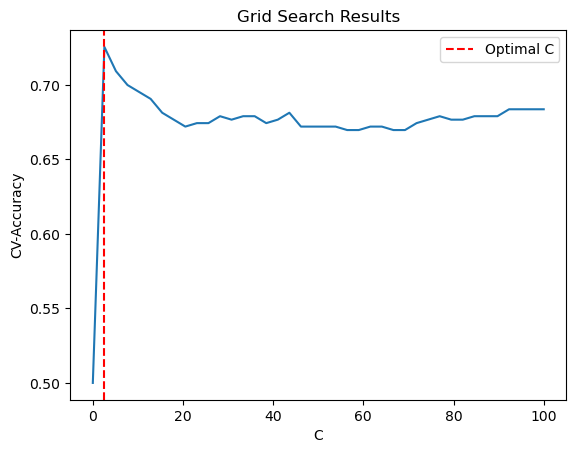

In [100]:
# The code performs a grid search with cross-validation (10-fold) to find the optimal value of the 'C' parameter in Lasso logistic regression. 
# It tries different values of 'C' specified in param_grid and evaluates the model's performance using 10-fold cross-validation. The result is stored in the grid_search object, which can be accessed to retrieve the best hyperparameters and evaluate the model's performance.

param_grid = {'C': np.linspace(0.01, 100, 40)}
# Create a logistic regression model with Lasso regularization
lasso_model = LogisticRegression(penalty='l1', solver='liblinear') # if I add max_iter=int(1e6), it blocks

# Perform grid search with cross-validation (cv=5)
grid_search = GridSearchCV(lasso_model, param_grid, cv=5)
grid_search.fit(normalized_X_train, y_train)

# Print the best lambda (alpha) value
print("Best lambda (alpha) for Lasso logistic regression: ", 1 / grid_search.best_estimator_.C)

# Print the best cross-validation score
print("Best cross-validation score: ", grid_search.best_score_)

C_values = np.linspace(0.01, 100, 40)
accuracy_scores = grid_search.cv_results_['mean_test_score']

max_accuracy = np.max(accuracy_scores)
best_C = C_values[np.argmax(accuracy_scores)]


plt.plot(C_values, accuracy_scores)
plt.axvline(x=best_C, color='r', linestyle='--', label='Optimal C')
plt.xlabel('C')
plt.ylabel('CV-Accuracy')
plt.title('Grid Search Results')
plt.legend()
plt.show()

Best lambda (alpha) for Lasso logistic regression:  0.38852361028093246 (C=2.57).

In [101]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# After fitting the grid search, calculate metrics using cross_val_predict
best_lasso_model = grid_search.best_estimator_  # Get the best Lasso model with the optimal C

# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred = cross_val_predict(best_lasso_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1 = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1 = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1 = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
mean_precision_1 = np.mean(precision_scores_1)
std_precision_1 = np.std(precision_scores_1)
mean_recall_1 = np.mean(recall_scores_1)
std_recall_1 = np.std(recall_scores_1)
mean_f1_1 = np.mean(f1_scores_1)
std_f1_1 = np.std(f1_scores_1)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy)
print("Standard Deviation of Accuracy:", std_accuracy)
print("Mean Cross-Validation Precision - 1:", mean_precision_1)
print("Standard Deviation of Precision - 1:", std_precision_1)
print("Mean Cross-Validation Recall - 1:", mean_recall_1)
print("Standard Deviation of Recall - 1:", std_recall_1)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1)
print("Standard Deviation of F1-score - 1:", std_f1_1)

Mean Cross-Validation Accuracy: 0.7279069767441861
Standard Deviation of Accuracy: 0.05231265990326507
Mean Cross-Validation Precision - 1: 0.7101241588217155
Standard Deviation of Precision - 1: 0.04385726013040007
Mean Cross-Validation Recall - 1: 0.7674418604651162
Standard Deviation of Recall - 1: 0.08320252939534103
Mean Cross-Validation F1-score - 1: 0.7338971773297114
Standard Deviation of F1-score - 1: 0.05971001700079365


In [102]:
precision_scores_1 

array([0.72340426, 0.70833333, 0.7826087 , 0.68627451, 0.65      ])

#### Compute the mean and the standard deviation cross-validation precision, recall and F1-score for the negative class 0

In [103]:
from sklearn.metrics import make_scorer
# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0 = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0 = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0 = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0 = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0 = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0 = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0)

# compute the mean and the standard deviation
mean_precision_0 = np.mean(precision_scores_0)
std_precision_0 = np.std(precision_scores_0)
mean_recall_0 = np.mean(recall_scores_0)
std_recall_0 = np.std(recall_scores_0)
mean_f1_0 = np.mean(f1_scores_0)
std_f1_0 = np.std(f1_scores_0)

print("Mean Cross-Validation Precision - 0:", mean_precision_0)
print("Standard Deviation of Precision - 0:", std_precision_0)
print("Mean Cross-Validation Recall - 0:", mean_recall_0)
print("Standard Deviation of Recall - 0:", std_recall_0)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0)
print("Standard Deviation of F1-score: - 0", std_f1_0)

Mean Cross-Validation Precision - 0: 0.7518504036009757
Standard Deviation of Precision - 0: 0.06466197892885686
Mean Cross-Validation Recall - 0: 0.6883720930232559
Standard Deviation of Recall - 0: 0.04557190219131496
Mean Cross-Validation F1-score: - 0 0.7173861016493813
Standard Deviation of F1-score: - 0 0.04733792733341594


In [104]:
precision_scores_0

array([0.76923077, 0.76315789, 0.825     , 0.77142857, 0.63043478])

In [105]:
# define a function that performs a Logistic Regression using Lasso (default C=1) as Regularization type
def Lasso (X_train, X_test, y_train, y_test):
   
    

# Definizione dell'istanza del modello.
    clf = LogisticRegression(penalty="l1", solver="liblinear", tol=1e-6, max_iter=10000, warm_start=False, intercept_scaling=10000.0, C=2.57)   
# setting warm_start=False to start training from scratch each time, eliminating the influence of previous solutions.

# Addestramento del modello sui dati di training
    clf.fit(X_train, y_train)

# Predizione sui dati di test
    y_pred = clf.predict(X_test)

# Valutazione del modello
    print(classification_report(y_test, y_pred))

    coef_indexes = clf.coef_[0].nonzero()[0]

    # Numero delle feature con coefficiente diverso da zero
    n_features = len(coef_indexes)

    # Nomi delle feature con coefficiente diverso da zero
    feature_names = X.columns[coef_indexes]


    print(f"Numero di feature con coefficiente diverso da zero: {n_features}")
    print(f"Nomi delle feature con coefficiente diverso da zero: {feature_names}")

    explainer = shap.Explainer(clf, X_train)

# Calcola i valori Shapley per le feature del modello addestrato
    shap_values = explainer(X_test)

# Visualizza un grafico delle feature più importanti
    shap.plots.bar(shap_values.mean(0))
   # shap.plots.bar(shap_values)
    #shap.plots.force(shap_values)


    return (y_pred, feature_names)

              precision    recall  f1-score   support

           0       0.79      0.85      0.82        72
           1       0.84      0.78      0.81        72

    accuracy                           0.81       144
   macro avg       0.81      0.81      0.81       144
weighted avg       0.81      0.81      0.81       144

Numero di feature con coefficiente diverso da zero: 136
Nomi delle feature con coefficiente diverso da zero: Index(['TP53_270_282', 'PIK3CA_345_345', 'PIK3CA_102_113', 'MAML3_503_503',
       'PIK3R1_566_578', 'ZNF814_303_311', 'KRAS_12_12', 'GATA3_308_335',
       'GATA3_406_408', 'FAM208B_805_805',
       ...
       'RIC8A_noClust', 'GPS2_noClust', 'FASTKD2_noClust', 'ATG4C_noClust',
       'ZNF814_noClust', 'SNAPC1_noClust', 'APLF_noClust', 'GNL3L_noClust',
       'CDC73_noClust', 'PODXL_noClust'],
      dtype='object', length=136)


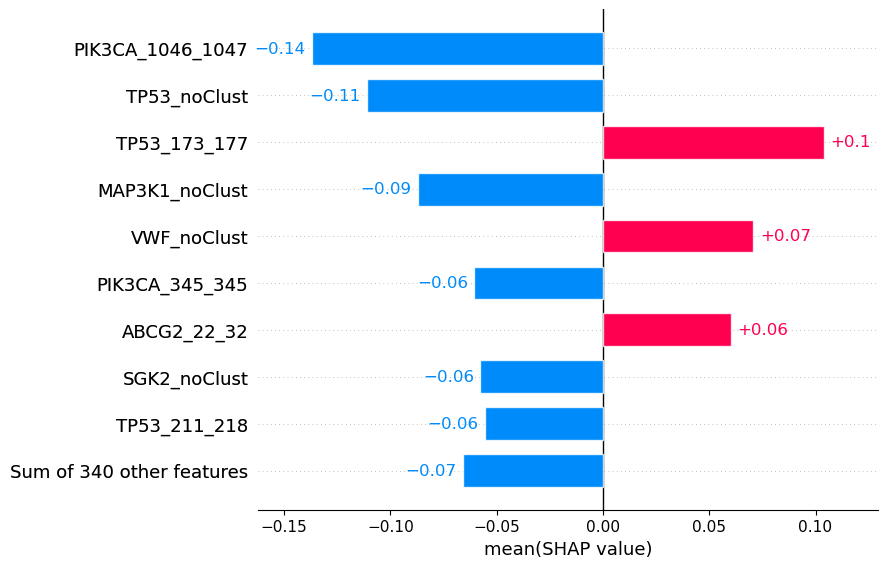

In [106]:
y_pred_simple_Lasso, feature_names_simple_Lasso = Lasso(normalized_X_train, normalized_X_test, y_train, y_test)

136 features have a coefficent different from zero.

### Study of the function Lasso

In [107]:
clf_simple_LogRegr = LogisticRegression(penalty="l1", solver="liblinear", tol=1e-6, max_iter=100000, warm_start=False, intercept_scaling=10000.0, C=2.57)   

In [108]:
clf_simple_LogRegr.fit(normalized_X_train, y_train)

LogisticRegression(C=2.57, intercept_scaling=10000.0, max_iter=100000,
                   penalty='l1', solver='liblinear', tol=1e-06)

In [109]:
y_pred_simple_Lasso = clf_simple_LogRegr.predict(normalized_X_test)

In [110]:
y_pred_simple_Lasso

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [111]:
y_test

brca_smc_2018_BB01_130    0
brca_smc_2018_BB01_110    1
brca_smc_2018_BB01_037    1
brca_smc_2018_BB01_126    1
brca_smc_2018_BR097       1
                         ..
MBCProject_27uAugT4       0
MBCProject_2kS5fYc1       0
MBCProject_7oIotZSe       0
MBCProject_LVSjf8h7       0
MBCProject_pktAIxFb       0
Name: Target, Length: 144, dtype: int64

In [112]:
# extract the indexes of coefficients in a logistic regression model that have non.zero values when Lasso (l1 regularization) is applied
coef_indexes_simple_Lasso = clf_simple_LogRegr.coef_[0].nonzero()[0]

# Numero delle feature con coefficiente diverso da zero
n_features_simple_Lasso = len(coef_indexes_simple_Lasso)

In [113]:
X

TP53_270_282  PIK3CA_541_542  PIK3CA_345_345  \
TCGA-AO-A0JB                    0               0               0   
TCGA-BH-A0DZ                    0               0               0   
PD4128a                         0               0               0   
PD4203a                         0               0               0   
TCGA-BH-A0BD                    0               0               0   
...                           ...             ...             ...   
MBCProject_27uAugT4             0               0               0   
MBCProject_2kS5fYc1             0               0               0   
MBCProject_7oIotZSe             0               0               0   
MBCProject_LVSjf8h7             0               0               0   
MBCProject_pktAIxFb             0               0               0   

                     PIK3CA_102_113  ZNF195_109_111  MAML3_503_503  \
TCGA-AO-A0JB                      0               0              0   
TCGA-BH-A0DZ                      0               0              0   
PD4128a                           0               0              0   
PD4203a                           0               0              0   
TCGA-BH-A0BD                      0               0              0   
...                             ...             ...            ...   
MBCProject_27uAugT4               0               0              0   
MBCProject_2kS5fYc1               0               0              0   
MBCProject_7oIotZSe               0               0              0   
MBCProject_LVSjf8h7               0               0              0   
MBCProject_pktAIxFb               0               0              0   

                     PIK3R1_566_578  ZNF814_303_311  RBM27_719_719  \
TCGA-AO-A0JB                      0               0              0   
TCGA-BH-A0DZ                      0               0              0   
PD4128a                           0               0              0   
PD4203a                           0               0              0   
TCGA-BH-A0BD                      0               0              0   
...                             ...             ...            ...   
MBCProject_27uAugT4               0               0              0   
MBCProject_2kS5fYc1               0               0              0   
MBCProject_7oIotZSe               0               0              0   
MBCProject_LVSjf8h7               0               0              0   
MBCProject_pktAIxFb               0               0              0   

                     KRAS_12_12  ...  CDC73_noClust  MTA2_noClust  \
TCGA-AO-A0JB                  0  ...              0             0   
TCGA-BH-A0DZ                  0  ...              0             0   
PD4128a                       0  ...              0             0   
PD4203a                       0  ...              0             0   
TCGA-BH-A0BD                  0  ...              0             0   
...                         ...  ...            ...           ...   
MBCProject_27uAugT4           0  ...              0             0   
MBCProject_2kS5fYc1           0  ...              0             0   
MBCProject_7oIotZSe           0  ...              0             0   
MBCProject_LVSjf8h7           0  ...              0             0   
MBCProject_pktAIxFb           0  ...              0             0   

                     GAS8_noClust  AP1S3_noClust  OR6B1_noClust  PLTP_noClust  \
TCGA-AO-A0JB                    0              0              0             0   
TCGA-BH-A0DZ                    0              0              0             0   
PD4128a                         0              0              0             0   
PD4203a                         0              0              0             0   
TCGA-BH-A0BD                    0              0              0             0   
...                           ...            ...            ...           ...   
MBCProject_27uAugT4             0              0              0             0   
MBCProject_2kS5fYc1             0

### Study the Lasso coefficients


In Lasso Logistic Regression (Logistic Regression with L1 regularization), the coefficients represent the strength and direction of the relationship between the input features and the binary outcome (0 or 1). These coefficients play a crucial role in determining how the logistic regression model makes predictions.

1. **Magnitude (Absolute Value):** The absolute value of a coefficient indicates the strength of the relationship between a feature and the outcome. A larger absolute value suggests that the feature has a more substantial impact on the prediction. For example, if the coefficient for a feature is 0.5, it means a one-unit change in that feature will result in a 0.5-unit change in the log-odds of the outcome.
2. **Sign (Positive or Negative):** The sign of the coefficient (positive or negative) indicates the direction of the relationship. 
3. **Feature Importance:** The coefficients provide a measure of feature importance. Features with larger (in absolute value) coefficients are considered more important in making predictions. Lasso regularization tends to drive some coefficients to zero, effectively selecting a subset of the most important features, which can be useful for feature selection.
4. **Regularization Effect:** Lasso regularization, by design, encourages sparsity in the coefficients. It tries to set some coefficients to exactly zero, effectively removing certain features from the model. This is a form of feature selection and can lead to a simpler and more interpretable model.
5. **Interpretation**: For categorical features, coefficients indicate the change in log-odds compared to the reference category.

The coefficients give insights into the relationships between features and the probability of the positive outcome.

In [114]:
coef_Lasso = clf_simple_LogRegr.coef_[0]
coef_Lasso

array([ 2.63677477,  0.        , -2.36758172, -0.50999771,  0.        ,
        0.79817959, -0.01342733, -1.597656  ,  0.        , -0.34615831,
        0.        , -2.96886099, -2.11213524,  0.        ,  0.        ,
        0.        , -0.72811982,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -1.98524296, -2.15475606, -3.49604089,  4.29477469,  2.55202677,
        1.95024145,  0.        ,  1.12562269,  0.        ,  0.        ,
        0.        ,  0.        , -3.00538371,  0.        ,  0.        ,
        0.        ,  1.67708832,  0.        , -1.33357845,  0.        ,
        4.73843275, -0.76409376,  0.        ,  0.        ,  1.98407767,
        0.68743702,  0.        ,  0.        , -0.47388296, -0.33103837,
        0.        , -2.68594917,  0.        ,  0.        ,  0.        ,
        0.        , -1.80167989,  0.        ,  0.        , -0.50019532,
        0.        , -3.2555603 ,  0.        ,  1.36178832,  0.  

In [115]:
len(coef_Lasso)

349

In [116]:
# absolute value of the coefficients
abs(coef_Lasso)

array([2.63677477, 0.        , 2.36758172, 0.50999771, 0.        ,
       0.79817959, 0.01342733, 1.597656  , 0.        , 0.34615831,
       0.        , 2.96886099, 2.11213524, 0.        , 0.        ,
       0.        , 0.72811982, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.98524296, 2.15475606, 3.49604089, 4.29477469, 2.55202677,
       1.95024145, 0.        , 1.12562269, 0.        , 0.        ,
       0.        , 0.        , 3.00538371, 0.        , 0.        ,
       0.        , 1.67708832, 0.        , 1.33357845, 0.        ,
       4.73843275, 0.76409376, 0.        , 0.        , 1.98407767,
       0.68743702, 0.        , 0.        , 0.47388296, 0.33103837,
       0.        , 2.68594917, 0.        , 0.        , 0.        ,
       0.        , 1.80167989, 0.        , 0.        , 0.50019532,
       0.        , 3.2555603 , 0.        , 1.36178832, 0.        ,
       1.07653517, 0.        , 0.89545299, 0.53439757, 0.62478

In [117]:
# Nomi delle feature con coefficiente diverso da zero
feature_names_simple_Lasso = X.columns[coef_indexes_simple_Lasso]
feature_names_simple_Lasso

Index(['TP53_270_282', 'PIK3CA_345_345', 'PIK3CA_102_113', 'MAML3_503_503',
       'PIK3R1_566_578', 'ZNF814_303_311', 'KRAS_12_12', 'GATA3_308_335',
       'GATA3_406_408', 'FAM208B_805_805',
       ...
       'RIC8A_noClust', 'GPS2_noClust', 'FASTKD2_noClust', 'ATG4C_noClust',
       'ZNF814_noClust', 'SNAPC1_noClust', 'APLF_noClust', 'GNL3L_noClust',
       'CDC73_noClust', 'PODXL_noClust'],
      dtype='object', length=136)

In [118]:
# Create a DataFrame with feature names and their absolute coefficients
features_coefficients_Lasso = pd.DataFrame({'Feature': X.columns, 'Absolute Coefficient': abs(coef_Lasso)})
features_coefficients_Lasso

Feature  Absolute Coefficient
0        TP53_270_282              2.636775
1      PIK3CA_541_542              0.000000
2      PIK3CA_345_345              2.367582
3      PIK3CA_102_113              0.509998
4      ZNF195_109_111              0.000000
..                ...                   ...
344      PLTP_noClust              0.000000
345     PODXL_noClust              0.418522
346      HMBS_noClust              0.000000
347     EIF3C_noClust              0.000000
348  KRTAP5-1_noClust              0.000000

[349 rows x 2 columns]

In [119]:
# sort in descending order of absolute coefficient
features_tot_coefficients_Lasso_sorted = features_coefficients_Lasso.sort_values(by='Absolute Coefficient', ascending=False)
features_tot_coefficients_Lasso_sorted

Feature  Absolute Coefficient
45       TP53_noClust              4.738433
28       TP53_191_199              4.294775
283     CARD6_noClust              3.632916
27         AKT1_17_17              3.496041
66      GATA3_noClust              3.255560
..                ...                   ...
165      EML2_noClust              0.000000
166   PLA2G4D_noClust              0.000000
168     MED23_noClust              0.000000
169    ARRDC1_noClust              0.000000
348  KRTAP5-1_noClust              0.000000

[349 rows x 2 columns]

In [120]:
# Filter the DataFrame to keep only non-zero coefficients
features_nonzerocoefficients_Lasso = features_coefficients_Lasso[features_coefficients_Lasso['Absolute Coefficient'] != 0]
features_nonzerocoefficients_Lasso

Feature  Absolute Coefficient
0      TP53_270_282              2.636775
2    PIK3CA_345_345              2.367582
3    PIK3CA_102_113              0.509998
5     MAML3_503_503              0.798180
6    PIK3R1_566_578              0.013427
..              ...                   ...
326  SNAPC1_noClust              1.052542
327    APLF_noClust              0.969098
338   GNL3L_noClust              0.739924
339   CDC73_noClust              0.607327
345   PODXL_noClust              0.418522

[136 rows x 2 columns]

In [121]:
features_nonzerocoefficients_Lasso.shape

(136, 2)

In [122]:
# sort in descending order of absolute coefficient
features_nonzerocoefficients_Lasso_sorted = features_nonzerocoefficients_Lasso.sort_values(by='Absolute Coefficient', ascending=False)
features_nonzerocoefficients_Lasso_sorted

Feature  Absolute Coefficient
45     TP53_noClust              4.738433
28     TP53_191_199              4.294775
283   CARD6_noClust              3.632916
27       AKT1_17_17              3.496041
66    GATA3_noClust              3.255560
..              ...                   ...
122   TAF7L_noClust              0.023340
6    PIK3R1_566_578              0.013427
87   DOCK11_noClust              0.011109
113   ZFHX3_noClust              0.011093
205    KLF4_noClust              0.006909

[136 rows x 2 columns]

In [123]:
feature_names_lista_simple_Lasso_df = features_nonzerocoefficients_Lasso_sorted[['Feature']]
feature_names_lista_simple_Lasso_df

Feature
45     TP53_noClust
28     TP53_191_199
283   CARD6_noClust
27       AKT1_17_17
66    GATA3_noClust
..              ...
122   TAF7L_noClust
6    PIK3R1_566_578
87   DOCK11_noClust
113   ZFHX3_noClust
205    KLF4_noClust

[136 rows x 1 columns]

#### Extract only the Hugo Symbol from the features 

In [124]:
feature_names_lista_simple_Lasso_df['Hugo_Symbol'] = feature_names_lista_simple_Lasso_df['Feature'].str.split('_').str[0]
feature_names_lista_simple_Lasso_df

Feature Hugo_Symbol
45     TP53_noClust        TP53
28     TP53_191_199        TP53
283   CARD6_noClust       CARD6
27       AKT1_17_17        AKT1
66    GATA3_noClust       GATA3
..              ...         ...
122   TAF7L_noClust       TAF7L
6    PIK3R1_566_578      PIK3R1
87   DOCK11_noClust      DOCK11
113   ZFHX3_noClust       ZFHX3
205    KLF4_noClust        KLF4

[136 rows x 2 columns]

In [125]:
feature_names_lista_simple_Lasso_df_onlyHugo = feature_names_lista_simple_Lasso_df[['Hugo_Symbol']]
feature_names_lista_simple_Lasso_df_onlyHugo

Hugo_Symbol
45         TP53
28         TP53
283       CARD6
27         AKT1
66        GATA3
..          ...
122       TAF7L
6        PIK3R1
87       DOCK11
113       ZFHX3
205        KLF4

[136 rows x 1 columns]

In [126]:
feature_names_lista_simple_Lasso_df_onlyHugo.duplicated().sum()

15

In [127]:
# consider just unique genes - drop duplicates 
feature_names_lista_simple_Lasso_df_onlyHugo_nodup = feature_names_lista_simple_Lasso_df_onlyHugo.drop_duplicates()
feature_names_lista_simple_Lasso_df_onlyHugo_nodup

Hugo_Symbol
45         TP53
283       CARD6
27         AKT1
66        GATA3
102       WDR44
..          ...
143      ZNF195
122       TAF7L
87       DOCK11
113       ZFHX3
205        KLF4

[121 rows x 1 columns]

In [128]:
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Significant features")
# save the training patients 
feature_names_lista_simple_Lasso_df_onlyHugo_nodup.to_csv('4A_features_onlygenes_LASSO_v5.txt', index=False, sep='\t')

In [129]:
features_nonzerocoefficients_Lasso_sorted.loc[features_nonzerocoefficients_Lasso_sorted['Feature']=='EPG5_noClust']

Feature  Absolute Coefficient
111  EPG5_noClust              2.029321

In [130]:
features_nonzerocoefficients_Lasso_sorted.head(50)

Feature  Absolute Coefficient
45       TP53_noClust              4.738433
28       TP53_191_199              4.294775
283     CARD6_noClust              3.632916
27         AKT1_17_17              3.496041
66      GATA3_noClust              3.255560
102     WDR44_noClust              3.242603
75      ERBB2_noClust              3.109836
37        ABCG2_22_32              3.005384
269        TH_noClust              3.003207
181    COL4A2_noClust              2.970295
11      GATA3_308_335              2.968861
79      TUBD1_noClust              2.926368
305   FASTKD2_noClust              2.910336
297      SGK2_noClust              2.882247
119  KIAA0195_noClust              2.751410
97     MAP3K1_noClust              2.743063
56     GPRIN1_noClust              2.685949
0        TP53_270_282              2.636775
29       TP53_236_258              2.552027
2      PIK3CA_345_345              2.367582
137      FMO5_noClust              2.197701
26   PIK3CA_1046_1047              2.154756
12      GATA3_406_408              2.112135
111      EPG5_noClust              2.029321
76     MAP2K4_noClust              2.024717
179   MRGPRX4_noClust              2.023192
225      SUCO_noClust              1.991845
25     PIK3CA_545_546              1.985243
49        NF1_noClust              1.984078
30       TP53_173_177              1.950241
61       CBFB_noClust              1.801680
177       VWF_noClust              1.795240
128    ANKHD1_noClust              1.781745
197     DCST1_noClust              1.756951
41       TP53_211_218              1.677088
286      COIL_noClust              1.671876
125      ESF1_noClust              1.647150
267      KRAS_noClust              1.605064
7      ZNF814_303_311              1.597656
151      EML5_noClust              1.566242
203    MGAT5B_noClust              1.537999
145    PIK3R1_noClust              1.522510
229      SMG1_noClust              1.519872
253  TRAPPC10_noClust              1.515925
85       SZT2_noClust              1.461153
191      AGO1_noClust              1.420440
68     NOTCH2_noClust              1.361788
43       PTEN_128_131              1.333578
246     LZTR1_noClust              1.296917
293   CCDC135_noClust              1.281731

In [131]:
features_nonzerocoefficients_Lasso_sorted[features_nonzerocoefficients_Lasso_sorted['Feature'].str.contains('BRCA2')]

Feature  Absolute Coefficient
110  BRCA2_noClust              0.304963

In [132]:
features_nonzerocoefficients_Lasso_sorted.loc[features_nonzerocoefficients_Lasso_sorted['Feature']=='STAB2_noClust']

Feature  Absolute Coefficient
162  STAB2_noClust               0.77778

## Evaluate the model with classification metrics 

In [133]:
# Test accuracy 
accuracy_simple_LassoLogRegr = np.mean(y_test == y_pred_simple_Lasso)
print("Accuracy:", accuracy_simple_LassoLogRegr)

Accuracy: 0.8125


In [134]:
# build the confusion matrix
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix

cm_simple_LassoLogRegr = confusion_matrix(y_test, y_pred_simple_Lasso)
print(cm_simple_LassoLogRegr)

[[61 11]
 [16 56]]


In [135]:
# precision: TP/(TP+FP) accuracy of the positive prediction
def precision(cm):
    TP = cm[1,1]
    TPFP = cm[:,1].sum()
    return TP / TPFP

In [136]:
print("Precision ", precision(cm_simple_LassoLogRegr))

Precision  0.835820895522388


In [137]:
# Recall:  TP/(TP+FN) ratio of positive instances correctly detected by the classifier
def recall(cm):
    TP = cm[1,1]
    T = cm[1,:].sum()
    return TP / T

In [138]:
print("Recall:", recall(cm_simple_LassoLogRegr))

Recall: 0.7777777777777778


In [139]:
# F1 score: 2 * precision_RF * recall_RF / (precision_RF + recall_RF)
def f1(cm):
    p = precision(cm)
    r = recall(cm)
    return (2 * p * r) / (p + r)

In [140]:
print("F1:", f1(cm_simple_LassoLogRegr))

F1: 0.8057553956834532


In [141]:
# MCC (Matthews correlation coefficient)

def mcc(y_true, y_pred):
    tp = np.sum(np.logical_and(y_true == 1, y_pred == 1))
    tn = np.sum(np.logical_and(y_true == 0, y_pred == 0))
    fp = np.sum(np.logical_and(y_true == 0, y_pred == 1))
    fn = np.sum(np.logical_and(y_true == 1, y_pred == 0))
    
    numerator = (tp * tn) - (fp * fn)
    denominator = np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    
    mcc_value = numerator / denominator
    return mcc_value

In [142]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_simple_Lasso == 1))
tp

56

In [143]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_simple_Lasso == 0))
tn

61

In [144]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_simple_Lasso == 1))
fp

11

In [145]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_simple_Lasso == 0))
fn

16

In [146]:
print("MCC:", mcc(y_test, y_pred_simple_Lasso))

MCC: 0.6265125137069193


In [147]:
feature_names_lista_simple_Lasso = list(feature_names_simple_Lasso)
feature_names_lista_simple_Lasso

['TP53_270_282',
 'PIK3CA_345_345',
 'PIK3CA_102_113',
 'MAML3_503_503',
 'PIK3R1_566_578',
 'ZNF814_303_311',
 'KRAS_12_12',
 'GATA3_308_335',
 'GATA3_406_408',
 'FAM208B_805_805',
 'PIK3CA_545_546',
 'PIK3CA_1046_1047',
 'AKT1_17_17',
 'TP53_191_199',
 'TP53_236_258',
 'TP53_173_177',
 'RUNX1_122_123',
 'ABCG2_22_32',
 'TP53_211_218',
 'PTEN_128_131',
 'TP53_noClust',
 'PIK3CA_noClust',
 'NF1_noClust',
 'ACACB_noClust',
 'KMT2C_noClust',
 'PTEN_noClust',
 'GPRIN1_noClust',
 'CBFB_noClust',
 'ZNF546_noClust',
 'GATA3_noClust',
 'NOTCH2_noClust',
 'RAD54B_noClust',
 'SPEN_noClust',
 'DNAH12_noClust',
 'PRB2_noClust',
 'ERBB2_noClust',
 'MAP2K4_noClust',
 'PODXL2_noClust',
 'TUBD1_noClust',
 'SZT2_noClust',
 'DOCK11_noClust',
 'NCOR1_noClust',
 'MAP3K1_noClust',
 'ERBB3_noClust',
 'TRPM8_noClust',
 'WDR44_noClust',
 'TRIP11_noClust',
 'USP8_noClust',
 'BLK_noClust',
 'BRCA2_noClust',
 'EPG5_noClust',
 'SELP_noClust',
 'ZFHX3_noClust',
 'SF3B3_noClust',
 'FOXP1_noClust',
 'KIAA0195_noClu

In [148]:
len(feature_names_lista_simple_Lasso)

136

# Ridge Logistic Regression

## Grid search to find the optimal parameter for Ridge regression

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000, solver='liblinear'),
             param_grid={'C': array([1.00000000e-02, 2.57384615e+00, 5.13769231e+00, 7.70153846e+00,
       1.02653846e+01, 1.28292308e+01, 1.53930769e+01, 1.79569231e+01,
       2.05207692e+01, 2.30846154e+01, 2.56484615e+01, 2.82123077e+01,
       3.07761538e+01, 3.33400000e+01, 3.59038462e+01, 3.84676923e+01,
       4.103...1, 4.35953846e+01, 4.61592308e+01, 4.87230769e+01,
       5.12869231e+01, 5.38507692e+01, 5.64146154e+01, 5.89784615e+01,
       6.15423077e+01, 6.41061538e+01, 6.66700000e+01, 6.92338462e+01,
       7.17976923e+01, 7.43615385e+01, 7.69253846e+01, 7.94892308e+01,
       8.20530769e+01, 8.46169231e+01, 8.71807692e+01, 8.97446154e+01,
       9.23084615e+01, 9.48723077e+01, 9.74361538e+01, 1.00000000e+02])})

Best C for Ridge logistic regression:  0.01
Best cross-validation score:  0.7348837209302326


Text(0.5, 0, 'C')

Text(0, 0.5, 'CV-Accuracy')

Text(0.5, 1.0, 'Grid Search Results for Ridge Logistic Regression')

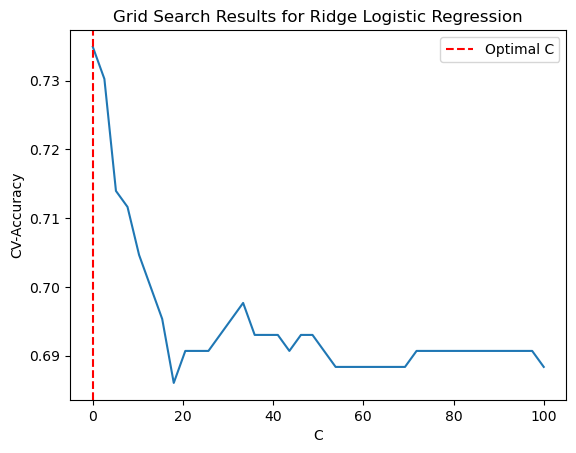

In [149]:
# Create a grid of alpha values for Ridge regularization
param_grid = {'C': np.linspace(0.01, 100, 40)}

# Create a logistic regression model with Ridge regularization (L2)
ridge_model = LogisticRegression(penalty='l2', solver='liblinear', max_iter=10000)

# Perform grid search with cross-validation (cv=5)
grid_search = GridSearchCV(ridge_model, param_grid, cv=5)
grid_search.fit(normalized_X_train, y_train)

# Print the best C value
print("Best C for Ridge logistic regression: ", grid_search.best_estimator_.C)

# Print the best cross-validation score
print("Best cross-validation score: ", grid_search.best_score_)

C_values = np.linspace(0.01, 100, 40)
accuracy_scores = grid_search.cv_results_['mean_test_score']

max_accuracy = np.max(accuracy_scores)
best_C = C_values[np.argmax(accuracy_scores)]

plt.plot(C_values, accuracy_scores)
plt.axvline(x=best_C, color='r', linestyle='--', label='Optimal C')
plt.xlabel('C')
plt.ylabel('CV-Accuracy')
plt.title('Grid Search Results for Ridge Logistic Regression')
plt.legend()
plt.show()

Best lambda (alpha) for Ridge logistic regression: 100 (C=0.01).

### Compute the classification metrics on the cross-validation results 

In [150]:
# POSITIVE CLASS (1)

# After fitting the grid search, calculate metrics using cross_val_predict
best_ridge_model = grid_search.best_estimator_  # Get the best Ridge model with the optimal C

# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_Ridge = cross_val_predict(best_ridge_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_R = np.mean(accuracy_scores_R)
std_accuracy_R = np.std(accuracy_scores_R)
mean_precision_1_R = np.mean(precision_scores_1_R)
std_precision_1_R = np.std(precision_scores_1_R)
mean_recall_1_R = np.mean(recall_scores_1_R)
std_recall_1_R = np.std(recall_scores_1_R)
mean_f1_1_R = np.mean(f1_scores_1_R)
std_f1_1_R = np.std(f1_scores_1_R)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_R)
print("Standard Deviation of Accuracy:", std_accuracy_R)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_R)
print("Standard Deviation of Precision - 1:", std_precision_1_R)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_R)
print("Standard Deviation of Recall - 1:", std_recall_1_R)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_R)
print("Standard Deviation of F1-score - 1:", std_f1_1_R)

Mean Cross-Validation Accuracy: 0.7348837209302326
Standard Deviation of Accuracy: 0.04436926518218353
Mean Cross-Validation Precision - 1: 0.7095494071146244
Standard Deviation of Precision - 1: 0.03622232035714726
Mean Cross-Validation Recall - 1: 0.7953488372093023
Standard Deviation of Recall - 1: 0.07557245027568335
Mean Cross-Validation F1-score - 1: 0.7488154052287198
Standard Deviation of F1-score - 1: 0.04730694410670195


In [151]:
# NEGATIVE CLASS (0) 

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_R = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_R)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_R = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_R)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_R = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_R)

# compute the mean and the standard deviation
mean_precision_0_R = np.mean(precision_scores_0_R)
std_precision_0_R = np.std(precision_scores_0_R)
mean_recall_0_R = np.mean(recall_scores_0_R)
std_recall_0_R = np.std(recall_scores_0_R)
mean_f1_0_R = np.mean(f1_scores_0_R)
std_f1_0_R = np.std(f1_scores_0_R)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_R)
print("Standard Deviation of Precision - 0:", std_precision_0_R)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_R)
print("Standard Deviation of Recall - 0:", std_recall_0_R)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_R)
print("Standard Deviation of F1-score: - 0", std_f1_0_R)

Mean Cross-Validation Precision - 0: 0.7725832053251409
Standard Deviation of Precision - 0: 0.06845699879838935
Mean Cross-Validation Recall - 0: 0.6744186046511629
Standard Deviation of Recall - 0: 0.04878180689163495
Mean Cross-Validation F1-score: - 0 0.7180837139788956
Standard Deviation of F1-score: - 0 0.043345487098769134


## Ridge on the test set

In [152]:
def Ridge(X_train, X_test, y_train, y_test):

# Definizione dell'istanza del modello
    clf = LogisticRegression(penalty="l2", solver="liblinear" , tol=1e-6, max_iter=int(1e6), warm_start=False, intercept_scaling=10000.0, random_state = 123, C=0.01)

# Addestramento del modello sui dati di training
    clf.fit(X_train, y_train)

# Predizione sui dati di test
    y_pred = clf.predict(X_test)

# Valutazione del modello
    print(classification_report(y_test, y_pred))
    
    coef_indexes = clf.coef_[0].nonzero()[0]

    # Numero delle feature con coefficiente diverso da zero
    n_features = len(coef_indexes)

    # Nomi delle feature con coefficiente diverso da zero
    feature_names = X.columns[coef_indexes]

    print(f"Numero di feature con coefficiente diverso da zero: {n_features}")
    print(f"Nomi delle feature con coefficiente diverso da zero: {feature_names}")
    
    explainer = shap.Explainer(clf, X_train)

    # Calcola i valori Shapley per le feature del modello addestrato
    shap_values = explainer(X_test)

    # Visualizza un grafico delle feature più importanti
    shap.plots.bar(shap_values.mean(0))

    return (y_pred, feature_names)

              precision    recall  f1-score   support

           0       0.77      0.78      0.77        72
           1       0.77      0.76      0.77        72

    accuracy                           0.77       144
   macro avg       0.77      0.77      0.77       144
weighted avg       0.77      0.77      0.77       144

Numero di feature con coefficiente diverso da zero: 334
Nomi delle feature con coefficiente diverso da zero: Index(['TP53_270_282', 'PIK3CA_541_542', 'PIK3CA_345_345', 'PIK3CA_102_113',
       'ZNF195_109_111', 'MAML3_503_503', 'PIK3R1_566_578', 'ZNF814_303_311',
       'RBM27_719_719', 'KRAS_12_12',
       ...
       'LIPH_noClust', 'TMEM87B_noClust', 'GNL3L_noClust', 'CDC73_noClust',
       'MTA2_noClust', 'GAS8_noClust', 'PLTP_noClust', 'PODXL_noClust',
       'HMBS_noClust', 'KRTAP5-1_noClust'],
      dtype='object', length=334)


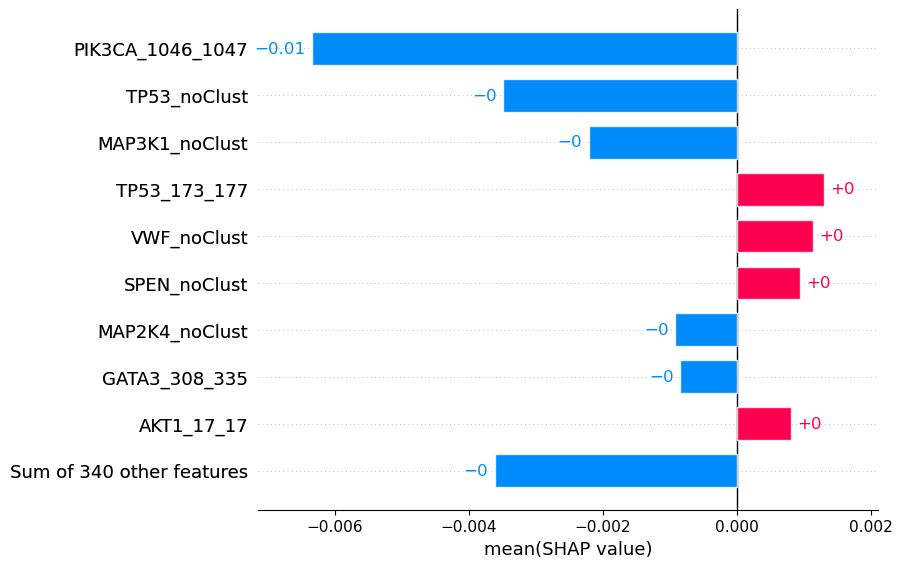

In [153]:
y_pred_simple_Ridge, feature_names_simple_Ridge = Ridge(normalized_X_train, normalized_X_test, y_train, y_test)

### Study of the function Ridge

In [154]:
clf_simple_LogRegr_Ridge = LogisticRegression(penalty="l2", solver="liblinear" , tol=1e-6, max_iter=int(1e6), warm_start=False, intercept_scaling=10000.0, random_state = 123, C=0.01)

In [155]:
clf_simple_LogRegr_Ridge.fit(normalized_X_train, y_train)

LogisticRegression(C=0.01, intercept_scaling=10000.0, max_iter=1000000,
                   random_state=123, solver='liblinear', tol=1e-06)

In [156]:
y_pred_simple_Ridge = clf_simple_LogRegr_Ridge.predict(normalized_X_test)

In [157]:
y_pred_simple_Ridge

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

## Evaluate the model with classification metrics - Ridge Logistic Regression

In [158]:
# Test accuracy 
accuracy_simple_RidgeLogRegr = np.mean(y_test == y_pred_simple_Ridge)
print("Accuracy:", accuracy_simple_RidgeLogRegr)

Accuracy: 0.7708333333333334


In [159]:
cm_simple_RidgeLogRegr = confusion_matrix(y_test, y_pred_simple_Ridge)
print(cm_simple_RidgeLogRegr)

[[56 16]
 [17 55]]


In [162]:
print("Precision ", precision(cm_simple_RidgeLogRegr))

Precision  0.7746478873239436


In [163]:
print("Recall:", recall(cm_simple_RidgeLogRegr))

Recall: 0.7638888888888888


In [164]:
print("F1:", f1(cm_simple_RidgeLogRegr))

F1: 0.7692307692307692


In [165]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_simple_Ridge == 1))
tp

55

In [166]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_simple_Ridge == 0))
tn

56

In [167]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_simple_Ridge == 1))
fp

16

In [168]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_simple_Ridge == 0))
fn

17

In [169]:
print("MCC:", mcc(y_test, y_pred_simple_Ridge))

MCC: 0.5417189183107053


# Full Logistic Regression

## Cross-validation

In [173]:
# Create a Logistic Regression model without regularization
logreg_model = LogisticRegression(solver="newton-cg", penalty=None)

# Perform cross-validation (e.g., 5-fold cross-validation)
cv_scores = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.65116279 0.70930233 0.73255814 0.61627907 0.61627907]
Mean CV Accuracy: 0.6651162790697676


In [174]:
## POSITIVE CLASS (1)

# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_logreg = cross_val_predict(logreg_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_logreg = np.mean(accuracy_scores_logreg)
std_accuracy_logreg = np.std(accuracy_scores_logreg)
mean_precision_1_logreg = np.mean(precision_scores_1_logreg)
std_precision_1_logreg = np.std(precision_scores_1_logreg)
mean_recall_1_logreg = np.mean(recall_scores_1_logreg)
std_recall_1_logreg = np.std(recall_scores_1_logreg)
mean_f1_1_logreg = np.mean(f1_scores_1_logreg)
std_f1_1_logreg = np.std(f1_scores_1_logreg)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_logreg)
print("Standard Deviation of Accuracy:", std_accuracy_logreg)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_logreg)
print("Standard Deviation of Precision - 1:", std_precision_1_logreg)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_logreg)
print("Standard Deviation of Recall - 1:", std_recall_1_logreg)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_logreg)
print("Standard Deviation of F1-score - 1:", std_f1_1_logreg)

Mean Cross-Validation Accuracy: 0.6651162790697676
Standard Deviation of Accuracy: 0.047886651818544186
Mean Cross-Validation Precision - 1: 0.6804256854256854
Standard Deviation of Precision - 1: 0.06305821205790597
Mean Cross-Validation Recall - 1: 0.6325581395348838
Standard Deviation of Recall - 1: 0.027120706487652576
Mean Cross-Validation F1-score - 1: 0.6548513285469488
Standard Deviation of F1-score - 1: 0.0407437215918449


In [175]:
# NEGATIVE CLASS (0) 

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_logreg = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_logreg)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_logreg = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_logreg)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_logreg = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_logreg)

# compute the mean and the standard deviation
mean_precision_0_logreg = np.mean(precision_scores_0_logreg)
std_precision_0_logreg = np.std(precision_scores_0_logreg)
mean_recall_0_logreg = np.mean(recall_scores_0_logreg)
std_recall_0_logreg = np.std(recall_scores_0_logreg)
mean_f1_0_logreg = np.mean(f1_scores_0_logreg)
std_f1_0_logreg = np.std(f1_scores_0_logreg)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_logreg)
print("Standard Deviation of Precision - 0:", std_precision_0_logreg)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_logreg)
print("Standard Deviation of Recall - 0:", std_recall_0_logreg)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_logreg)
print("Standard Deviation of F1-score: - 0", std_f1_0_logreg)

Mean Cross-Validation Precision - 0: 0.6533268057874904
Standard Deviation of Precision - 0: 0.037272205535002705
Mean Cross-Validation Recall - 0: 0.6976744186046512
Standard Deviation of Recall - 0: 0.07642640337281388
Mean Cross-Validation F1-score: - 0 0.67418206467199
Standard Deviation of F1-score: - 0 0.054762718173311235


## Full Logistic Regression on the test set 

In [176]:
def Full_LogReg(X_train, X_test, y_train, y_test):

# Definizione dell'istanza del modello
         clf_logreg = LogisticRegression(solver="newton-cg", penalty=None) 
# Addestramento del modello sui dati di training 
         clf_logreg.fit(X_train, y_train)  
# Predizione sui dati di test
         y_pred = clf_logreg.predict(X_test)
# Valutazione del modello
         print(classification_report(y_test, y_pred))
    
         return(y_pred)

In [177]:
y_pred_logreg = Full_LogReg(normalized_X_train, normalized_X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.76      0.79      0.78        72
           1       0.78      0.75      0.77        72

    accuracy                           0.77       144
   macro avg       0.77      0.77      0.77       144
weighted avg       0.77      0.77      0.77       144



### Study of the full logistic regression function

In [178]:
clf_simple_LogRegr_Full = LogisticRegression(solver="newton-cg", penalty=None)

In [179]:
clf_simple_LogRegr_Full.fit(normalized_X_train, y_train)

LogisticRegression(penalty=None, solver='newton-cg')

In [180]:
y_pred_full_logreg = clf_simple_LogRegr_Full.predict(normalized_X_test)

In [181]:
y_pred_full_logreg

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

## Evaluate the model with classification metrics - Ridge Logistic Regression

In [182]:
# Test accuracy 
accuracy_full_logreg = np.mean(y_test == y_pred_full_logreg)
print("Accuracy:", accuracy_full_logreg)

Accuracy: 0.7708333333333334


In [183]:
cm_full_logreg = confusion_matrix(y_test, y_pred_full_logreg)
print(cm_full_logreg)

[[57 15]
 [18 54]]


In [184]:
print("Precision ", precision(cm_full_logreg))

Precision  0.782608695652174


In [185]:
print("Recall:", recall(cm_full_logreg))

Recall: 0.75


In [186]:
print("F1:", f1(cm_full_logreg))

F1: 0.7659574468085107


In [187]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_full_logreg == 1))
tp

54

In [188]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_full_logreg == 0))
tn

57

In [189]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_full_logreg == 1))
fp

15

In [190]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_full_logreg == 0))
fn

18

In [191]:
print("MCC:", mcc(y_test, y_pred_full_logreg))

MCC: 0.5421374765483944


### Study the coefficients of the Full Logistic Regression

In [192]:
coef_logreg = clf_simple_LogRegr_Full.coef_[0]
coef_logreg

array([ 5.23075621e+01, -6.53195548e+00, -4.80109649e+01, -1.42268367e+01,
        2.17630521e+01,  1.40162735e+01, -2.34821069e-01, -1.09991799e+01,
        1.38601916e+01, -1.86656376e+01,  1.12663056e+00, -3.44276662e+01,
       -2.28596185e+01, -3.78220315e+00,  7.13726405e+00, -7.26851501e-01,
       -1.47004198e+01,  1.72420467e+01,  3.37491585e+01, -1.12947028e+00,
        0.00000000e+00, -1.34853504e+01,  3.72306041e+00, -1.78267676e+01,
        0.00000000e+00, -4.64597172e+01, -3.43753121e+01, -3.26039670e+01,
        7.89509512e+01,  7.37999985e+01,  5.24378356e+01,  6.77170811e+00,
        3.89107160e+01, -1.27974864e+00,  2.94266361e+00,  2.65798222e+00,
       -2.18853502e+01, -1.98912332e+01,  5.29765664e+00, -1.40776185e+01,
        1.38601916e+01,  2.74829786e+01,  8.26500667e+00, -3.47889825e+01,
       -2.88505280e-01,  5.41881977e+01, -4.79184673e+01,  5.41057076e-01,
        6.08161102e-01,  3.89282351e+01,  2.11106429e+01,  1.66184741e+01,
        3.04804090e+00, -

In [193]:
len(coef_logreg)

349

In [194]:
# absolute value of the coefficients
abs(coef_logreg)

array([5.23075621e+01, 6.53195548e+00, 4.80109649e+01, 1.42268367e+01,
       2.17630521e+01, 1.40162735e+01, 2.34821069e-01, 1.09991799e+01,
       1.38601916e+01, 1.86656376e+01, 1.12663056e+00, 3.44276662e+01,
       2.28596185e+01, 3.78220315e+00, 7.13726405e+00, 7.26851501e-01,
       1.47004198e+01, 1.72420467e+01, 3.37491585e+01, 1.12947028e+00,
       0.00000000e+00, 1.34853504e+01, 3.72306041e+00, 1.78267676e+01,
       0.00000000e+00, 4.64597172e+01, 3.43753121e+01, 3.26039670e+01,
       7.89509512e+01, 7.37999985e+01, 5.24378356e+01, 6.77170811e+00,
       3.89107160e+01, 1.27974864e+00, 2.94266361e+00, 2.65798222e+00,
       2.18853502e+01, 1.98912332e+01, 5.29765664e+00, 1.40776185e+01,
       1.38601916e+01, 2.74829786e+01, 8.26500667e+00, 3.47889825e+01,
       2.88505280e-01, 5.41881977e+01, 4.79184673e+01, 5.41057076e-01,
       6.08161102e-01, 3.89282351e+01, 2.11106429e+01, 1.66184741e+01,
       3.04804090e+00, 2.29545772e+01, 1.98179013e+01, 1.59521773e+01,
      

In [195]:
# Create a DataFrame with feature names and their absolute coefficients
features_coefficients_logreg = pd.DataFrame({'Feature': X.columns, 'Absolute Coefficient': abs(coef_logreg)})
features_coefficients_logreg

Feature  Absolute Coefficient
0        TP53_270_282             52.307562
1      PIK3CA_541_542              6.531955
2      PIK3CA_345_345             48.010965
3      PIK3CA_102_113             14.226837
4      ZNF195_109_111             21.763052
..                ...                   ...
344      PLTP_noClust              8.200623
345     PODXL_noClust              9.383578
346      HMBS_noClust             19.303817
347     EIF3C_noClust              0.000000
348  KRTAP5-1_noClust             13.860192

[349 rows x 2 columns]

In [196]:
# sort in descending order of absolute coefficient
features_tot_coefficients_logreg_sorted = features_coefficients_logreg.sort_values(by='Absolute Coefficient', ascending=False)
features_tot_coefficients_logreg_sorted

Feature  Absolute Coefficient
119  KIAA0195_noClust             88.534707
102     WDR44_noClust             84.111446
269        TH_noClust             81.910179
125      ESF1_noClust             80.330394
28       TP53_191_199             78.950951
..                ...                   ...
146     PRKCZ_noClust              0.000000
58      ITPKB_noClust              0.000000
24       ESR1_537_538              0.000000
309    SMTNL2_noClust              0.000000
153     EWSR1_noClust              0.000000

[349 rows x 2 columns]

In [197]:
features_tot_coefficients_logreg_sorted.head(20)

Feature  Absolute Coefficient
119  KIAA0195_noClust             88.534707
102     WDR44_noClust             84.111446
269        TH_noClust             81.910179
125      ESF1_noClust             80.330394
28       TP53_191_199             78.950951
133    PTPN22_noClust             78.572810
162     STAB2_noClust             77.969686
89     FBXO18_noClust             74.000018
29       TP53_236_258             73.799999
267      KRAS_noClust             72.482306
57      NIPBL_noClust             72.106562
160      GRM2_noClust             68.585164
137      FMO5_noClust             67.721328
109       BLK_noClust             63.143754
94       AKT1_noClust             62.302828
305   FASTKD2_noClust             59.074422
173     EP300_noClust             57.956793
122     TAF7L_noClust             57.083315
45       TP53_noClust             54.188198
217   METTL7B_noClust             53.097760

## Feature importance analysis for Logistic Regression - ShAP (Shapley Additive exPlanations)

In [198]:
# Create a SHAP explainer 
explainer_logreg = shap.LinearExplainer(clf_simple_LogRegr_Full, normalized_X_train)
# Calcola i valori Shapley per le feature del modello addestrato
# Compute the SHAP values for the test data 
shap_values_logreg = explainer_logreg(normalized_X_test) 
shap_values_logreg
#shap_values_logreg = explainer_logreg.shap_values(normalized_X_test)

.values =
array([[-1.83076467,  0.08709274,  1.44032895, ...,  0.        ,
         0.        ,  0.        ],
       [-1.83076467,  0.08709274,  1.44032895, ...,  0.        ,
         0.        ,  0.        ],
       [-1.83076467,  0.08709274,  1.44032895, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.83076467,  0.08709274,  1.44032895, ...,  0.        ,
         0.        ,  0.        ],
       [-1.83076467,  0.08709274,  1.44032895, ...,  0.        ,
         0.        ,  0.        ],
       [-1.83076467,  0.08709274,  1.44032895, ...,  0.        ,
         0.        ,  0.        ]])

.base_values =
array([-6.43362599, -6.43362599, -6.43362599, -6.43362599, -6.43362599,
       -6.43362599, -6.43362599, -6.43362599, -6.43362599, -6.43362599,
       -6.43362599, -6.43362599, -6.43362599, -6.43362599, -6.43362599,
       -6.43362599, -6.43362599, -6.43362599, -6.43362599, -6.43362599,
       -6.43362599, -6.43362599, -6.43362599, -6.43362599, -6.43362599,
 

In [199]:
shap_values_logreg2 = explainer_logreg.shap_values(normalized_X_test) 
shap_values_logreg2

array([[-1.83076467,  0.08709274,  1.44032895, ...,  0.        ,
         0.        ,  0.        ],
       [-1.83076467,  0.08709274,  1.44032895, ...,  0.        ,
         0.        ,  0.        ],
       [-1.83076467,  0.08709274,  1.44032895, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.83076467,  0.08709274,  1.44032895, ...,  0.        ,
         0.        ,  0.        ],
       [-1.83076467,  0.08709274,  1.44032895, ...,  0.        ,
         0.        ,  0.        ],
       [-1.83076467,  0.08709274,  1.44032895, ...,  0.        ,
         0.        ,  0.        ]])

In [200]:
shap_values_logreg2.shape

(144, 349)

In [201]:
# Calculate Absolute Mean SHAP Values
shap_abs_logreg = np.abs(shap_values_logreg2)
# Calculate the Mean of Absolute SHAP Values for Each Instance
# it gives a measure of the average impact of each feature for each instance
k_logreg = shap_abs_logreg.mean(axis=0)
k_logreg

array([3.54892279e+00, 1.56645969e-01, 3.94756823e+00, 4.32732950e-01,
       0.00000000e+00, 9.73352329e-02, 7.14247417e-03, 0.00000000e+00,
       0.00000000e+00, 3.13686410e-01, 7.82382332e-03, 1.83614220e+00,
       5.39740992e-01, 0.00000000e+00, 9.91286673e-02, 7.26851501e-03,
       1.02086249e-01, 3.44840933e-01, 0.00000000e+00, 4.12570393e-02,
       0.00000000e+00, 0.00000000e+00, 3.72306041e-02, 0.00000000e+00,
       0.00000000e+00, 6.02685776e+00, 8.43627450e+00, 2.64907232e+00,
       5.35660273e+00, 8.21024983e+00, 5.68076552e+00, 9.40515015e-02,
       2.70213306e-01, 2.15068868e-02, 0.00000000e+00, 2.65798222e-02,
       0.00000000e+00, 3.97824664e-01, 3.67892822e-02, 1.40776185e-01,
       9.62513308e-02, 1.27490484e+00, 8.26500667e-02, 6.95779650e-01,
       2.00350889e-03, 1.07322736e+01, 2.18295240e+00, 3.75734080e-03,
       4.22334099e-03, 3.18995260e+00, 8.44425716e-01, 1.66184741e-01,
       7.19676325e-02, 3.11480860e+00, 7.76201135e-01, 0.00000000e+00,
      

In [202]:
shap_abs_logreg.shape

(144, 349)

In [203]:
k_logreg.shape

(349,)

In [204]:
feature_importance_logreg = pd.DataFrame({'col_name': normalized_X_test.columns, 'feature_importance_vals': k_logreg})
feature_importance_logreg = feature_importance_logreg.sort_values(by='feature_importance_vals', ascending=False)
feature_importance_logreg

col_name  feature_importance_vals
45       TP53_noClust                10.732274
26   PIK3CA_1046_1047                 8.436275
29       TP53_236_258                 8.210250
25     PIK3CA_545_546                 6.026858
30       TP53_173_177                 5.680766
..                ...                      ...
243      RCC2_noClust                 0.000000
238     PTCD3_noClust                 0.000000
234    TFAP2A_noClust                 0.000000
233    NKX3-2_noClust                 0.000000
348  KRTAP5-1_noClust                 0.000000

[349 rows x 2 columns]

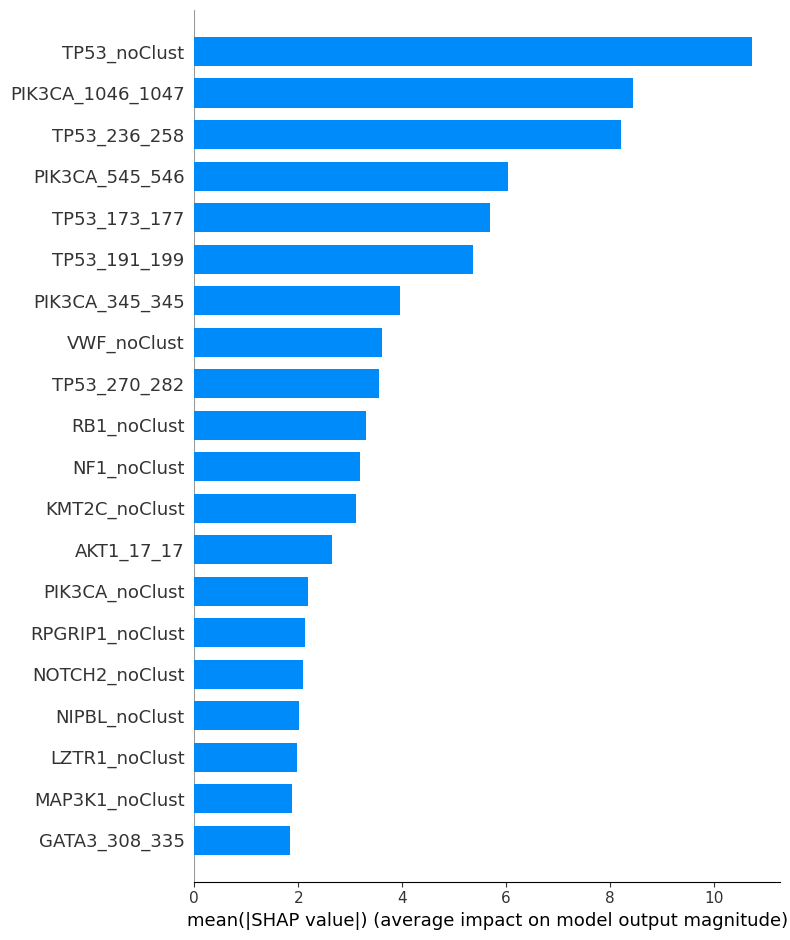

In [205]:
# build a summary barplot that displays the average magnitude and direction of each feature's impact across all samples in the test set
shap.summary_plot(shap_values_logreg, features=normalized_X_train, feature_names=normalized_X_train.columns, plot_type='bar')

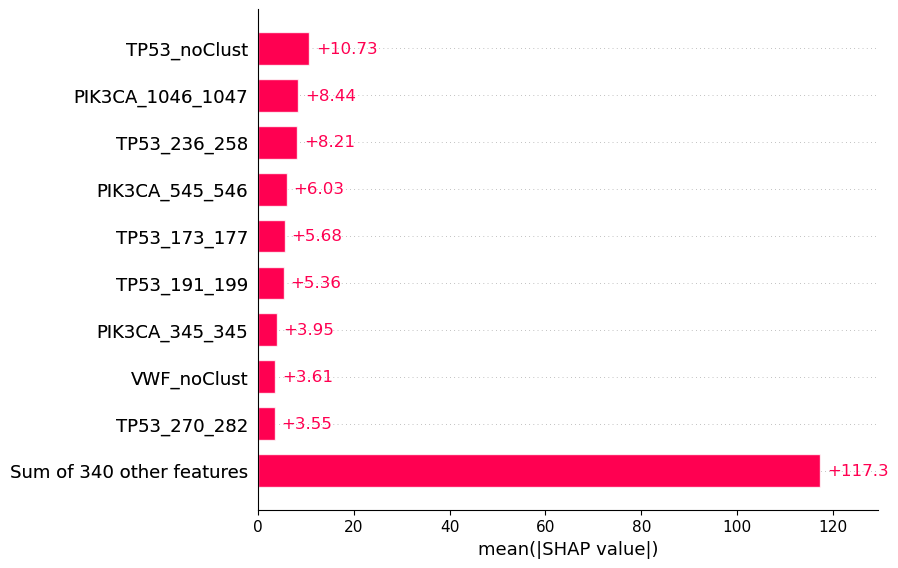

In [206]:
shap.plots.bar(shap_values_logreg)

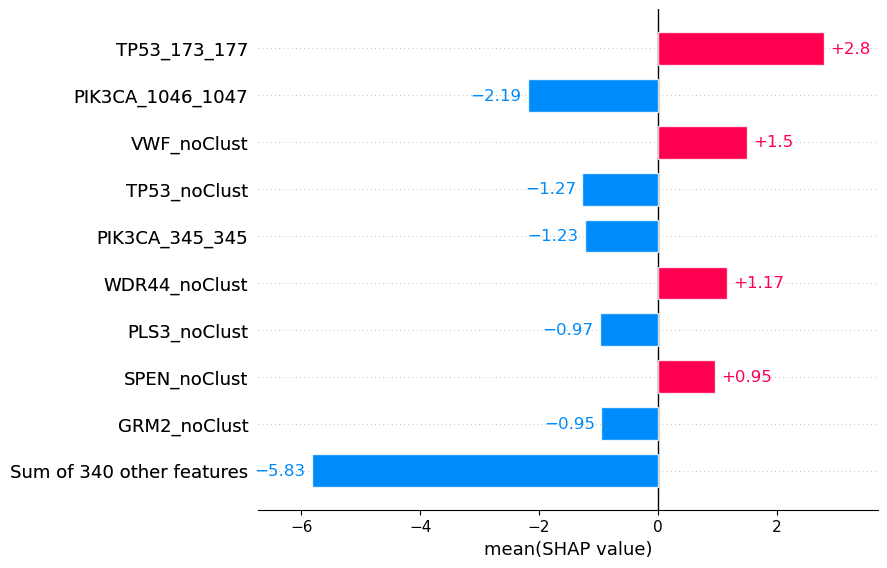

In [207]:
# Visualizza un grafico delle feature più importanti
shap.plots.bar(shap_values_logreg.mean(0))

# Support Vector Machine (SVM)

The SVM algorithm finds a robust solution to the linearly separable problem. That is, there exists a hyperplane $\mathcal{H}_{\left(\mathbf{w}, w_{0}\right)} = \mathbf{w}^{T} \cdot \mathbf{x}+w_{0}=0$, that separates two categories:

$\left\{\begin{array}{ll}{\mathbf{w}^{T} \cdot \mathbf{x}_{i}+w_{0} \geqslant 1,} & {\text { if } y_{i}=+1} \\ {\mathbf{w}^{T} \cdot \mathbf{x}_{i}+w_{0} \leqslant-1,} & {\text { if } y_{i}=-1}\end{array}\right.$

Every training point is either above the hyperplane $\mathcal{H}_{\left(\mathbf{w}, w_{0} - 1\right)}$ or below the hyperplane $\mathcal{H}_{\left(\mathbf{w}, w_{0} + 1\right)}$ . We call them *marginal hyperplanes*. Of course there are infinitely many hyperplanes for which the condition is satisfied, but the **hyperplane with the largest margin** is the one that appears in the Support Vector Machine model. **Margin** is the distance between marginal hyperplanes $M=1 /\|\mathbf{w}\|$.

### Linearly Separable case (hard margins)

Is the solution to the optimization problem:

$\min _{\mathbf{w}, w_{0}}\left\{\frac{1}{2}\|\mathbf{w}\|^{2}\right\}$

$\left\{\begin{array}{ll}{\mathbf{w}^{T} \cdot \mathbf{x}_{i}+w_{0} \geqslant 1,} & {\text { if } y_{i}=+1} \\ {\mathbf{w}^{T} \cdot \mathbf{x}_{i}+w_{0} \leqslant-1,} & {\text { if } y_{i}=-1}\end{array}\right.$


## 1) Linear Kernel

## Grid search to find the optimal parameter for Support Vector Machine

Let's tune the regularization parameter C that controls the trade-off between maximizing the margin (separating the data points as well as possible) and minimizing the classification error (allowing some data points to be misclassified). It's often referred to as the "soft margin" parameter because it allows for some level of misclassification within the training data.

- **Small C (Strong Regularization)**: when 'C' is small, the SVM optimization will focus on finding the largest margin even if it results in some training data points being misclassified. In other words, the model is penalized more for misclassifying data points and, as a result, may have a narrower margin. This is useful when there's a lot of noise in the data, and the goal is to have a more robust and generalized model.
- **Large C (Weak Regularization)**: when 'C' is large, the SVM optimization will strive to classify all training data points correctly, even if it means having a smaller margin. In this case, the model is penalized less for misclassification, and it may be more prone to overfitting the training data. This can be useful when the training data is well-behaved and the goal is to maximize the accuracy on the training data.

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': array([1.00000000e-02, 2.57384615e+00, 5.13769231e+00, 7.70153846e+00,
       1.02653846e+01, 1.28292308e+01, 1.53930769e+01, 1.79569231e+01,
       2.05207692e+01, 2.30846154e+01, 2.56484615e+01, 2.82123077e+01,
       3.07761538e+01, 3.33400000e+01, 3.59038462e+01, 3.84676923e+01,
       4.10315385e+01, 4.35953846e+01, 4.61592308e+01, 4.87230769e+01,
       5.12869231e+01, 5.38507692e+01, 5.64146154e+01, 5.89784615e+01,
       6.15423077e+01, 6.41061538e+01, 6.66700000e+01, 6.92338462e+01,
       7.17976923e+01, 7.43615385e+01, 7.69253846e+01, 7.94892308e+01,
       8.20530769e+01, 8.46169231e+01, 8.71807692e+01, 8.97446154e+01,
       9.23084615e+01, 9.48723077e+01, 9.74361538e+01, 1.00000000e+02])},
             scoring='accuracy')

Best 'C' for Linear SVM: 5.137692307692308
Best cv accuracy: 0.6953488372093023


Text(0.5, 0, 'C')

Text(0, 0.5, 'CV-Accuracy')

Text(0.5, 1.0, 'Grid Search Results for Linear Kernel SVM')

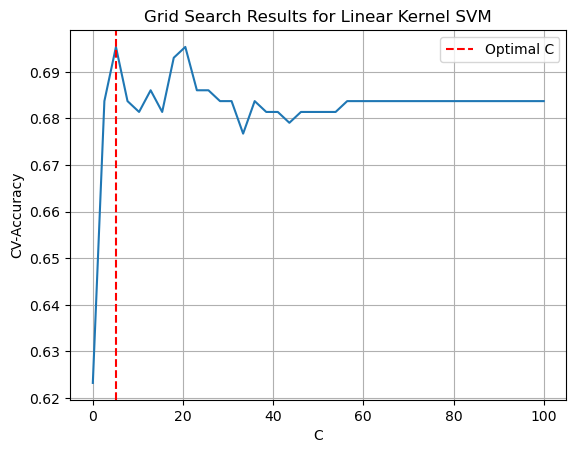

In [208]:
# Define the range of 'C' values to test
param_grid = {'C': np.linspace(0.01, 100, 40)}

# Create a linear kernel SVM and perform grid search
linear_svm = GridSearchCV(SVC(kernel='linear'), param_grid, cv=5, scoring='accuracy', refit=True)
linear_svm.fit(normalized_X_train, y_train)

# Print the best 'C' value and its corresponding accuracy
best_C = linear_svm.best_params_['C']
best_cv_accuracy = linear_svm.best_score_

print("Best 'C' for Linear SVM:", best_C)
print("Best cv accuracy:", best_cv_accuracy)

# Get the best model (trained with the best 'C' value)
best_linear_svm_model = linear_svm.best_estimator_

C_values = np.linspace(0.01, 100, 40)
accuracy_scores = linear_svm.cv_results_['mean_test_score']

best_C = C_values[np.argmax(accuracy_scores)]
max_accuracy = np.max(accuracy_scores)

# Plot the C values against cross-validation accuracy
plt.plot(C_values, accuracy_scores)
plt.axvline(x=best_C, color='r', linestyle='--', label='Optimal C')
plt.xlabel('C')
plt.ylabel('CV-Accuracy')
plt.title('Grid Search Results for Linear Kernel SVM')
plt.legend()
plt.grid()
plt.show()

Best C for Linear SVM: 5.14

### Compute the classification metrics on the cross-validation results

In [209]:
# POSITIVE CLASS (1)

# After fitting the grid search, calculate metrics using cross_val_predict
best_linear_svm_model = linear_svm.best_estimator_  # Get the best Linear SVM model with the optimal C

# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_linear_svm = cross_val_predict(best_linear_svm_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_linear_svm = np.mean(accuracy_scores_linear_svm)
std_accuracy_linear_svm = np.std(accuracy_scores_linear_svm)
mean_precision_1_linear_svm = np.mean(precision_scores_1_linear_svm)
std_precision_1_linear_svm = np.std(precision_scores_1_linear_svm)
mean_recall_1_linear_svm = np.mean(recall_scores_1_linear_svm)
std_recall_1_linear_svm = np.std(recall_scores_1_linear_svm)
mean_f1_1_linear_svm = np.mean(f1_scores_1_linear_svm)
std_f1_1_linear_svm = np.std(f1_scores_1_linear_svm)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_linear_svm)
print("Standard Deviation of Accuracy:", std_accuracy_linear_svm)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_linear_svm)
print("Standard Deviation of Precision - 1:", std_precision_1_linear_svm)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_linear_svm)
print("Standard Deviation of Recall - 1:", std_recall_1_linear_svm)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_linear_svm)
print("Standard Deviation of F1-score - 1:", std_f1_1_linear_svm)

Mean Cross-Validation Accuracy: 0.6953488372093023
Standard Deviation of Accuracy: 0.07692016469088943
Mean Cross-Validation Precision - 1: 0.688674507730937
Standard Deviation of Precision - 1: 0.08037939847658589
Mean Cross-Validation Recall - 1: 0.7162790697674419
Standard Deviation of Recall - 1: 0.07699044352207834
Mean Cross-Validation F1-score - 1: 0.7017287214511272
Standard Deviation of F1-score - 1: 0.07659679299614379


In [210]:
# NEGATIVE CLASS (0)

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_linear_svm = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_linear_svm)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_linear_svm = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_linear_svm)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_linear_svm = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_linear_svm)

# compute the mean and the standard deviation
mean_precision_0_linear_svm = np.mean(precision_scores_0_linear_svm)
std_precision_0_linear_svm = np.std(precision_scores_0_linear_svm)
mean_recall_0_linear_svm = np.mean(recall_scores_0_linear_svm)
std_recall_0_linear_svm = np.std(recall_scores_0_linear_svm)
mean_f1_0_linear_svm = np.mean(f1_scores_0_linear_svm)
std_f1_0_linear_svm = np.std(f1_scores_0_linear_svm)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_linear_svm)
print("Standard Deviation of Precision - 0:", std_precision_0_linear_svm)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_linear_svm)
print("Standard Deviation of Recall - 0:", std_recall_0_linear_svm)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_linear_svm)
print("Standard Deviation of F1-score: - 0", std_f1_0_linear_svm)

Mean Cross-Validation Precision - 0: 0.7037412587412587
Standard Deviation of Precision - 0: 0.07464054005339169
Mean Cross-Validation Recall - 0: 0.6744186046511629
Standard Deviation of Recall - 0: 0.08576320425388735
Mean Cross-Validation F1-score: - 0 0.6882311415552875
Standard Deviation of F1-score: - 0 0.07833315257881103


# Linear SVM on the test set 

In [211]:
def LinearSVM(X_train, X_test, y_train, y_test):
    # Create an instance of the Linear SVM model
    clf = SVC(kernel='linear', C=5.14)
    
    # Train the model on the training data
    clf.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = clf.predict(X_test)
    
    # Evaluate the model
    print(classification_report(y_test, y_pred))
    
    return y_pred

In [212]:
y_pred_linear_svm = LinearSVM(normalized_X_train, normalized_X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.73      0.81      0.77        72
           1       0.78      0.71      0.74        72

    accuracy                           0.76       144
   macro avg       0.76      0.76      0.76       144
weighted avg       0.76      0.76      0.76       144



### Study of the Linear SVM function

In [213]:
clf_linear_svm = SVC(kernel='linear', C=5.14)

In [214]:
clf_linear_svm.fit(normalized_X_train, y_train)

SVC(C=5.14, kernel='linear')

In [215]:
y_pred_linear_svm = clf_linear_svm.predict(normalized_X_test)

In [216]:
y_pred_linear_svm

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

## Evaluate the model with classification metrics 

In [217]:
# Test accuracy 
accuracy_linear_svm = np.mean(y_test == y_pred_linear_svm)
print("Accuracy:", accuracy_linear_svm)

Accuracy: 0.7569444444444444


In [218]:
# build the confusion matrix
cm_linear_svm = confusion_matrix(y_test, y_pred_linear_svm)
print(cm_linear_svm)

[[58 14]
 [21 51]]


In [221]:
print("Precision ", precision(cm_linear_svm))

Precision  0.7846153846153846


In [222]:
print("Recall:", recall(cm_linear_svm))

Recall: 0.7083333333333334


In [223]:
print("F1:", f1(cm_linear_svm))

F1: 0.7445255474452555


In [224]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_linear_svm == 1))
tp

51

In [225]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_linear_svm == 0))
tn

58

In [226]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_linear_svm == 1))
fp

14

In [227]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_linear_svm == 0))
fn

21

In [228]:
print("MCC:", mcc(y_test, y_pred_linear_svm))

MCC: 0.5163349229692894


# SVM - Polynomial Kernel

## Grid search to find the optimal parameters for SVM polynomial kernel

- **C**: it controls the trade-off between maximizing the margin and minimizing the classification error. It's a regularization parameter.
- **coef0**: coefficient of the polynomial kernel function
- **degree**: it specifies the degree of the polynomial kernel function

In [229]:
# Polynomial
param_grid = {'C': np.linspace(0.001, 100, 5),
              'coef0': np.linspace(-10, 10, 5),
              'degree': [2, 3, 4]}

# Create a polynomial kernel and perform grid search
poly_svm = GridSearchCV(SVC(kernel='poly'), param_grid,
                        cv=5, scoring='accuracy', refit=True)
poly_svm.fit(normalized_X_train, y_train)

# Print the best hyperparameters and their corresponding accuracy
best_C_poly = poly_svm.best_params_['C']
best_degree_poly = poly_svm.best_params_['degree']
best_coef0_poly = poly_svm.best_params_['coef0']
best_cv_accuracy_poly = poly_svm.best_score_

print("Best 'C' for Polynomial SVM:", best_C_poly)
print("Best degree:", best_degree_poly)
print("Best coef0:", best_coef0_poly)
print("Best cv accuracy:", best_cv_accuracy_poly)

# Get the best model (trained with the best hyperparameters)
best_poly_svm_model = poly_svm.best_estimator_

GridSearchCV(cv=5, estimator=SVC(kernel='poly'),
             param_grid={'C': array([1.000000e-03, 2.500075e+01, 5.000050e+01, 7.500025e+01,
       1.000000e+02]),
                         'coef0': array([-10.,  -5.,   0.,   5.,  10.]),
                         'degree': [2, 3, 4]},
             scoring='accuracy')

Best 'C' for Polynomial SVM: 0.001
Best degree: 3
Best coef0: -10.0
Best cv accuracy: 0.7395348837209302


### Compute the classification metrics on the cross-validation results

In [230]:
# POSITIVE CLASS (1)


# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_poly_svm = cross_val_predict(best_poly_svm_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_poly_svm = np.mean(accuracy_scores_poly_svm)
std_accuracy_poly_svm = np.std(accuracy_scores_poly_svm)
mean_precision_1_poly_svm = np.mean(precision_scores_1_poly_svm)
std_precision_1_poly_svm = np.std(precision_scores_1_poly_svm)
mean_recall_1_poly_svm = np.mean(recall_scores_1_poly_svm)
std_recall_1_poly_svm = np.std(recall_scores_1_poly_svm)
mean_f1_1_poly_svm = np.mean(f1_scores_1_poly_svm)
std_f1_1_poly_svm = np.std(f1_scores_1_poly_svm)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_poly_svm)
print("Standard Deviation of Accuracy:", std_accuracy_poly_svm)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_poly_svm)
print("Standard Deviation of Precision - 1:", std_precision_1_poly_svm)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_poly_svm)
print("Standard Deviation of Recall - 1:", std_recall_1_poly_svm)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_poly_svm)
print("Standard Deviation of F1-score - 1:", std_f1_1_poly_svm)

Mean Cross-Validation Accuracy: 0.7395348837209302
Standard Deviation of Accuracy: 0.04449099179002092
Mean Cross-Validation Precision - 1: 0.697510304495451
Standard Deviation of Precision - 1: 0.03455877045752771
Mean Cross-Validation Recall - 1: 0.8465116279069766
Standard Deviation of Recall - 1: 0.07865830011761751
Mean Cross-Validation F1-score - 1: 0.7635371106815866
Standard Deviation of F1-score - 1: 0.04616504736649804


In [231]:
# NEGATIVE CLASS (0)

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_poly_svm = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_poly_svm)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_poly_svm = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_poly_svm)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_poly_svm = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_poly_svm)

# compute the mean and the standard deviation
mean_precision_0_poly_svm = np.mean(precision_scores_0_poly_svm)
std_precision_0_poly_svm = np.std(precision_scores_0_poly_svm)
mean_recall_0_poly_svm = np.mean(recall_scores_0_poly_svm)
std_recall_0_poly_svm = np.std(recall_scores_0_poly_svm)
mean_f1_0_poly_svm = np.mean(f1_scores_0_poly_svm)
std_f1_0_poly_svm = np.std(f1_scores_0_poly_svm)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_poly_svm)
print("Standard Deviation of Precision - 0:", std_precision_0_poly_svm)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_poly_svm)
print("Standard Deviation of Recall - 0:", std_recall_0_poly_svm)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_poly_svm)
print("Standard Deviation of F1-score: - 0", std_f1_0_poly_svm)

Mean Cross-Validation Precision - 0: 0.8127830833713187
Standard Deviation of Precision - 0: 0.07763859161279313
Mean Cross-Validation Recall - 0: 0.6325581395348837
Standard Deviation of Recall - 0: 0.055813953488372106
Mean Cross-Validation F1-score: - 0 0.7081951275083496
Standard Deviation of F1-score: - 0 0.047173619918577284


## Polynomial SVM on the test set 

In [232]:
def PolySVM(X_train, X_test, y_train, y_test):
    # Create an instance of the Linear SVM model
    clf = SVC(kernel='poly', C=0.001, degree=3, coef0=-10)
    
    # Train the model on the training data
    clf.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = clf.predict(X_test)
    
    # Evaluate the model
    print(classification_report(y_test, y_pred))
    
    return y_pred

In [233]:
y_pred_poly_svm = PolySVM(normalized_X_train, normalized_X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.79      0.78      0.78        72
           1       0.78      0.79      0.79        72

    accuracy                           0.78       144
   macro avg       0.78      0.78      0.78       144
weighted avg       0.78      0.78      0.78       144



### Study of the Polynomial SVM function

In [234]:
clf_poly_svm = SVC(kernel='poly', C=0.001, degree=3, coef0=-10)

In [235]:
clf_poly_svm.fit(normalized_X_train, y_train)

SVC(C=0.001, coef0=-10, kernel='poly')

In [236]:
y_pred_poly_svm = clf_poly_svm.predict(normalized_X_test)

In [237]:
y_pred_poly_svm

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

## Evaluate the model with classification metrics 

In [238]:
# Test accuracy 
accuracy_poly_svm = np.mean(y_test == y_pred_poly_svm)
print("Accuracy:", accuracy_poly_svm)

Accuracy: 0.7847222222222222


In [239]:
# build the confusion matrix
cm_poly_svm = confusion_matrix(y_test, y_pred_poly_svm)
print(cm_poly_svm)

[[56 16]
 [15 57]]


In [242]:
print("Precision ", precision(cm_poly_svm))

Precision  0.7808219178082192


In [243]:
print("Recall:", recall(cm_poly_svm))

Recall: 0.7916666666666666


In [244]:
print("F1:", f1(cm_poly_svm))

F1: 0.7862068965517242


In [245]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_poly_svm == 1))
tp

57

In [246]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_poly_svm == 0))
tn

56

In [247]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_poly_svm == 1))
fp

16

In [248]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_poly_svm == 0))
fn

15

In [249]:
print("MCC:", mcc(y_test, y_pred_poly_svm))

MCC: 0.5694993756599722


# SMV - Radial Kernel

## Grid search to find the optimal parameters for SVM radial kernel

- **C**: it controls the trade-off between maximizing the margin and minimizing the classification error. It's a regularization parameter.
- **Gamma**: kernel coefficient that controls the flexibility of the SVM's decision boundary: 

        1. Small Gamma (e.g., 0.01): The decision boundary is smoother and broader. It considers more data points and is less likely to overfit.
        2. Large Gamma (e.g., 10): The decision boundary is more flexible, curving closely to individual data points. It's more likely to overfit.

In [250]:
# RBF (Radial Basis Function) kernel
param_grid = {'C': np.linspace(0.001, 100, 5),
              'gamma': np.linspace(0.001, 100, 5)}

# Create an RBF kernel SVM and perform grid search
rbf_svm = GridSearchCV(SVC(kernel='rbf'), param_grid, 
                        cv=5, scoring='accuracy', refit=True)
rbf_svm.fit(normalized_X_train, y_train)

# Print the best hyperparameters and their corresponding accuracy
best_C_rbf = rbf_svm.best_params_['C']
best_gamma_rbf = rbf_svm.best_params_['gamma']
best_cv_accuracy_rbf = rbf_svm.best_score_

print("Best 'C' for RBF SVM:", best_C_rbf)
print("Best gamma:", best_gamma_rbf)
print("Best cv accuracy:", best_cv_accuracy_rbf)

# Get the best model (trained with the best hyperparameters)
best_rbf_svm_model = rbf_svm.best_estimator_

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([1.000000e-03, 2.500075e+01, 5.000050e+01, 7.500025e+01,
       1.000000e+02]),
                         'gamma': array([1.000000e-03, 2.500075e+01, 5.000050e+01, 7.500025e+01,
       1.000000e+02])},
             scoring='accuracy')

Best 'C' for RBF SVM: 50.000499999999995
Best gamma: 0.001
Best cv accuracy: 0.7395348837209302


### Compute the classification metrics on the cross-validation results

In [251]:
# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_radial_svm = cross_val_predict(best_rbf_svm_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_radial_svm = np.mean(accuracy_scores_radial_svm)
std_accuracy_radial_svm = np.std(accuracy_scores_radial_svm)
mean_precision_1_radial_svm = np.mean(precision_scores_1_radial_svm)
std_precision_1_radial_svm = np.std(precision_scores_1_radial_svm)
mean_recall_1_radial_svm = np.mean(recall_scores_1_radial_svm)
std_recall_1_radial_svm = np.std(recall_scores_1_radial_svm)
mean_f1_1_radial_svm = np.mean(f1_scores_1_radial_svm)
std_f1_1_radial_svm = np.std(f1_scores_1_radial_svm)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_radial_svm)
print("Standard Deviation of Accuracy:", std_accuracy_radial_svm)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_radial_svm)
print("Standard Deviation of Precision - 1:", std_precision_1_radial_svm)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_radial_svm)
print("Standard Deviation of Recall - 1:", std_recall_1_radial_svm)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_radial_svm)
print("Standard Deviation of F1-score - 1:", std_f1_1_radial_svm)

Mean Cross-Validation Accuracy: 0.7395348837209302
Standard Deviation of Accuracy: 0.04799945916407046
Mean Cross-Validation Precision - 1: 0.6981682741038113
Standard Deviation of Precision - 1: 0.03193809537975392
Mean Cross-Validation Recall - 1: 0.8418604651162791
Standard Deviation of Recall - 1: 0.08994920746890102
Mean Cross-Validation F1-score - 1: 0.7618929315422837
Standard Deviation of F1-score - 1: 0.05134406074147155


In [252]:
# NEGATIVE CLASS (0)

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_radial_svm = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_radial_svm)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_radial_svm = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_radial_svm)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_radial_svm = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_radial_svm)

# compute the mean and the standard deviation
mean_precision_0_radial_svm = np.mean(precision_scores_0_radial_svm)
std_precision_0_radial_svm = np.std(precision_scores_0_radial_svm)
mean_recall_0_radial_svm = np.mean(recall_scores_0_radial_svm)
std_recall_0_radial_svm = np.std(recall_scores_0_radial_svm)
mean_f1_0_radial_svm = np.mean(f1_scores_0_radial_svm)
std_f1_0_radial_svm = np.std(f1_scores_0_radial_svm)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_radial_svm)
print("Standard Deviation of Precision - 0:", std_precision_0_radial_svm)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_radial_svm)
print("Standard Deviation of Recall - 0:", std_recall_0_radial_svm)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_radial_svm)
print("Standard Deviation of F1-score: - 0", std_f1_0_radial_svm)

Mean Cross-Validation Precision - 0: 0.811118657482673
Standard Deviation of Precision - 0: 0.09111441997995766
Mean Cross-Validation Recall - 0: 0.6372093023255814
Standard Deviation of Recall - 0: 0.04313310928137536
Mean Cross-Validation F1-score: - 0 0.7108201648607173
Standard Deviation of F1-score: - 0 0.04534869219251652


### Radial SVM on the test set 

In [253]:
def RadialSVM(X_train, X_test, y_train, y_test):
    # Create an instance of the Linear SVM model
    clf = SVC(kernel='rbf', C=50, gamma=0.001)
    
    # Train the model on the training data
    clf.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = clf.predict(X_test)
    
    # Evaluate the model
    print(classification_report(y_test, y_pred))
    
    return y_pred

In [254]:
y_pred_radial_svm = RadialSVM(normalized_X_train, normalized_X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.82      0.81      0.81        72
           1       0.81      0.82      0.81        72

    accuracy                           0.81       144
   macro avg       0.81      0.81      0.81       144
weighted avg       0.81      0.81      0.81       144



### Study of the Radial SVM function

In [255]:
clf_radial_svm = SVC(kernel='rbf', C=50, gamma=0.001)

In [256]:
clf_radial_svm.fit(normalized_X_train, y_train)

SVC(C=50, gamma=0.001)

In [257]:
y_pred_radial_svm = clf_radial_svm.predict(normalized_X_test)

In [258]:
y_pred_radial_svm

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

## Evaluate the model with classification metrics 

In [259]:
# Test accuracy 
accuracy_radial_svm = np.mean(y_test == y_pred_radial_svm)
print("Accuracy:", accuracy_radial_svm)

Accuracy: 0.8125


In [260]:
# build the confusion matrix
cm_radial_svm = confusion_matrix(y_test, y_pred_radial_svm)
print(cm_radial_svm)

[[58 14]
 [13 59]]


In [263]:
print("Precision ", precision(cm_radial_svm))

Precision  0.8082191780821918


In [264]:
print("Recall:", recall(cm_radial_svm))

Recall: 0.8194444444444444


In [265]:
print("F1:", f1(cm_radial_svm))

F1: 0.8137931034482759


In [266]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_radial_svm == 1))
tp

59

In [267]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_radial_svm == 0))
tn

58

In [268]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_radial_svm == 1))
fp

14

In [269]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_radial_svm == 0))
fn

13

In [270]:
print("MCC:", mcc(y_test, y_pred_radial_svm))

MCC: 0.6250602903585061


# Random Forest

## Grid search to find the optimal parameters for Random Forest 

Perform a GridSearch for the mtry parameter of Random Forest.
The GridSearchCV will automatically perform cross-validation, evaluate the performance of the Random Forest with different 'max_features' values, and return the best parameter value based on the chosen scoring metric.

**NOTE 1:** the 'max_features' parameter determines the number of features randomly selected at each split point when building a tree in a random forest: a smaller 'max_features' value leads to more randomness and diversity among the trees, while a larger 'max_features' value reduces the randomness and increases the correlation between the trees.

**NOTE 2:** the Out-Of-Bag (OOB) score is a measure of a model's accuracy. It is calculated based on out-of-bag samples, which are the data points that were not used during training for each tree in the Random Forest. These out-of-bag samples are used to estimate the model's accuracy without the need for a separate validation set. The OOB score is a valuable metric because it provides an estimate of how well the Random Forest model is likely to perform on unseen data.

In [271]:
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest Classifier
rf = RandomForestClassifier(random_state=123, oob_score=True)

# Define the grid of parameters to search over, including max_features and n_estimators
param_grid = {
    'max_features': [15, 18, 20, 25, 30, 31, 32, 33, 40, 45, 50],
    'n_estimators': [100, 200, 300, 400]  # Specify the values of n_estimators to try
}

# Create an instance of GridSearchCV and pass the Random Forest classifier, parameter grid, and desired number of cross-validation folds
grid_search_random_forest = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

# Fit the Grid search object to your data
grid_search_random_forest.fit(normalized_X_train, y_train)

print("Best parameters:", grid_search_random_forest.best_params_)
print("Best cross-validation score (accuracy):", grid_search_random_forest.best_score_)
print("OOB score of best model:", grid_search_random_forest.best_estimator_.oob_score_)


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(oob_score=True, random_state=123),
             param_grid={'max_features': [15, 18, 20, 25, 30, 31, 32, 33, 40,
                                          45, 50],
                         'n_estimators': [100, 200, 300, 400]})

Best parameters: {'max_features': 18, 'n_estimators': 200}
Best cross-validation score (accuracy): 0.7325581395348837
OOB score of best model: 0.7395348837209302


### Compute the classification metrics on the cross-validation results 

In [272]:
# POSITIVE CLASS (1)

# After fitting the grid search, calculate metrics using cross_val_predict
best_rf_model = grid_search_random_forest.best_estimator_  # Get the best Random Forest model with the optimal parameters

# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_rf = cross_val_predict(best_rf_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_rf = np.mean(accuracy_scores_rf)
std_accuracy_rf = np.std(accuracy_scores_rf)
mean_precision_1_rf = np.mean(precision_scores_1_rf)
std_precision_1_rf = np.std(precision_scores_1_rf)
mean_recall_1_rf = np.mean(recall_scores_1_rf)
std_recall_1_rf = np.std(recall_scores_1_rf)
mean_f1_1_rf = np.mean(f1_scores_1_rf)
std_f1_1_rf = np.std(f1_scores_1_rf)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_rf)
print("Standard Deviation of Accuracy:", std_accuracy_rf)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_rf)
print("Standard Deviation of Precision - 1:", std_precision_1_rf)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_rf)
print("Standard Deviation of Recall - 1:", std_recall_1_rf)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_rf)
print("Standard Deviation of F1-score - 1:", std_f1_1_rf)

Mean Cross-Validation Accuracy: 0.7325581395348837
Standard Deviation of Accuracy: 0.030321871652105356
Mean Cross-Validation Precision - 1: 0.7209624624624625
Standard Deviation of Precision - 1: 0.03129970130740169
Mean Cross-Validation Recall - 1: 0.7627906976744185
Standard Deviation of Recall - 1: 0.06804064575966415
Mean Cross-Validation F1-score - 1: 0.739233562136788
Standard Deviation of F1-score - 1: 0.0358011422079591


In [273]:
# NEGATIVE CLASS (0)

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_rf = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_rf)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_rf = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_rf)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_rf = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_rf)

# compute the mean and the standard deviation
mean_precision_0_rf = np.mean(precision_scores_0_rf)
std_precision_0_rf = np.std(precision_scores_0_rf)
mean_recall_0_rf = np.mean(recall_scores_0_rf)
std_recall_0_rf = np.std(recall_scores_0_rf)
mean_f1_0_rf = np.mean(f1_scores_0_rf)
std_f1_0_rf = np.std(f1_scores_0_rf)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_rf)
print("Standard Deviation of Precision - 0:", std_precision_0_rf)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_rf)
print("Standard Deviation of Recall - 0:", std_recall_0_rf)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_rf)
print("Standard Deviation of F1-score: - 0", std_f1_0_rf)

Mean Cross-Validation Precision - 0: 0.7512915564171754
Standard Deviation of Precision - 0: 0.04658250213349131
Mean Cross-Validation Recall - 0: 0.7023255813953488
Standard Deviation of Recall - 0: 0.0538411018734429
Mean Cross-Validation F1-score: - 0 0.723864753712488
Standard Deviation of F1-score: - 0 0.03157916708146925


In [277]:
def RF(X_train, X_test, y_train, y_test):
    
    clf = RandomForestClassifier(max_features=18, n_estimators=200, random_state=123) # The default value for max_features in scikit-learn's RandomForestClassifier is "auto", which means that the number of features considered for splitting at each tree node is equal to the square root of the total number of features.

    clf.fit(X_train, y_train.values.ravel())

    y_pred = clf.predict(X_test)

    # Valutazione del modello
    print(classification_report(y_test, y_pred))
    
    return y_pred

In [278]:
y_pred_rf = RF(normalized_X_train, normalized_X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.79      0.81      0.80        72
           1       0.80      0.79      0.80        72

    accuracy                           0.80       144
   macro avg       0.80      0.80      0.80       144
weighted avg       0.80      0.80      0.80       144



### Study the Random Forest function

In [279]:
clf_rf = RandomForestClassifier(max_features=18, n_estimators=200, random_state=123)

In [280]:
clf_rf.fit(normalized_X_train, y_train)

RandomForestClassifier(max_features=18, n_estimators=200, random_state=123)

In [281]:
y_pred_rf = clf_rf.predict(normalized_X_test)

In [282]:
y_pred_rf

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

## Evaluate the model with classification metrics 

In [283]:
# Test accuracy 
accuracy_rf = np.mean(y_test == y_pred_rf)
print("Accuracy:", accuracy_rf)

Accuracy: 0.7986111111111112


In [284]:
# build the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

[[58 14]
 [15 57]]


In [286]:
print("Precision ", precision(cm_rf))

Precision  0.8028169014084507


In [287]:
print("Recall:", recall(cm_rf))

Recall: 0.7916666666666666


In [288]:
print("F1:", f1(cm_rf))

F1: 0.7972027972027971


In [289]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_rf == 1))
tp

57

In [290]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_rf == 0))
tn

58

In [291]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_rf == 1))
fp

14

In [292]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_rf == 0))
fn

15

In [293]:
print("MCC:", mcc(y_test, y_pred_rf))

MCC: 0.5972798330092391


# Extreme Gradient Boosting (XGBoost)

## Grid search to find the optimal parameters for XGBoost

### Boosting
In boosting, the trees are built sequentially such that each subsequent tree aims to reduce the errors of the previous tree. Each tree learns from its predecessors and updates the residual errors. Hence, the tree that grows next in the sequence will learn from an updated version of the residuals.

The base learners in boosting are weak learners in which the bias is high, and the predictive power is just a tad better than random guessing. Each of these weak learners contributes some vital information for prediction, enabling the boosting technique to produce a strong learner by effectively combining these weak learners. The final strong learner brings down both the bias and the variance.

In contrast to bagging techniques like Random Forest, in which trees are grown to their maximum extent, boosting makes use of trees with fewer splits. Such small trees, which are not very deep, are highly interpretable. Parameters like the number of trees or iterations, the rate at which the gradient boosting learns, and the depth of the tree, could be optimally selected through validation techniques like k-fold cross validation. Having a large number of trees might lead to overfitting. So, it is necessary to carefully choose the stopping criteria for boosting.

XGBoost offers a wide range of **hyperparameters** that you can fine-tune to optimize the model's performance. Here are some of the most commonly tuned hyperparameters in XGBoost:

1. **Learning Rate (eta)**:
    - Parameter name: eta
    - Description: Learning rate controls the step size at each iteration          while moving toward a minimum of a loss function. Lower values make the      optimization more robust but require more boosting rounds
    
    
2. **Maximum Depth of Trees (max_depth):**
    - Parameter name: max_depth
    - Description: It specifies the maximum depth of the individual trees. Deeper trees can model more complex relationships but are more prone to overfitting.
    
    
3. **Number of Trees (n_estimators):**
    - Parameter name: n_estimators
    - Description: It determines the number of boosting rounds (trees) to train. More rounds can improve performance, but you should be cautious of overfitting.
    
    
4. **Column Subsampling (colsample_bytree and colsample_bylevel):**
    - Parameter name: colsample_bytree and colsample_bylevel
    - Description: These parameters control the fraction of features (columns) to be randomly sampled for building each tree and each level of a tree, respectively.
    
    
5. **Regularization Parameter (gamma):**
    - Parameter names: gamma
    - Description: used for controlling regularization. The gamma hyperparameter is related to the minimum loss reduction required to make a further partition on a leaf node of the tree. (default value = 0 --> no regularization is applied and the tree can grow as deep as necessary to fit the training data)

In [274]:
# Define the parameter grid for grid search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [5, 6, 8, 9],
    'n_estimators': [100, 200, 300],
    #'colsample_bytree': [0.5, 0.75, 1.0],
    #'gamma': [0, 0.1, 0.2] 
}

# Create an instance of the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic')

# Create the GridSearchCV object
grid_search_xgb = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your training data
grid_search_xgb.fit(X_train, y_train)

# Print the best hyperparameters and their corresponding accuracy
best_learning_rate = grid_search_xgb.best_params_['learning_rate']
best_max_depth = grid_search_xgb.best_params_['max_depth']
best_n_estimators = grid_search_xgb.best_params_['n_estimators']
#best_colsample_bytree = grid_search_xgb.best_params_['colsample_bytree']

best_accuracy = grid_search_xgb.best_score_

print("Best Learning Rate:", best_learning_rate)
print("Best Max Depth:", best_max_depth)
print("Best Number of Trees:", best_n_estimators)
#print("Best Column Subsampling:", best_colsample_bytree)
print("Best Accuracy:", best_accuracy)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [5, 6, 8, 9],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

Best Learning Rate: 0.01
Best Max Depth: 9
Best Number of Trees: 300
Best Accuracy: 0.7372093023255814


### Compute the classification metrics on the cross-validation results 

In [275]:
# POSITIVE CLASS (1)

# After fitting the grid search, calculate metrics using cross_val_predict
best_xgb_model = grid_search_xgb.best_estimator_  # Get the best xgb model with the optimal parameters

# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_xgb = cross_val_predict(best_xgb_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_xgb = np.mean(accuracy_scores_xgb)
std_accuracy_xgb = np.std(accuracy_scores_xgb)
mean_precision_1_xgb = np.mean(precision_scores_1_xgb)
std_precision_1_xgb = np.std(precision_scores_1_xgb)
mean_recall_1_xgb = np.mean(recall_scores_1_xgb)
std_recall_1_xgb = np.std(recall_scores_1_xgb)
mean_f1_1_xgb = np.mean(f1_scores_1_xgb)
std_f1_1_xgb = np.std(f1_scores_1_xgb)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_xgb)
print("Standard Deviation of Accuracy:", std_accuracy_xgb)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_xgb)
print("Standard Deviation of Precision - 1:", std_precision_1_xgb)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_xgb)
print("Standard Deviation of Recall - 1:", std_recall_1_xgb)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_xgb)
print("Standard Deviation of F1-score - 1:", std_f1_1_xgb)

Mean Cross-Validation Accuracy: 0.7372093023255814
Standard Deviation of Accuracy: 0.030852323631213038
Mean Cross-Validation Precision - 1: 0.7199043828057539
Standard Deviation of Precision - 1: 0.019166176045283118
Mean Cross-Validation Recall - 1: 0.7767441860465117
Standard Deviation of Recall - 1: 0.07865830011761751
Mean Cross-Validation F1-score - 1: 0.7453129818069688
Standard Deviation of F1-score - 1: 0.042401771558303554


In [276]:
# NEGATIVE CLASS (0)

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_xgb = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_xgb)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_xgb = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_xgb)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_xgb = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_xgb)

# compute the mean and the standard deviation
mean_precision_0_xgb = np.mean(precision_scores_0_xgb)
std_precision_0_xgb = np.std(precision_scores_0_xgb)
mean_recall_0_xgb = np.mean(recall_scores_0_xgb)
std_recall_0_xgb = np.std(recall_scores_0_xgb)
mean_f1_0_xgb = np.mean(f1_scores_0_xgb)
std_f1_0_xgb = np.std(f1_scores_0_xgb)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_xgb)
print("Standard Deviation of Precision - 0:", std_precision_0_xgb)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_xgb)
print("Standard Deviation of Recall - 0:", std_recall_0_xgb)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_xgb)
print("Standard Deviation of F1-score: - 0", std_f1_0_xgb)

Mean Cross-Validation Precision - 0: 0.763162884138494
Standard Deviation of Precision - 0: 0.052859077170311075
Mean Cross-Validation Recall - 0: 0.6976744186046512
Standard Deviation of Recall - 0: 0.0389144198387942
Mean Cross-Validation F1-score: - 0 0.7267399267399268
Standard Deviation of F1-score: - 0 0.024274136876557585


In [95]:
def XGBoost(X_train, X_test, y_train, y_test):
    
    clf = xgb.XGBClassifier(objective="binary:logistic", learning_rate=0.01, n_estimators=300, max_depth=9, random_state=123) 

    clf.fit(X_train, y_train.values.ravel())

    y_pred = clf.predict(X_test)

    # Valutazione del modello
    print(classification_report(y_test, y_pred))
    
    return y_pred

In [96]:
y_pred_xgb = XGBoost(normalized_X_train, normalized_X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        72
           1       0.83      0.83      0.83        72

    accuracy                           0.83       144
   macro avg       0.83      0.83      0.83       144
weighted avg       0.83      0.83      0.83       144



### Study the eXtreme Gradient Boosting function

In [95]:
clf_xgb = xgb.XGBClassifier(objective="binary:logistic", learning_rate=0.01, n_estimators=300, max_depth=9, random_state=123) 

In [96]:
clf_xgb.fit(normalized_X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=123, ...)

In [97]:
y_pred_xgb = clf_xgb.predict(normalized_X_test)

In [98]:
y_test

brca_smc_2018_BB01_130    0
brca_smc_2018_BB01_110    1
brca_smc_2018_BB01_037    1
brca_smc_2018_BB01_126    1
brca_smc_2018_BR097       1
                         ..
MBCProject_27uAugT4       0
MBCProject_2kS5fYc1       0
MBCProject_7oIotZSe       0
MBCProject_LVSjf8h7       0
MBCProject_pktAIxFb       0
Name: Target, Length: 144, dtype: int64

In [99]:
y_pred_xgb

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [100]:
y_pred_xgb_df = pd.DataFrame(y_pred_xgb)
y_pred_xgb_df = y_pred_xgb_df.rename(columns={0: 'Predicted value'})
y_pred_xgb_df

Predicted value
0                  0
1                  1
2                  1
3                  1
4                  0
..               ...
139                1
140                0
141                0
142                0
143                0

[144 rows x 1 columns]

In [101]:
y_test_df = y_test.to_frame()
y_test_df

Target
brca_smc_2018_BB01_130       0
brca_smc_2018_BB01_110       1
brca_smc_2018_BB01_037       1
brca_smc_2018_BB01_126       1
brca_smc_2018_BR097          1
...                        ...
MBCProject_27uAugT4          0
MBCProject_2kS5fYc1          0
MBCProject_7oIotZSe          0
MBCProject_LVSjf8h7          0
MBCProject_pktAIxFb          0

[144 rows x 1 columns]

In [102]:
y_test_pts_list = y_test_df.index.to_list()
y_test_pts_list

['brca_smc_2018_BB01_130',
 'brca_smc_2018_BB01_110',
 'brca_smc_2018_BB01_037',
 'brca_smc_2018_BB01_126',
 'brca_smc_2018_BR097',
 'brca_smc_2018_BR105',
 'brca_smc_2018_BR145',
 'brca_smc_2018_BR301',
 'brca_smc_2018_BR419',
 'BR-M-045',
 'BR-M-122',
 'PD4133a',
 'PD4252a',
 'X11BR003',
 'X18BR002',
 'X20BR008',
 'TCGA-A2-A04P',
 'TCGA-A2-A0D0',
 'TCGA-A2-A0T2',
 'TCGA-A2-A0YE',
 'TCGA-A2-A1G1',
 'TCGA-A2-A3Y0',
 'TCGA-A7-A0CE',
 'TCGA-A7-A0DA',
 'TCGA-A8-A07O',
 'TCGA-AC-A6IW',
 'TCGA-AN-A0AL',
 'TCGA-AO-A129',
 'TCGA-AR-A0TP',
 'TCGA-AR-A0U0',
 'TCGA-AR-A1AJ',
 'TCGA-B6-A0I1',
 'TCGA-B6-A0I2',
 'TCGA-B6-A409',
 'TCGA-BH-A0AV',
 'TCGA-BH-A0BL',
 'TCGA-BH-A0E0',
 'TCGA-C8-A131',
 'TCGA-C8-A1HJ',
 'TCGA-C8-A27B',
 'TCGA-D8-A142',
 'TCGA-D8-A27F',
 'TCGA-E2-A14N',
 'TCGA-E2-A14R',
 'TCGA-E2-A14Y',
 'TCGA-E2-A573',
 'TCGA-E9-A1N8',
 'TCGA-E9-A243',
 'TCGA-E9-A244',
 'TCGA-OL-A5S0',
 'TCGA-OL-A66I',
 'MBC_85',
 'MBC_93',
 'MBC_120',
 'MBC_132',
 'MBC_142',
 'MBC_163',
 'MBC_167',
 'MBC_

In [103]:
y_pred_xgb_df_2 = y_pred_xgb_df.set_index(pd.Index(y_test_pts_list))
y_pred_xgb_df_2

Predicted value
brca_smc_2018_BB01_130                0
brca_smc_2018_BB01_110                1
brca_smc_2018_BB01_037                1
brca_smc_2018_BB01_126                1
brca_smc_2018_BR097                   0
...                                 ...
MBCProject_27uAugT4                   1
MBCProject_2kS5fYc1                   0
MBCProject_7oIotZSe                   0
MBCProject_LVSjf8h7                   0
MBCProject_pktAIxFb                   0

[144 rows x 1 columns]

In [104]:
# merge the two dataframes
y_test_and_pred_xgb = pd.merge(y_test_df, y_pred_xgb_df_2, left_index=True, right_index=True)
y_test_and_pred_xgb

Target  Predicted value
brca_smc_2018_BB01_130       0                0
brca_smc_2018_BB01_110       1                1
brca_smc_2018_BB01_037       1                1
brca_smc_2018_BB01_126       1                1
brca_smc_2018_BR097          1                0
...                        ...              ...
MBCProject_27uAugT4          0                1
MBCProject_2kS5fYc1          0                0
MBCProject_7oIotZSe          0                0
MBCProject_LVSjf8h7          0                0
MBCProject_pktAIxFb          0                0

[144 rows x 2 columns]

In [105]:
y_test_and_pred_xgb = y_test_and_pred_xgb.reset_index().rename(columns={'index': 'Patient'})
y_test_and_pred_xgb

Patient  Target  Predicted value
0    brca_smc_2018_BB01_130       0                0
1    brca_smc_2018_BB01_110       1                1
2    brca_smc_2018_BB01_037       1                1
3    brca_smc_2018_BB01_126       1                1
4       brca_smc_2018_BR097       1                0
..                      ...     ...              ...
139     MBCProject_27uAugT4       0                1
140     MBCProject_2kS5fYc1       0                0
141     MBCProject_7oIotZSe       0                0
142     MBCProject_LVSjf8h7       0                0
143     MBCProject_pktAIxFb       0                0

[144 rows x 3 columns]

In [106]:
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Test_patients")
y_test_and_pred_xgb.to_csv('Test_patients_predicted_values_xgb_4A.txt', index=False, sep='\t')

## Evaluate the model with classification metrics 

In [107]:
# Test accuracy 
accuracy_xgb = np.mean(y_test == y_pred_xgb)
print("Accuracy:", accuracy_xgb)

Accuracy: 0.8333333333333334


In [108]:
# build the confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print(cm_xgb)

[[60 12]
 [12 60]]


In [109]:
print("Precision ", precision(cm_xgb))

NameError: name 'precision' is not defined

In [ ]:
print("Recall:", recall(cm_xgb))

In [ ]:
print("F1:", f1(cm_xgb))

In [110]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_xgb == 1))
tp

60

In [111]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_xgb == 0))
tn

60

In [112]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_xgb == 1))
fp

12

In [113]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_xgb == 0))
fn

12

In [114]:
print("MCC:", mcc(y_test, y_pred_xgb))

NameError: name 'mcc' is not defined

## Feature importance analysis for XGBoost - ShAP (Shapley Additive exPlanations)

In [115]:
shap.initjs()

In [116]:
# Create a SHAP explainer (TreeExplainer is more accurate for tree-based models like XGBoost)
explainer_xgb = shap.TreeExplainer(clf_xgb)
# Calcola i valori Shapley per le feature del modello addestrato
# Compute the SHAP values for the test data 
shap_values_xgb = explainer_xgb(normalized_X_test) 

In [117]:
shap_values_xgb2 = explainer_xgb.shap_values(normalized_X_test) 
shap_values_xgb2

array([[-0.07859266,  0.        ,  0.00660305, ...,  0.        ,
         0.        ,  0.        ],
       [-0.04889907,  0.        ,  0.00952914, ...,  0.        ,
         0.        ,  0.        ],
       [-0.04718171,  0.        ,  0.00952914, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.08646817,  0.        ,  0.0041953 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.08516762,  0.        ,  0.0053518 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.08431409,  0.        ,  0.00946001, ...,  0.        ,
         0.        ,  0.        ]], dtype=float32)

In [118]:
shap_values_xgb2.shape

(144, 349)

In [119]:
explainer_xgb

In [120]:
shap_values_xgb

.values =
array([[-0.07859266,  0.        ,  0.00660305, ...,  0.        ,
         0.        ,  0.        ],
       [-0.04889907,  0.        ,  0.00952914, ...,  0.        ,
         0.        ,  0.        ],
       [-0.04718171,  0.        ,  0.00952914, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.08646817,  0.        ,  0.0041953 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.08516762,  0.        ,  0.0053518 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.08431409,  0.        ,  0.00946001, ...,  0.        ,
         0.        ,  0.        ]], dtype=float32)

.base_values =
array([0.01690945, 0.01690945, 0.01690945, 0.01690945, 0.01690945,
       0.01690945, 0.01690945, 0.01690945, 0.01690945, 0.01690945,
       0.01690945, 0.01690945, 0.01690945, 0.01690945, 0.01690945,
       0.01690945, 0.01690945, 0.01690945, 0.01690945, 0.01690945,
       0.01690945, 0.01690945, 0.01690945, 0.01690945, 0.01690945,
       0.01

In [121]:
# Calculate Absolute Mean SHAP Values
shap_abs_xgb = np.abs(shap_values_xgb2)
# Calculate the Mean of Absolute SHAP Values for Each Instance
# it gives a measure of the average impact of each feature for each instance
k_xgb = shap_abs_xgb.mean(axis=0)
k_xgb

array([9.09054354e-02, 0.00000000e+00, 2.87278518e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.06417917e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.27543882e-01, 2.11388305e-01, 8.02175552e-02,
       1.60007447e-01, 1.06406294e-01, 6.35357127e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.30681705e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 5.17393649e-01, 1.20397070e-02, 0.00000000e+00,
       0.00000000e+00, 1.42741390e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.54093052e-02, 1.58104524e-02, 0.00000000e+00,
      

In [122]:
shap_abs_xgb.shape

(144, 349)

In [123]:
k_xgb.shape

(349,)

In [124]:
normalized_X_test.shape

(144, 349)

In [125]:
feature_importance_xgb = pd.DataFrame({'col_name': normalized_X_test.columns, 'feature_importance_vals': k_xgb})
feature_importance_xgb = feature_importance_xgb.sort_values(by='feature_importance_vals', ascending=False)
feature_importance_xgb

col_name  feature_importance_vals
45       TP53_noClust                 0.517394
26   PIK3CA_1046_1047                 0.211388
28       TP53_191_199                 0.160007
97     MAP3K1_noClust                 0.149722
25     PIK3CA_545_546                 0.127544
..                ...                      ...
134      GLDC_noClust                 0.000000
133    PTPN22_noClust                 0.000000
132     STAG2_noClust                 0.000000
131     RUNX1_noClust                 0.000000
348  KRTAP5-1_noClust                 0.000000

[349 rows x 2 columns]

In [126]:
len(normalized_X_test.columns)

349

### Prepare the dataset for GSEA analysis
Extract just the gene names (take the first gene name in descending order of feature importance)

In [127]:
feature_importance_xgb

col_name  feature_importance_vals
45       TP53_noClust                 0.517394
26   PIK3CA_1046_1047                 0.211388
28       TP53_191_199                 0.160007
97     MAP3K1_noClust                 0.149722
25     PIK3CA_545_546                 0.127544
..                ...                      ...
134      GLDC_noClust                 0.000000
133    PTPN22_noClust                 0.000000
132     STAG2_noClust                 0.000000
131     RUNX1_noClust                 0.000000
348  KRTAP5-1_noClust                 0.000000

[349 rows x 2 columns]

In [128]:
# Extracting gene name
feature_importance_xgb['Hugo_Symbol'] = feature_importance_xgb['col_name'].str.split('_').str[0]
feature_importance_xgb

col_name  feature_importance_vals Hugo_Symbol
45       TP53_noClust                 0.517394        TP53
26   PIK3CA_1046_1047                 0.211388      PIK3CA
28       TP53_191_199                 0.160007        TP53
97     MAP3K1_noClust                 0.149722      MAP3K1
25     PIK3CA_545_546                 0.127544      PIK3CA
..                ...                      ...         ...
134      GLDC_noClust                 0.000000        GLDC
133    PTPN22_noClust                 0.000000      PTPN22
132     STAG2_noClust                 0.000000       STAG2
131     RUNX1_noClust                 0.000000       RUNX1
348  KRTAP5-1_noClust                 0.000000    KRTAP5-1

[349 rows x 3 columns]

In [129]:
feature_importance_xgb['Hugo_Symbol'].nunique()

304

In [130]:
gsea_prerank_data = feature_importance_xgb[['Hugo_Symbol', 'feature_importance_vals']]
gsea_prerank_data

Hugo_Symbol  feature_importance_vals
45         TP53                 0.517394
26       PIK3CA                 0.211388
28         TP53                 0.160007
97       MAP3K1                 0.149722
25       PIK3CA                 0.127544
..          ...                      ...
134        GLDC                 0.000000
133      PTPN22                 0.000000
132       STAG2                 0.000000
131       RUNX1                 0.000000
348    KRTAP5-1                 0.000000

[349 rows x 2 columns]

In [131]:
gsea_prerank_data.head(50)

Hugo_Symbol  feature_importance_vals
45         TP53                 0.517394
26       PIK3CA                 0.211388
28         TP53                 0.160007
97       MAP3K1                 0.149722
25       PIK3CA                 0.127544
29         TP53                 0.106406
66        GATA3                 0.094592
0          TP53                 0.090905
27         AKT1                 0.080218
30         TP53                 0.063536
11        GATA3                 0.060642
177         VWF                 0.047805
41         TP53                 0.043068
53        KMT2C                 0.035409
196       BRCA1                 0.029414
2        PIK3CA                 0.028728
181      COL4A2                 0.019612
138         RB1                 0.019370
75        ERBB2                 0.019248
68       NOTCH2                 0.017830
151        EML5                 0.016206
76       MAP2K4                 0.016030
54         PTEN                 0.015810
79        TUBD1                 0.015418
111        EPG5                 0.014601
49          NF1                 0.014274
158    TMEM132C                 0.013251
46       PIK3CA                 0.012040
210       ITPR3                 0.010276
85         SZT2                 0.009615
157    C6orf118                 0.009335
229        SMG1                 0.007657
72         SPEN                 0.006262
126       FBXW7                 0.006157
70       RAD54B                 0.005192
61         CBFB                 0.004705
191        AGO1                 0.004696
145      PIK3R1                 0.004651
162       STAB2                 0.003831
87       DOCK11                 0.003506
283       CARD6                 0.003149
227      NUP153                 0.002733
203      MGAT5B                 0.002446
96        ASXL2                 0.002290
110       BRCA2                 0.001689
64       ZNF546                 0.001492
73       DNAH12                 0.001322
244      FANCD2                 0.001272
172       NCOA6                 0.000372
113       ZFHX3                 0.000358

In [132]:
gsea_prerank_data.loc[gsea_prerank_data['feature_importance_vals']==0]

Hugo_Symbol  feature_importance_vals
240        MSH5                      0.0
242      ADORA3                      0.0
241       KMT2E                      0.0
263       GBGT1                      0.0
243        RCC2                      0.0
..          ...                      ...
134        GLDC                      0.0
133      PTPN22                      0.0
132       STAG2                      0.0
131       RUNX1                      0.0
348    KRTAP5-1                      0.0

[296 rows x 2 columns]

In [133]:
# Keep only the first row for each unique gene name
gsea_prerank_data_final = gsea_prerank_data.groupby('Hugo_Symbol').first().reset_index()
gsea_prerank_data_final

Hugo_Symbol  feature_importance_vals
0         ABCG2                 0.000000
1         ACACB                 0.000000
2          ACLY                 0.000000
3        ACVR2A                 0.000000
4        ADORA3                 0.000000
..          ...                      ...
299      ZNF230                 0.000000
300      ZNF546                 0.001492
301      ZNF716                 0.000000
302      ZNF814                 0.000000
303        ZW10                 0.000000

[304 rows x 2 columns]

In [134]:
gsea_prerank_data_final_resorted = gsea_prerank_data_final.sort_values(by='feature_importance_vals', ascending=False)
gsea_prerank_data_final_resorted

Hugo_Symbol  feature_importance_vals
269        TP53                 0.517394
191      PIK3CA                 0.211388
150      MAP3K1                 0.149722
100       GATA3                 0.094592
7          AKT1                 0.080218
..          ...                      ...
116        IBSP                 0.000000
117      ICOSLG                 0.000000
118        IL24                 0.000000
119        IL25                 0.000000
303        ZW10                 0.000000

[304 rows x 2 columns]

In [135]:
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/GSEA_prerank_dataset")
gsea_prerank_data_final_resorted.to_csv('4A_XGBoost_GSEA_prerank_dataset.txt', index=False, sep='\t')

In [136]:
gsea_prerank_data_final_resorted.head(50)

Hugo_Symbol  feature_importance_vals
269        TP53                 0.517394
191      PIK3CA                 0.211388
150      MAP3K1                 0.149722
100       GATA3                 0.094592
7          AKT1                 0.080218
286         VWF                 0.047805
134       KMT2C                 0.035409
26        BRCA1                 0.029414
52       COL4A2                 0.019612
213         RB1                 0.019370
74        ERBB2                 0.019248
177      NOTCH2                 0.017830
70         EML5                 0.016206
149      MAP2K4                 0.016030
206        PTEN                 0.015810
279       TUBD1                 0.015418
72         EPG5                 0.014601
173         NF1                 0.014274
266    TMEM132C                 0.013251
124       ITPR3                 0.010276
255        SZT2                 0.009615
31     C6orf118                 0.009335
241        SMG1                 0.007657
246        SPEN                 0.006262
89        FBXW7                 0.006157
211      RAD54B                 0.005192
35         CBFB                 0.004705
5          AGO1                 0.004696
192      PIK3R1                 0.004651
249       STAB2                 0.003831
65       DOCK11                 0.003506
34        CARD6                 0.003149
178      NUP153                 0.002733
158      MGAT5B                 0.002446
16        ASXL2                 0.002290
27        BRCA2                 0.001689
300      ZNF546                 0.001492
63       DNAH12                 0.001322
85       FANCD2                 0.001272
170       NCOA6                 0.000372
293       ZFHX3                 0.000358
166        MYH9                 0.000278
130    KIAA1109                 0.000141
128    KIAA0195                 0.000116
208      PTPN22                 0.000000
207       PTGS2                 0.000000
205       PTCD3                 0.000000
0         ABCG2                 0.000000
209       RAB42                 0.000000
210      RABEP1                 0.000000

In [137]:
gsea_prerank_data_final.loc[gsea_prerank_data_final['feature_importance_vals']==0]

Hugo_Symbol  feature_importance_vals
0         ABCG2                      0.0
1         ACACB                      0.0
2          ACLY                      0.0
3        ACVR2A                      0.0
4        ADORA3                      0.0
..          ...                      ...
298      ZNF208                      0.0
299      ZNF230                      0.0
301      ZNF716                      0.0
302      ZNF814                      0.0
303        ZW10                      0.0

[260 rows x 2 columns]

In [138]:
feature_importance_xgb.head(20)

col_name  feature_importance_vals Hugo_Symbol
45       TP53_noClust                 0.517394        TP53
26   PIK3CA_1046_1047                 0.211388      PIK3CA
28       TP53_191_199                 0.160007        TP53
97     MAP3K1_noClust                 0.149722      MAP3K1
25     PIK3CA_545_546                 0.127544      PIK3CA
29       TP53_236_258                 0.106406        TP53
66      GATA3_noClust                 0.094592       GATA3
0        TP53_270_282                 0.090905        TP53
27         AKT1_17_17                 0.080218        AKT1
30       TP53_173_177                 0.063536        TP53
11      GATA3_308_335                 0.060642       GATA3
177       VWF_noClust                 0.047805         VWF
41       TP53_211_218                 0.043068        TP53
53      KMT2C_noClust                 0.035409       KMT2C
196     BRCA1_noClust                 0.029414       BRCA1
2      PIK3CA_345_345                 0.028728      PIK3CA
181    COL4A2_noClust                 0.019612      COL4A2
138       RB1_noClust                 0.019370         RB1
75      ERBB2_noClust                 0.019248       ERBB2
68     NOTCH2_noClust                 0.017830      NOTCH2

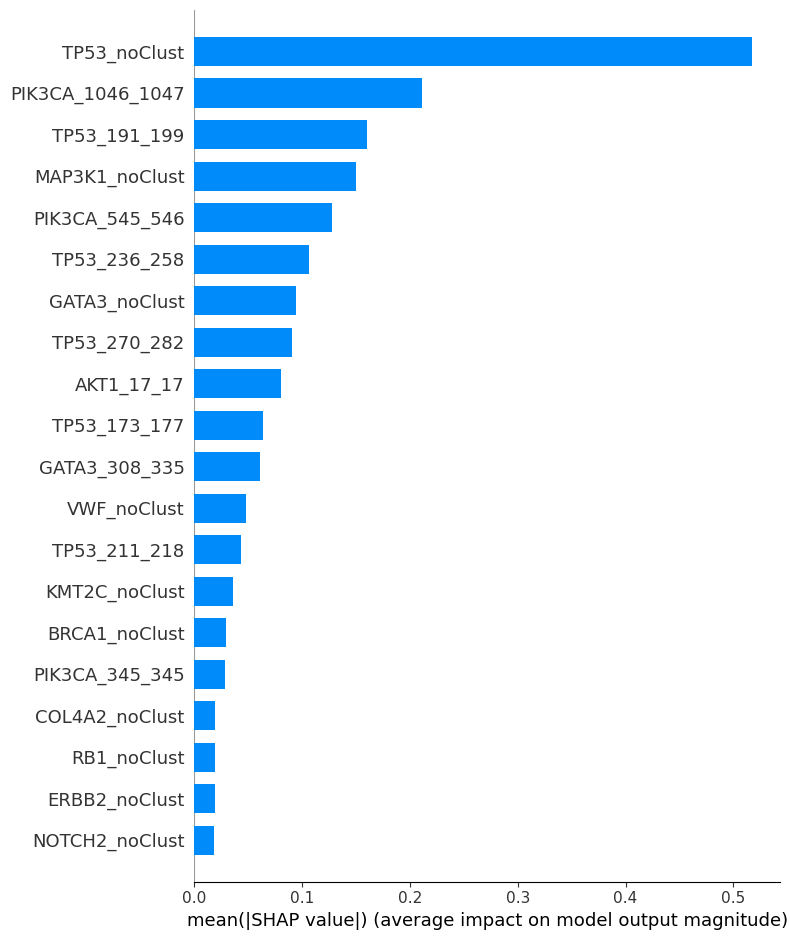

In [139]:
# build a summary barplot that displays the average magnitude and direction of each feature's impact across all samples in the test set
shap.summary_plot(shap_values_xgb, features=normalized_X_train, feature_names=normalized_X_train.columns, plot_type='bar')

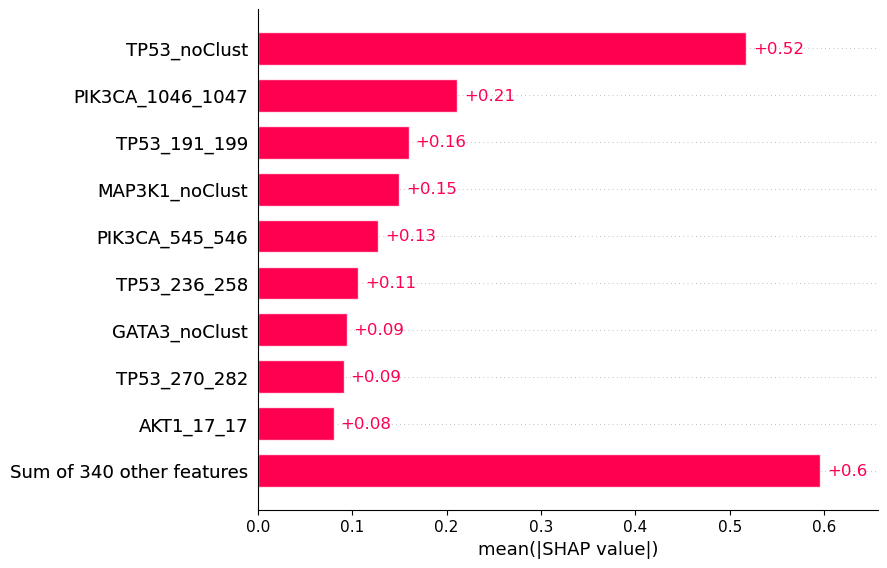

In [128]:
shap.plots.bar(shap_values_xgb)

These 9 features are all contained in the first 50 features with the highest coefficient from Lasso.

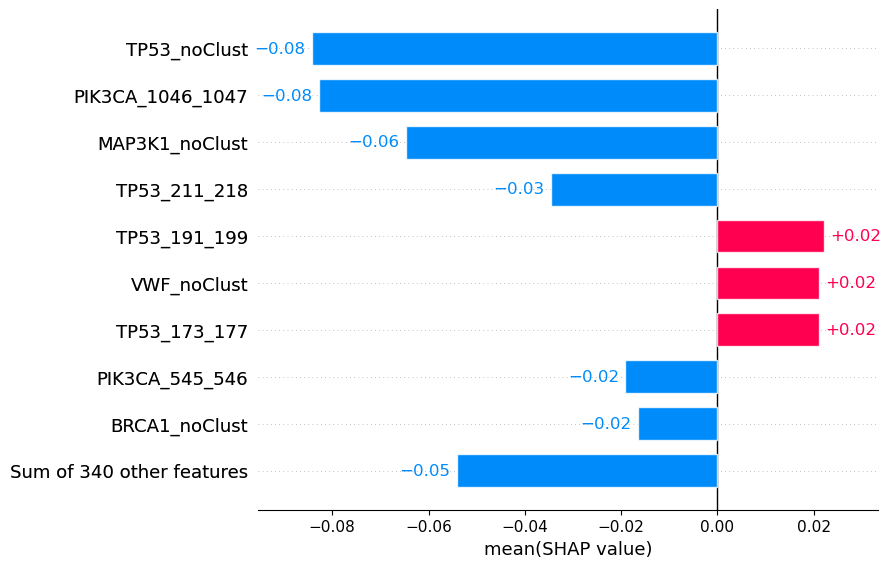

In [324]:
# Visualizza un grafico delle feature più importanti
shap.plots.bar(shap_values_xgb.mean(0))

In [325]:
shap.plots.force(shap_values_xgb)

## Plot to analyze feature importance

Build a plot having on the x axis the features, while on the y axis the feature coefficients or the Shapley values.
In particular, I want to plot 4 curves. Based on the Full Logistic Regression coefficients sorted in descending order, I want to plot:
- monotonic decreasing curve with Full Log Reg coefficients
- Lasso coefficients
- Shapley values from Full Log Reg
- Shapley values from XGBoost

In [326]:
# Full Logistic Regression coefficients 
features_tot_coefficients_logreg_sorted

Feature  Absolute Coefficient
119  KIAA0195_noClust             88.534707
102     WDR44_noClust             84.111446
269        TH_noClust             81.910179
125      ESF1_noClust             80.330394
28       TP53_191_199             78.950951
..                ...                   ...
146     PRKCZ_noClust              0.000000
58      ITPKB_noClust              0.000000
24       ESR1_537_538              0.000000
309    SMTNL2_noClust              0.000000
153     EWSR1_noClust              0.000000

[349 rows x 2 columns]

In [327]:
# multiply the Absolute coefficient for 10^-1
features_tot_coefficients_logreg_sorted['Absolute Coefficient*0.1'] = features_tot_coefficients_logreg_sorted['Absolute Coefficient']*0.1
features_tot_coefficients_logreg_sorted

Feature  Absolute Coefficient  Absolute Coefficient*0.1
119  KIAA0195_noClust             88.534707                  8.853471
102     WDR44_noClust             84.111446                  8.411145
269        TH_noClust             81.910179                  8.191018
125      ESF1_noClust             80.330394                  8.033039
28       TP53_191_199             78.950951                  7.895095
..                ...                   ...                       ...
146     PRKCZ_noClust              0.000000                  0.000000
58      ITPKB_noClust              0.000000                  0.000000
24       ESR1_537_538              0.000000                  0.000000
309    SMTNL2_noClust              0.000000                  0.000000
153     EWSR1_noClust              0.000000                  0.000000

[349 rows x 3 columns]

In [328]:
# split the dataframe in 6 smaller datasets of 50 samples plus one of 49 samples
sizes = [50, 50, 50, 50, 50, 50, 49]
sub_dataframes_logreg_coef = np.array_split(features_tot_coefficients_logreg_sorted, np.cumsum(sizes)[:-1], axis=0)

# Display the lengths of each sub-dataframe
for i, sub_df in enumerate(sub_dataframes_logreg_coef):
    print(f"Sub-DataFrame {i+1} Length: {len(sub_df)}")


Sub-DataFrame 1 Length: 50
Sub-DataFrame 2 Length: 50
Sub-DataFrame 3 Length: 50
Sub-DataFrame 4 Length: 50
Sub-DataFrame 5 Length: 50
Sub-DataFrame 6 Length: 50
Sub-DataFrame 7 Length: 49


In [329]:
sub_dataframes_logreg_coef_0 = sub_dataframes_logreg_coef[0]
sub_dataframes_logreg_coef_1 = sub_dataframes_logreg_coef[1]
sub_dataframes_logreg_coef_2 = sub_dataframes_logreg_coef[2]
sub_dataframes_logreg_coef_3 = sub_dataframes_logreg_coef[3]
sub_dataframes_logreg_coef_4 = sub_dataframes_logreg_coef[4]
sub_dataframes_logreg_coef_5 = sub_dataframes_logreg_coef[5]
sub_dataframes_logreg_coef_6 = sub_dataframes_logreg_coef[6]

In [330]:
sub_dataframes_logreg_coef_0

Feature  Absolute Coefficient  Absolute Coefficient*0.1
119  KIAA0195_noClust             88.534707                  8.853471
102     WDR44_noClust             84.111446                  8.411145
269        TH_noClust             81.910179                  8.191018
125      ESF1_noClust             80.330394                  8.033039
28       TP53_191_199             78.950951                  7.895095
133    PTPN22_noClust             78.572810                  7.857281
162     STAB2_noClust             77.969686                  7.796969
89     FBXO18_noClust             74.000018                  7.400002
29       TP53_236_258             73.799999                  7.380000
267      KRAS_noClust             72.482306                  7.248231
57      NIPBL_noClust             72.106562                  7.210656
160      GRM2_noClust             68.585164                  6.858516
137      FMO5_noClust             67.721328                  6.772133
109       BLK_noClust             63.143754                  6.314375
94       AKT1_noClust             62.302828                  6.230283
305   FASTKD2_noClust             59.074422                  5.907442
173     EP300_noClust             57.956793                  5.795679
122     TAF7L_noClust             57.083315                  5.708332
45       TP53_noClust             54.188198                  5.418820
217   METTL7B_noClust             53.097760                  5.309776
246     LZTR1_noClust             52.893026                  5.289303
30       TP53_173_177             52.437836                  5.243784
0        TP53_270_282             52.307562                  5.230756
136     FKBP4_noClust             50.916087                  5.091609
85       SZT2_noClust             50.246805                  5.024681
181    COL4A2_noClust             49.129432                  4.912943
209    SLFN13_noClust             48.395285                  4.839529
2      PIK3CA_345_345             48.010965                  4.801096
46     PIK3CA_noClust             47.918467                  4.791847
225      SUCO_noClust             46.484804                  4.648480
25     PIK3CA_545_546             46.459717                  4.645972
320    TARBP2_noClust             46.027005                  4.602700
291  SLC25A19_noClust             44.074019                  4.407402
159   RPGRIP1_noClust             43.125991                  4.312599
56     GPRIN1_noClust             42.866094                  4.286609
128    ANKHD1_noClust             41.966618                  4.196662
154     NAA15_noClust             40.372582                  4.037258
129   FAM107B_noClust             40.311685                  4.031168
341      GAS8_noClust             40.309272                  4.030927
114     SF3B3_noClust             39.454442                  3.945444
49        NF1_noClust             38.928235                  3.892824
32      RUNX1_122_123             38.910716                  3.891072
256   ZKSCAN1_noClust             38.433215                  3.843322
167    ZBTB48_noClust             37.991254                  3.799125
177       VWF_noClust             37.918529                  3.791853
134      GLDC_noClust             37.661530                  3.766153
171    ATAD2B_noClust             36.891389                  3.689139
229      SMG1_noClust             36.395064                  3.639506
73     DNAH12_noClust             36.102822                  3.610282
293   CCDC135_noClust             35.764436                  3.576444

In [331]:
feature_0_list = sub_dataframes_logreg_coef_0['Feature'].to_list()
feature_1_list = sub_dataframes_logreg_coef_1['Feature'].to_list()
feature_2_list = sub_dataframes_logreg_coef_2['Feature'].to_list()
feature_3_list = sub_dataframes_logreg_coef_3['Feature'].to_list()
feature_4_list = sub_dataframes_logreg_coef_4['Feature'].to_list()
feature_5_list = sub_dataframes_logreg_coef_5['Feature'].to_list()
feature_6_list = sub_dataframes_logreg_coef_6['Feature'].to_list()

In [332]:
# Lasso coefficients 
features_tot_coefficients_Lasso_sorted

Feature  Absolute Coefficient
45       TP53_noClust              4.738433
28       TP53_191_199              4.294775
283     CARD6_noClust              3.632916
27         AKT1_17_17              3.496041
66      GATA3_noClust              3.255560
..                ...                   ...
165      EML2_noClust              0.000000
166   PLA2G4D_noClust              0.000000
168     MED23_noClust              0.000000
169    ARRDC1_noClust              0.000000
348  KRTAP5-1_noClust              0.000000

[349 rows x 2 columns]

In [333]:
# reorder the Lasso features based on Full Log Reg coefficients
features_tot_coefficients_Lasso_sorted_def = features_tot_coefficients_Lasso_sorted.set_index('Feature').loc[features_tot_coefficients_logreg_sorted['Feature']].reset_index()
features_tot_coefficients_Lasso_sorted_def

Feature  Absolute Coefficient
0    KIAA0195_noClust              2.751410
1       WDR44_noClust              3.242603
2          TH_noClust              3.003207
3        ESF1_noClust              1.647150
4        TP53_191_199              4.294775
..                ...                   ...
344     PRKCZ_noClust              0.000000
345     ITPKB_noClust              0.000000
346      ESR1_537_538              0.000000
347    SMTNL2_noClust              0.000000
348     EWSR1_noClust              0.000000

[349 rows x 2 columns]

In [334]:
# multiply the feature importance values per 10
features_tot_coefficients_Lasso_sorted_def['Absolute Coefficient*10'] = features_tot_coefficients_Lasso_sorted_def['Absolute Coefficient']*10
features_tot_coefficients_Lasso_sorted_def

Feature  Absolute Coefficient  Absolute Coefficient*10
0    KIAA0195_noClust              2.751410                27.514101
1       WDR44_noClust              3.242603                32.426026
2          TH_noClust              3.003207                30.032068
3        ESF1_noClust              1.647150                16.471500
4        TP53_191_199              4.294775                42.947747
..                ...                   ...                      ...
344     PRKCZ_noClust              0.000000                 0.000000
345     ITPKB_noClust              0.000000                 0.000000
346      ESR1_537_538              0.000000                 0.000000
347    SMTNL2_noClust              0.000000                 0.000000
348     EWSR1_noClust              0.000000                 0.000000

[349 rows x 3 columns]

In [335]:
sub_dataframes_lasso = np.array_split(features_tot_coefficients_Lasso_sorted_def, np.cumsum(sizes)[:-1], axis=0)

In [336]:
sub_dataframes_lasso_0 = sub_dataframes_lasso[0]
sub_dataframes_lasso_1 = sub_dataframes_lasso[1]
sub_dataframes_lasso_2 = sub_dataframes_lasso[2]
sub_dataframes_lasso_3 = sub_dataframes_lasso[3]
sub_dataframes_lasso_4 = sub_dataframes_lasso[4]
sub_dataframes_lasso_5 = sub_dataframes_lasso[5]
sub_dataframes_lasso_6 = sub_dataframes_lasso[6]

In [337]:
# Shapley values from Full Logistic Regression
feature_importance_logreg

col_name  feature_importance_vals
45       TP53_noClust                10.732274
26   PIK3CA_1046_1047                 8.436275
29       TP53_236_258                 8.210250
25     PIK3CA_545_546                 6.026858
30       TP53_173_177                 5.680766
..                ...                      ...
243      RCC2_noClust                 0.000000
238     PTCD3_noClust                 0.000000
234    TFAP2A_noClust                 0.000000
233    NKX3-2_noClust                 0.000000
348  KRTAP5-1_noClust                 0.000000

[349 rows x 2 columns]

In [338]:
# reorder the Full Logistic Regression Shapley values based on Full Log Reg coefficients
feature_importance_logreg_sorted_def = feature_importance_logreg.set_index('col_name').loc[features_tot_coefficients_logreg_sorted['Feature']].reset_index()
feature_importance_logreg_sorted_def

col_name  feature_importance_vals
0    KIAA0195_noClust                 0.885347
1       WDR44_noClust                 1.168215
2          TH_noClust                 0.000000
3        ESF1_noClust                 1.071072
4        TP53_191_199                 5.356603
..                ...                      ...
344     PRKCZ_noClust                 0.000000
345     ITPKB_noClust                 0.000000
346      ESR1_537_538                 0.000000
347    SMTNL2_noClust                 0.000000
348     EWSR1_noClust                 0.000000

[349 rows x 2 columns]

In [339]:
# multiply the feature importance values per 10
feature_importance_logreg_sorted_def['feature_importance_vals*10'] = feature_importance_logreg_sorted_def['feature_importance_vals']*10
feature_importance_logreg_sorted_def

col_name  feature_importance_vals  feature_importance_vals*10
0    KIAA0195_noClust                 0.885347                    8.853471
1       WDR44_noClust                 1.168215                   11.682145
2          TH_noClust                 0.000000                    0.000000
3        ESF1_noClust                 1.071072                   10.710719
4        TP53_191_199                 5.356603                   53.566027
..                ...                      ...                         ...
344     PRKCZ_noClust                 0.000000                    0.000000
345     ITPKB_noClust                 0.000000                    0.000000
346      ESR1_537_538                 0.000000                    0.000000
347    SMTNL2_noClust                 0.000000                    0.000000
348     EWSR1_noClust                 0.000000                    0.000000

[349 rows x 3 columns]

In [340]:
sub_dataframes_logreg_shap = np.array_split(feature_importance_logreg_sorted_def, np.cumsum(sizes)[:-1], axis=0)
sub_dataframes_logreg_shap_0 = sub_dataframes_logreg_shap[0]
sub_dataframes_logreg_shap_1 = sub_dataframes_logreg_shap[1]
sub_dataframes_logreg_shap_2 = sub_dataframes_logreg_shap[2]
sub_dataframes_logreg_shap_3 = sub_dataframes_logreg_shap[3]
sub_dataframes_logreg_shap_4 = sub_dataframes_logreg_shap[4]
sub_dataframes_logreg_shap_5 = sub_dataframes_logreg_shap[5]
sub_dataframes_logreg_shap_6 = sub_dataframes_logreg_shap[6]

In [341]:
# Shapley values from Extreme Gradient Boosting
feature_importance_xgb

col_name  feature_importance_vals
45       TP53_noClust                 0.517394
26   PIK3CA_1046_1047                 0.211388
28       TP53_191_199                 0.160007
97     MAP3K1_noClust                 0.149722
25     PIK3CA_545_546                 0.127544
..                ...                      ...
134      GLDC_noClust                 0.000000
133    PTPN22_noClust                 0.000000
132     STAG2_noClust                 0.000000
131     RUNX1_noClust                 0.000000
348  KRTAP5-1_noClust                 0.000000

[349 rows x 2 columns]

In [342]:
# reorder the XGBoost Shapley values based on Full Log Reg coefficients
feature_importance_xgb_sorted_def = feature_importance_xgb.set_index('col_name').loc[features_tot_coefficients_logreg_sorted['Feature']].reset_index()
feature_importance_xgb_sorted_def

col_name  feature_importance_vals
0    KIAA0195_noClust                 0.000116
1       WDR44_noClust                 0.000000
2          TH_noClust                 0.000000
3        ESF1_noClust                 0.000000
4        TP53_191_199                 0.160007
..                ...                      ...
344     PRKCZ_noClust                 0.000000
345     ITPKB_noClust                 0.000000
346      ESR1_537_538                 0.000000
347    SMTNL2_noClust                 0.000000
348     EWSR1_noClust                 0.000000

[349 rows x 2 columns]

In [343]:
# multiply the feature importance values for 100
feature_importance_xgb_sorted_def['feature_importance_vals*100'] = feature_importance_xgb_sorted_def['feature_importance_vals']*100
feature_importance_xgb_sorted_def

col_name  feature_importance_vals  feature_importance_vals*100
0    KIAA0195_noClust                 0.000116                     0.011603
1       WDR44_noClust                 0.000000                     0.000000
2          TH_noClust                 0.000000                     0.000000
3        ESF1_noClust                 0.000000                     0.000000
4        TP53_191_199                 0.160007                    16.000744
..                ...                      ...                          ...
344     PRKCZ_noClust                 0.000000                     0.000000
345     ITPKB_noClust                 0.000000                     0.000000
346      ESR1_537_538                 0.000000                     0.000000
347    SMTNL2_noClust                 0.000000                     0.000000
348     EWSR1_noClust                 0.000000                     0.000000

[349 rows x 3 columns]

In [344]:
sub_dataframes_xgb_shap = np.array_split(feature_importance_xgb_sorted_def, np.cumsum(sizes)[:-1], axis=0)
sub_dataframes_xgb_shap_0 = sub_dataframes_xgb_shap[0]
sub_dataframes_xgb_shap_1 = sub_dataframes_xgb_shap[1]
sub_dataframes_xgb_shap_2 = sub_dataframes_xgb_shap[2]
sub_dataframes_xgb_shap_3 = sub_dataframes_xgb_shap[3]
sub_dataframes_xgb_shap_4 = sub_dataframes_xgb_shap[4]
sub_dataframes_xgb_shap_5 = sub_dataframes_xgb_shap[5]
sub_dataframes_xgb_shap_6 = sub_dataframes_xgb_shap[6]

Text(0.5, 0, 'Features')

Text(0, 0.5, 'Feature importance values')

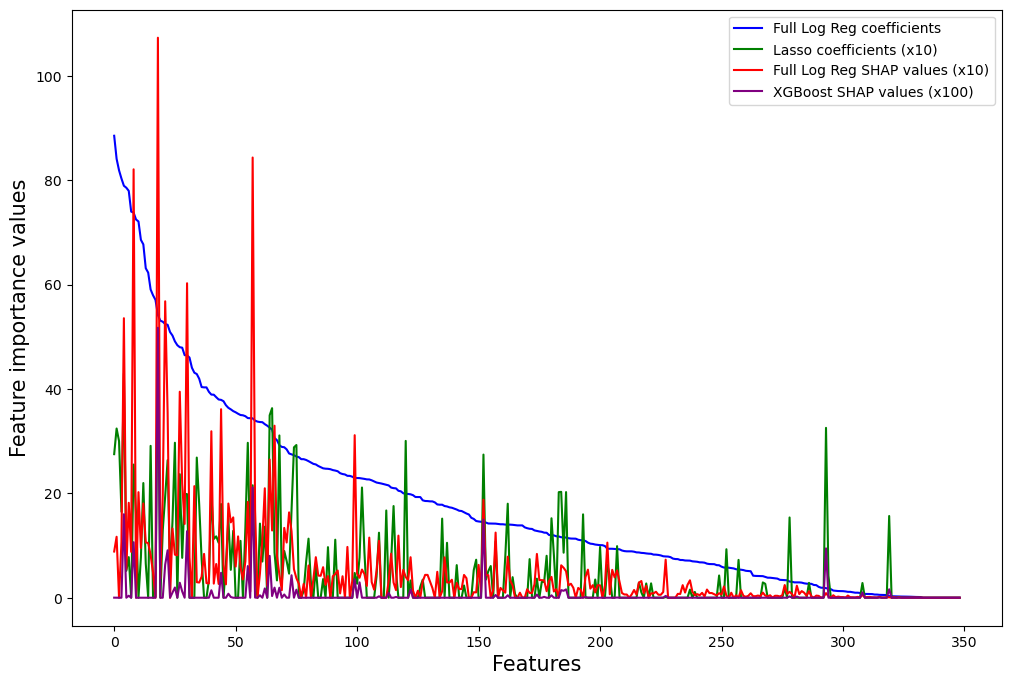

In [345]:
features = np.arange(0, 349)
coefficients_logreg = features_tot_coefficients_logreg_sorted[['Absolute Coefficient']].to_numpy()
coefficients_Lasso = features_tot_coefficients_Lasso_sorted_def[['Absolute Coefficient*10']].to_numpy()
shap_logreg = feature_importance_logreg_sorted_def[['feature_importance_vals*10']].to_numpy()
shap_xgboost = feature_importance_xgb_sorted_def[['feature_importance_vals*100']].to_numpy()

plt.rcParams['figure.figsize'] = (12, 8)

#set axes limit
#plt.ylim(0.001, 1000)

plt.plot(features, coefficients_logreg, label = 'Full Log Reg coefficients', color='blue')
plt.plot(features, coefficients_Lasso, label = 'Lasso coefficients (x10)', color='green')
plt.plot(features, shap_logreg, label = 'Full Log Reg SHAP values (x10)', color='red')
plt.plot(features, shap_xgboost, label = 'XGBoost SHAP values (x100)', color='purple')
plt.xlabel("Features", fontsize=15)
plt.ylabel("Feature importance values", fontsize=15)
plt.legend()

plt.show()

Text(0.5, 0, 'Features')

Text(0, 0.5, 'Feature importance values')

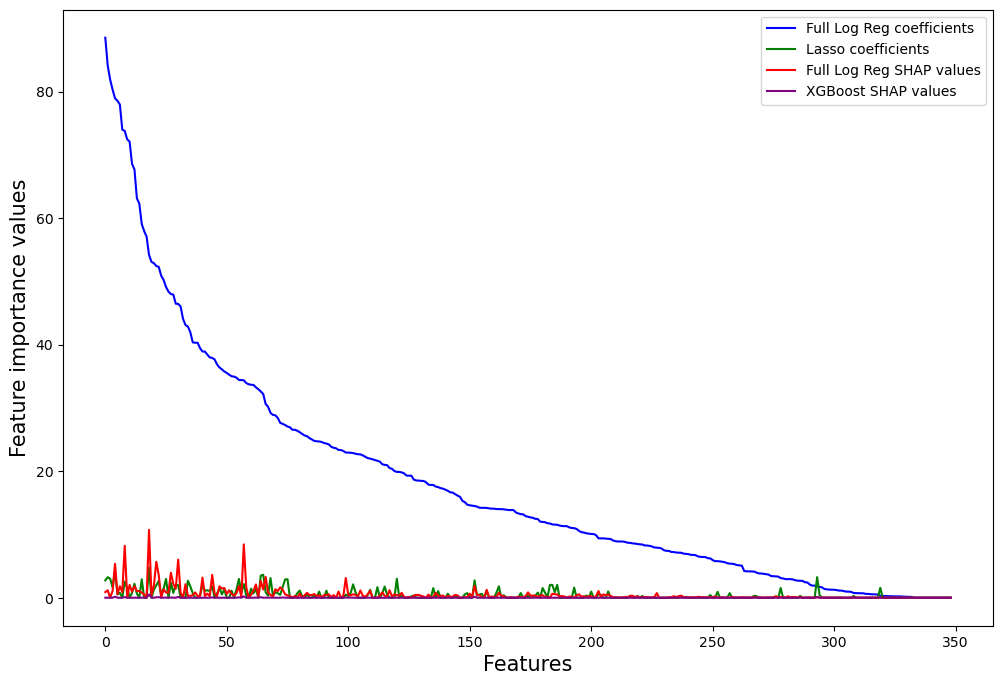

In [346]:
features = np.arange(0, 349)
coefficients_logreg = features_tot_coefficients_logreg_sorted[['Absolute Coefficient']].to_numpy()
coefficients_Lasso = features_tot_coefficients_Lasso_sorted_def[['Absolute Coefficient']].to_numpy()
shap_logreg = feature_importance_logreg_sorted_def[['feature_importance_vals']].to_numpy()
shap_xgboost = feature_importance_xgb_sorted_def[['feature_importance_vals']].to_numpy()

plt.rcParams['figure.figsize'] = (12, 8)

#set axes limit
#plt.ylim(0.001, 1000)

plt.plot(features, coefficients_logreg, label = 'Full Log Reg coefficients', color='blue')
plt.plot(features, coefficients_Lasso, label = 'Lasso coefficients', color='green')
plt.plot(features, shap_logreg, label = 'Full Log Reg SHAP values', color='red')
plt.plot(features, shap_xgboost, label = 'XGBoost SHAP values', color='purple')
plt.xlabel("Features", fontsize=15)
plt.ylabel("Feature importance values", fontsize=15)
plt.legend()

plt.show()

### Divide the plot into seven parts to visualize it better

In [347]:
feature_0_list

['KIAA0195_noClust',
 'WDR44_noClust',
 'TH_noClust',
 'ESF1_noClust',
 'TP53_191_199',
 'PTPN22_noClust',
 'STAB2_noClust',
 'FBXO18_noClust',
 'TP53_236_258',
 'KRAS_noClust',
 'NIPBL_noClust',
 'GRM2_noClust',
 'FMO5_noClust',
 'BLK_noClust',
 'AKT1_noClust',
 'FASTKD2_noClust',
 'EP300_noClust',
 'TAF7L_noClust',
 'TP53_noClust',
 'METTL7B_noClust',
 'LZTR1_noClust',
 'TP53_173_177',
 'TP53_270_282',
 'FKBP4_noClust',
 'SZT2_noClust',
 'COL4A2_noClust',
 'SLFN13_noClust',
 'PIK3CA_345_345',
 'PIK3CA_noClust',
 'SUCO_noClust',
 'PIK3CA_545_546',
 'TARBP2_noClust',
 'SLC25A19_noClust',
 'RPGRIP1_noClust',
 'GPRIN1_noClust',
 'ANKHD1_noClust',
 'NAA15_noClust',
 'FAM107B_noClust',
 'GAS8_noClust',
 'SF3B3_noClust',
 'NF1_noClust',
 'RUNX1_122_123',
 'ZKSCAN1_noClust',
 'ZBTB48_noClust',
 'VWF_noClust',
 'GLDC_noClust',
 'ATAD2B_noClust',
 'SMG1_noClust',
 'DNAH12_noClust',
 'CCDC135_noClust']

Text(0.5, 0, 'Features')

Text(0, 0.5, 'Feature importance values')

Text(0.5, 1.0, 'Distribution of feature importance values - 1')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 [Text(0, 0, 'KIAA0195_noClust'),
  Text(1, 0, 'WDR44_noClust'),
  Text(2, 0, 'TH_noClust'),
  Text(3, 0, 'ESF1_noClust'),
  Text(4, 0, 'TP53_191_199'),
  Text(5, 0, 'PTPN22_noClust'),
  Text(6, 0, 'STAB2_noClust'),
  Text(7, 0, 'FBXO18_noClust'),
  Text(8, 0, 'TP53_236_258'),
  Text(9, 0, 'KRAS_noClust'),
  Text(10, 0, 'NIPBL_noClust'),
  Text(11, 0, 'GRM2_noClust'),
  Text(12, 0, 'FMO5_noClust'),
  Text(13, 0, 'BLK_noClust'),
  Text(14, 0, 'AKT1_noClust'),
  Text(15, 0, 'FASTKD2_noClust'),
  Text(16, 0, 'EP300_noClust'),
  Text(17, 0, 'TAF7L_noClust'),
  Text(18, 0, 'TP53_noClust'),
  Text(19, 0, 'METTL7B_noClust'),
  Text(20, 0, 'LZTR1_noClust'),
  Text(21, 0, 'TP53_173_177'),
  Text(22, 0, 'TP53_

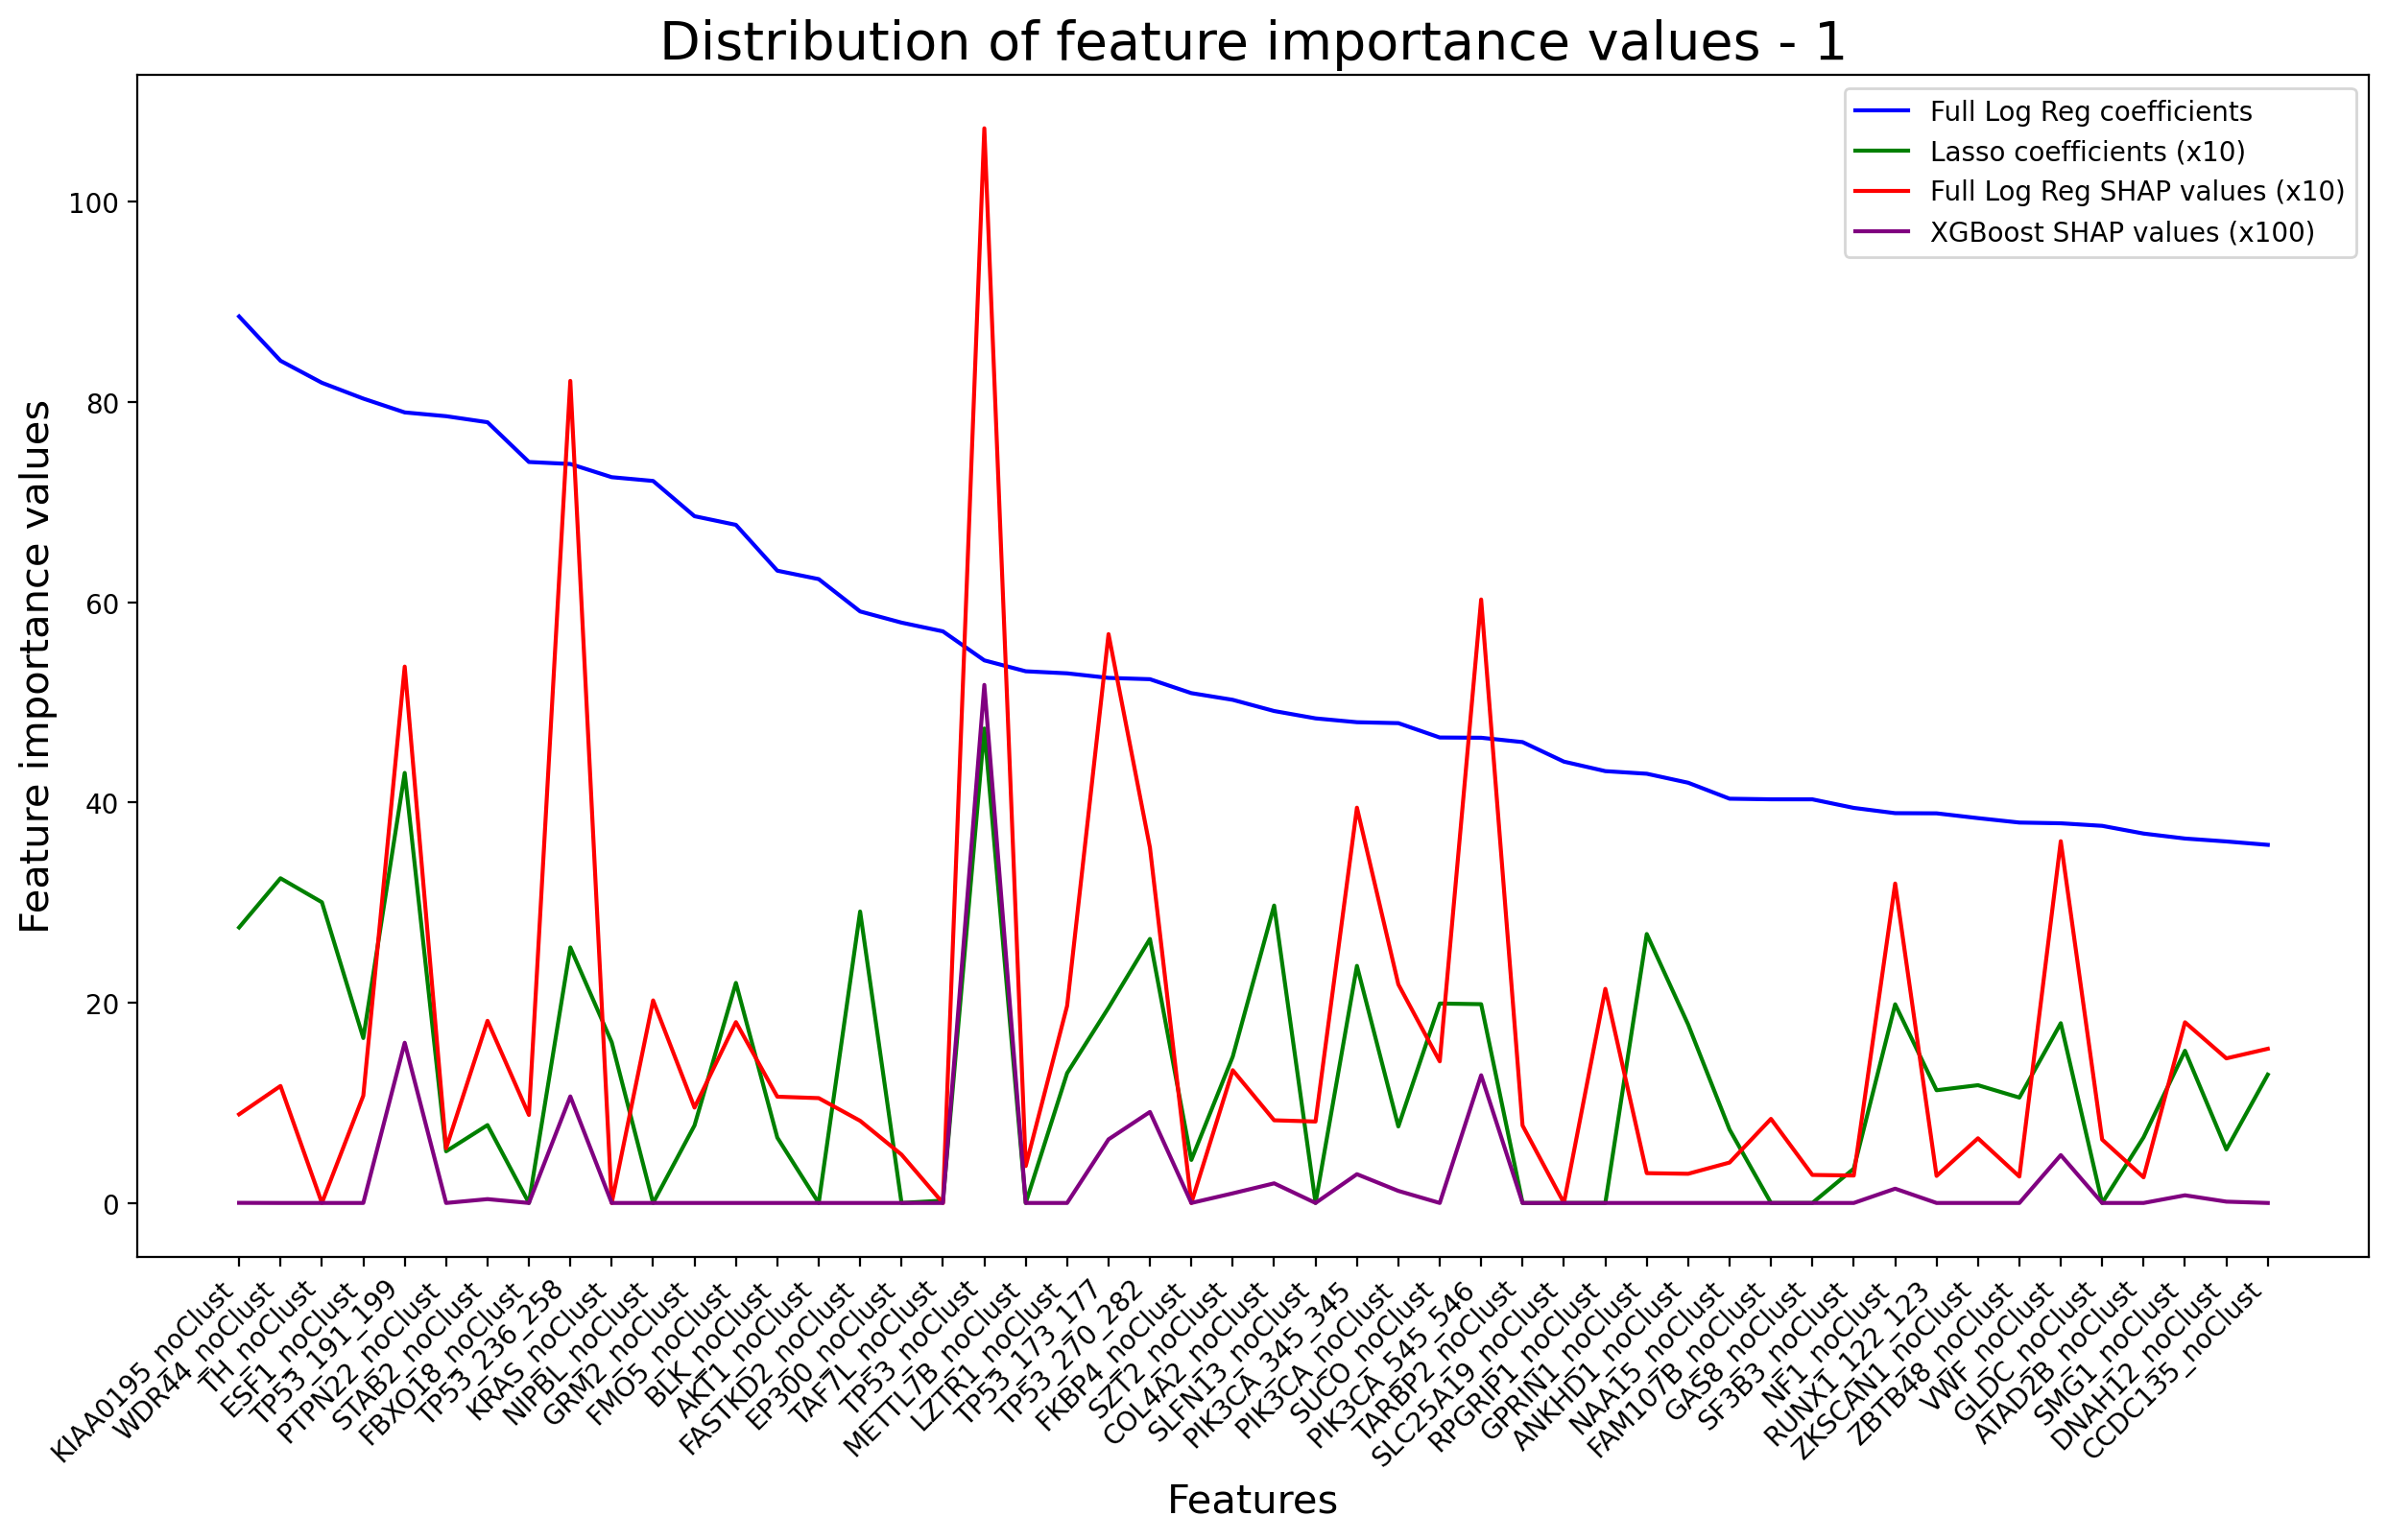

In [348]:
# first plot 
from IPython.display import set_matplotlib_formats
import matplotlib_inline
%config InlineBackend.figure_format = 'retina'
# Sample data for the four curves
coefficients_logreg_0 = sub_dataframes_logreg_coef_0[['Absolute Coefficient']].to_numpy()
coefficients_Lasso_0 = sub_dataframes_lasso_0[['Absolute Coefficient*10']].to_numpy()
shap_logreg_0 = sub_dataframes_logreg_shap_0[['feature_importance_vals*10']].to_numpy()
shap_xgboost_0 = sub_dataframes_xgb_shap_0[['feature_importance_vals*100']].to_numpy()

plt.rcParams['figure.figsize'] = (15, 8)

# Plotting all curves on the same figure
plt.plot(feature_0_list, coefficients_logreg_0, label='Full Log Reg coefficients', color='blue')
plt.plot(feature_0_list, coefficients_Lasso_0, label='Lasso coefficients (x10)', color='green')
plt.plot(feature_0_list, shap_logreg_0, label='Full Log Reg SHAP values (x10)', color='red')
plt.plot(feature_0_list, shap_xgboost_0, label='XGBoost SHAP values (x100)', color='purple')

# Labeling and legend
plt.xlabel("Features", fontsize=15)
plt.ylabel("Feature importance values", fontsize=15)
plt.title('Distribution of feature importance values - 1', fontsize=20)
plt.legend()

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

Text(0.5, 0, 'Features')

Text(0, 0.5, 'Feature importance values')

Text(0.5, 1.0, 'Distribution of feature importance values - 2')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 [Text(0, 0, 'MTMR12_noClust'),
  Text(1, 0, 'CDK19_noClust'),
  Text(2, 0, 'C3orf70_noClust'),
  Text(3, 0, 'DNASE1L3_noClust'),
  Text(4, 0, 'PTEN_128_131'),
  Text(5, 0, 'GATA3_308_335'),
  Text(6, 0, 'CCNT1_noClust'),
  Text(7, 0, 'PIK3CA_1046_1047'),
  Text(8, 0, 'MYH9_noClust'),
  Text(9, 0, 'ERBB2_767_777'),
  Text(10, 0, 'AGO1_noClust'),
  Text(11, 0, 'DAP3_noClust'),
  Text(12, 0, 'NOTCH2_noClust'),
  Text(13, 0, 'TMEM120B_noClust'),
  Text(14, 0, 'AKT1_17_17'),
  Text(15, 0, 'CARD6_noClust'),
  Text(16, 0, 'RB1_noClust'),
  Text(17, 0, 'TRIP11_noClust'),
  Text(18, 0, 'ERBB2_noClust'),
  Text(19, 0, 'CHRM1_noClust'),
  Text(20, 0, 'SPEN_noClust'),
  Text(21, 0, 'STAG2_noClust'),
  Text(22, 

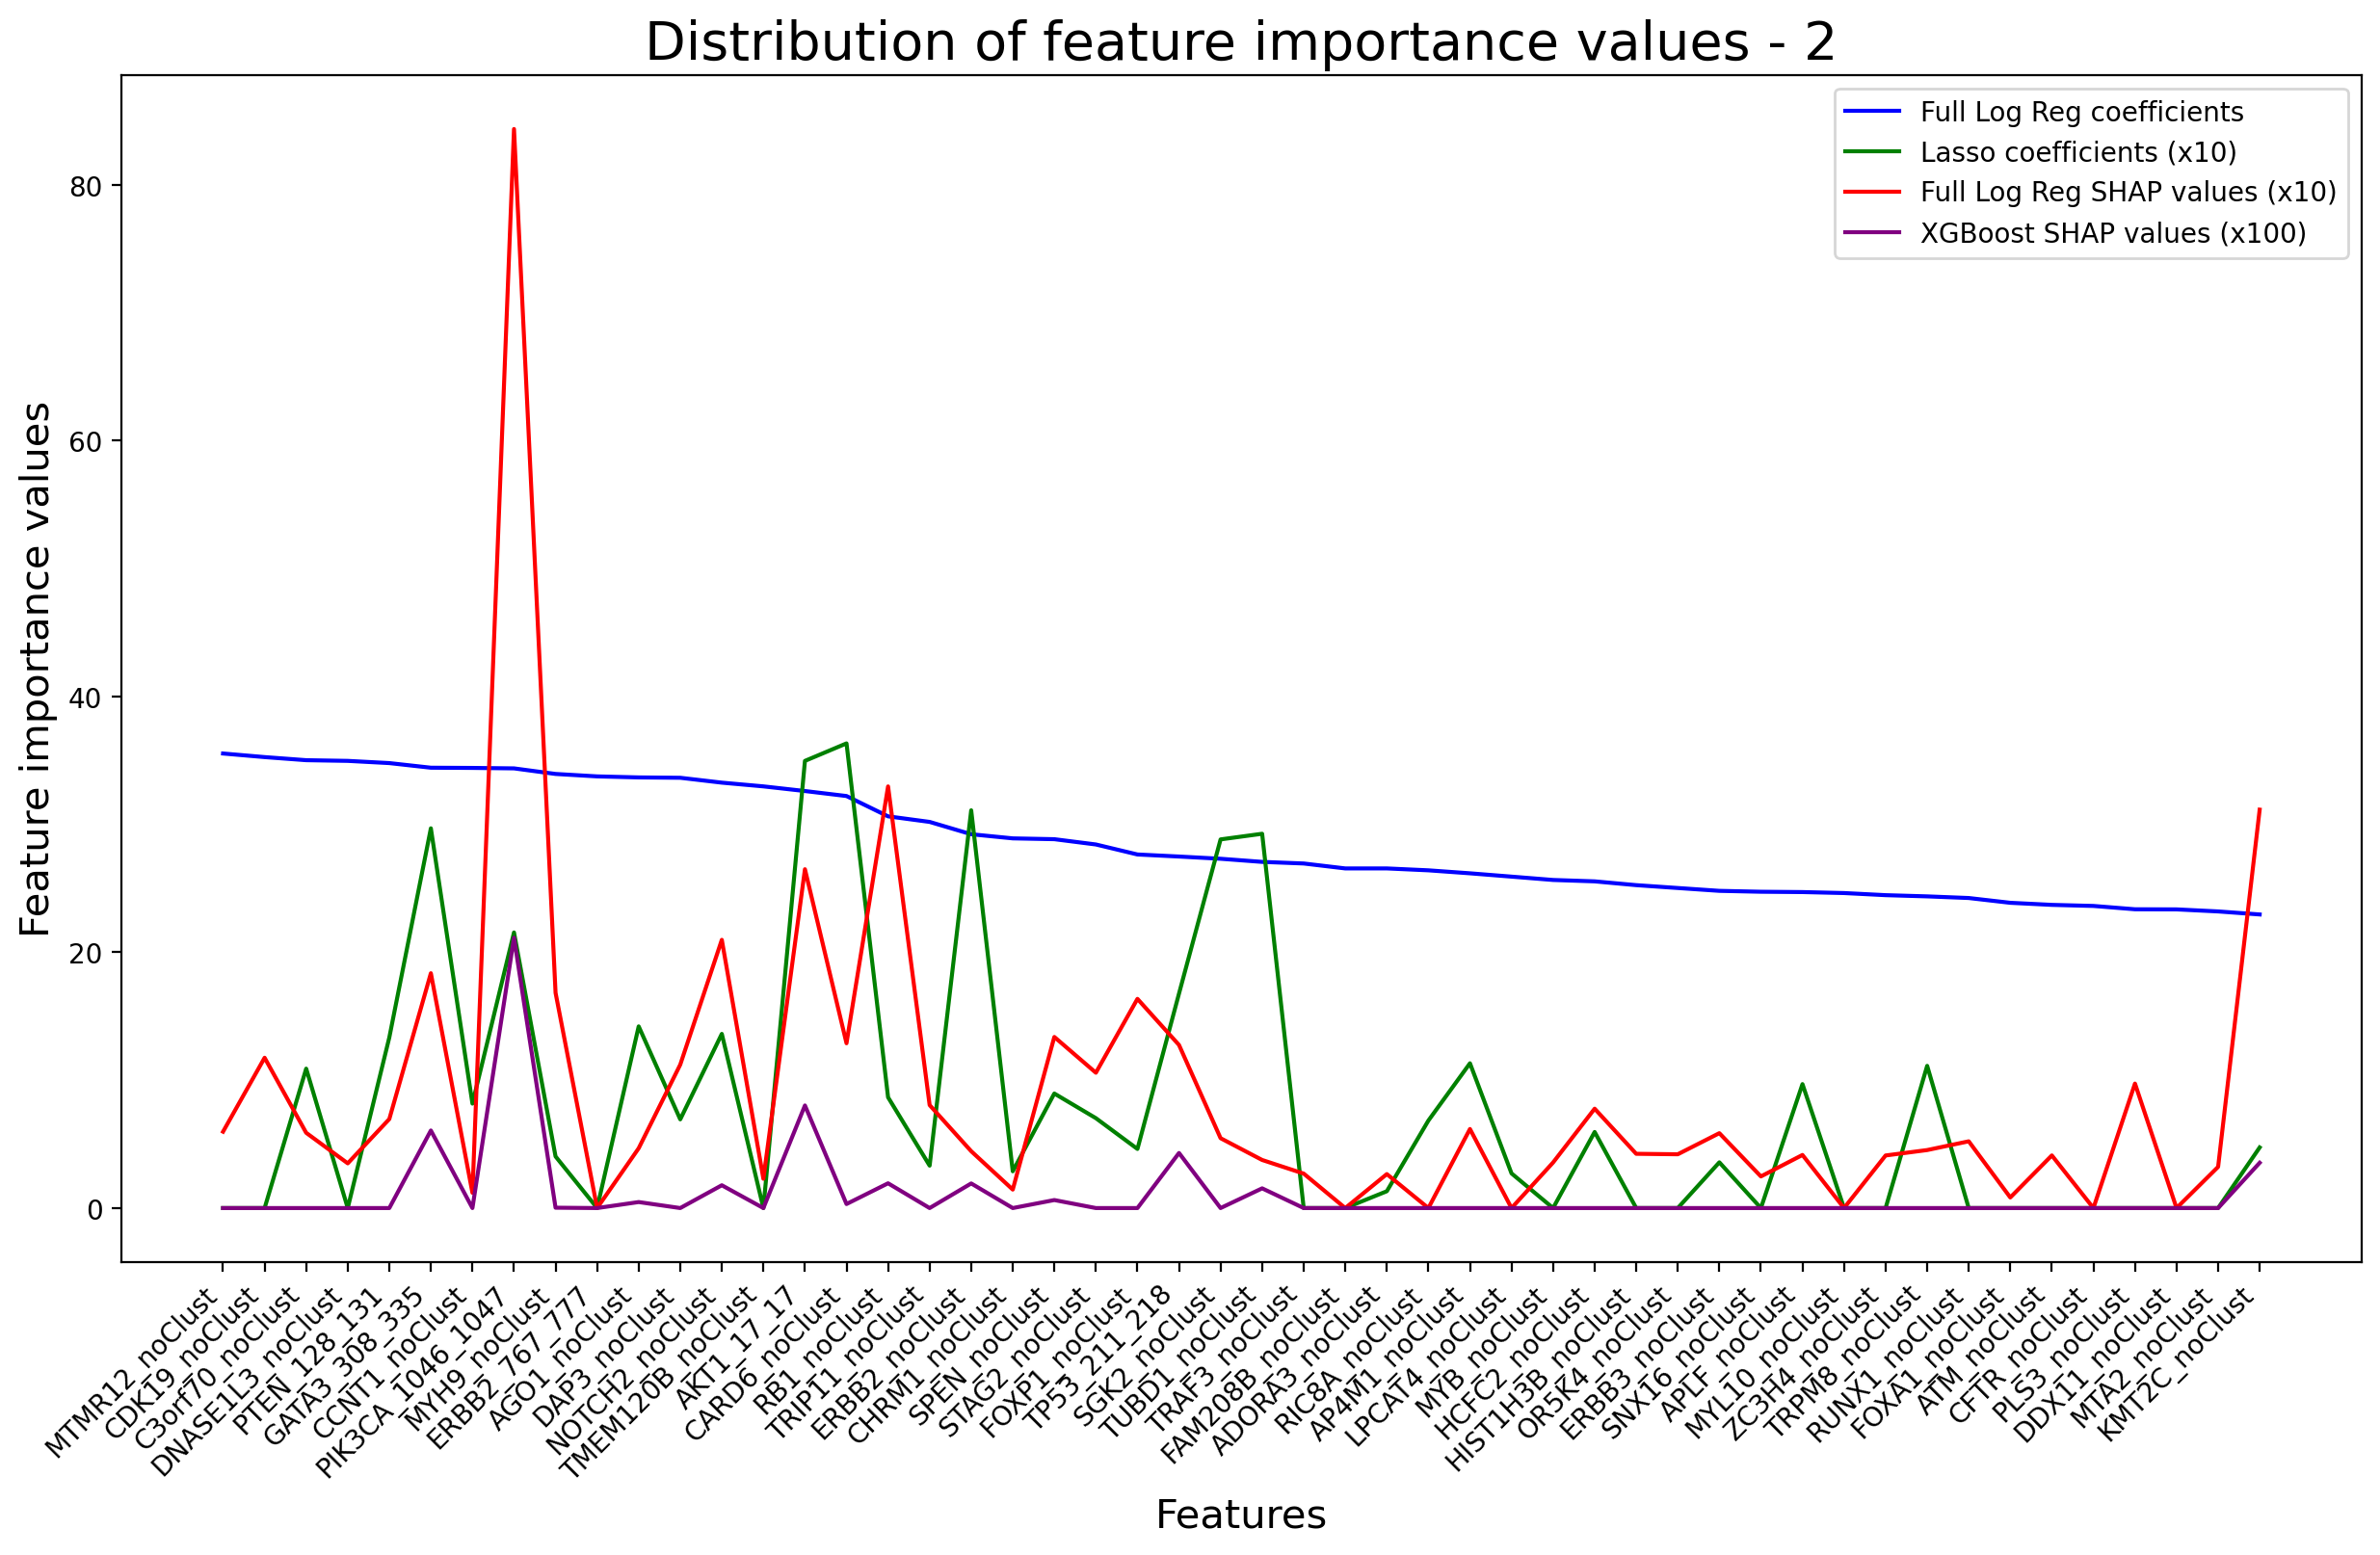

In [349]:
%config InlineBackend.figure_format = 'retina'
# Sample data for the four curves
coefficients_logreg_1 = sub_dataframes_logreg_coef_1[['Absolute Coefficient']].to_numpy()
coefficients_Lasso_1 = sub_dataframes_lasso_1[['Absolute Coefficient*10']].to_numpy()
shap_logreg_1 = sub_dataframes_logreg_shap_1[['feature_importance_vals*10']].to_numpy()
shap_xgboost_1 = sub_dataframes_xgb_shap_1[['feature_importance_vals*100']].to_numpy()

plt.rcParams['figure.figsize'] = (15, 8)

# Plotting all curves on the same figure
plt.plot(feature_1_list, coefficients_logreg_1, label='Full Log Reg coefficients', color='blue')
plt.plot(feature_1_list, coefficients_Lasso_1, label='Lasso coefficients (x10)', color='green')
plt.plot(feature_1_list, shap_logreg_1, label='Full Log Reg SHAP values (x10)', color='red')
plt.plot(feature_1_list, shap_xgboost_1, label='XGBoost SHAP values (x100)', color='purple')

# Labeling and legend
plt.xlabel("Features", fontsize=15)
plt.ylabel("Feature importance values", fontsize=15)
plt.title('Distribution of feature importance values - 2', fontsize=20)
plt.legend()

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

Text(0.5, 0, 'Features')

Text(0, 0.5, 'Feature importance values')

Text(0.5, 1.0, 'Distribution of feature importance values - 3')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 [Text(0, 0, 'GBGT1_noClust'),
  Text(1, 0, 'BRCA1_noClust'),
  Text(2, 0, 'GATA3_406_408'),
  Text(3, 0, 'SIRT7_noClust'),
  Text(4, 0, 'TRA2B_noClust'),
  Text(5, 0, 'CTCF_noClust'),
  Text(6, 0, 'INADL_noClust'),
  Text(7, 0, 'ILF2_noClust'),
  Text(8, 0, 'ZNF208_noClust'),
  Text(9, 0, 'NUP153_noClust'),
  Text(10, 0, 'ERBB3_928_928'),
  Text(11, 0, 'ZNF195_109_111'),
  Text(12, 0, 'COIL_noClust'),
  Text(13, 0, 'C6orf118_noClust'),
  Text(14, 0, 'ACACB_noClust'),
  Text(15, 0, 'DCST1_noClust'),
  Text(16, 0, 'ZNF546_noClust'),
  Text(17, 0, 'ASH1L_noClust'),
  Text(18, 0, 'SPOPL_noClust'),
  Text(19, 0, 'MTHFD1L_noClust'),
  Text(20, 0, 'ABCG2_22_32'),
  Text(21, 0, 'ORC2_noClust'),
  Text(22, 0

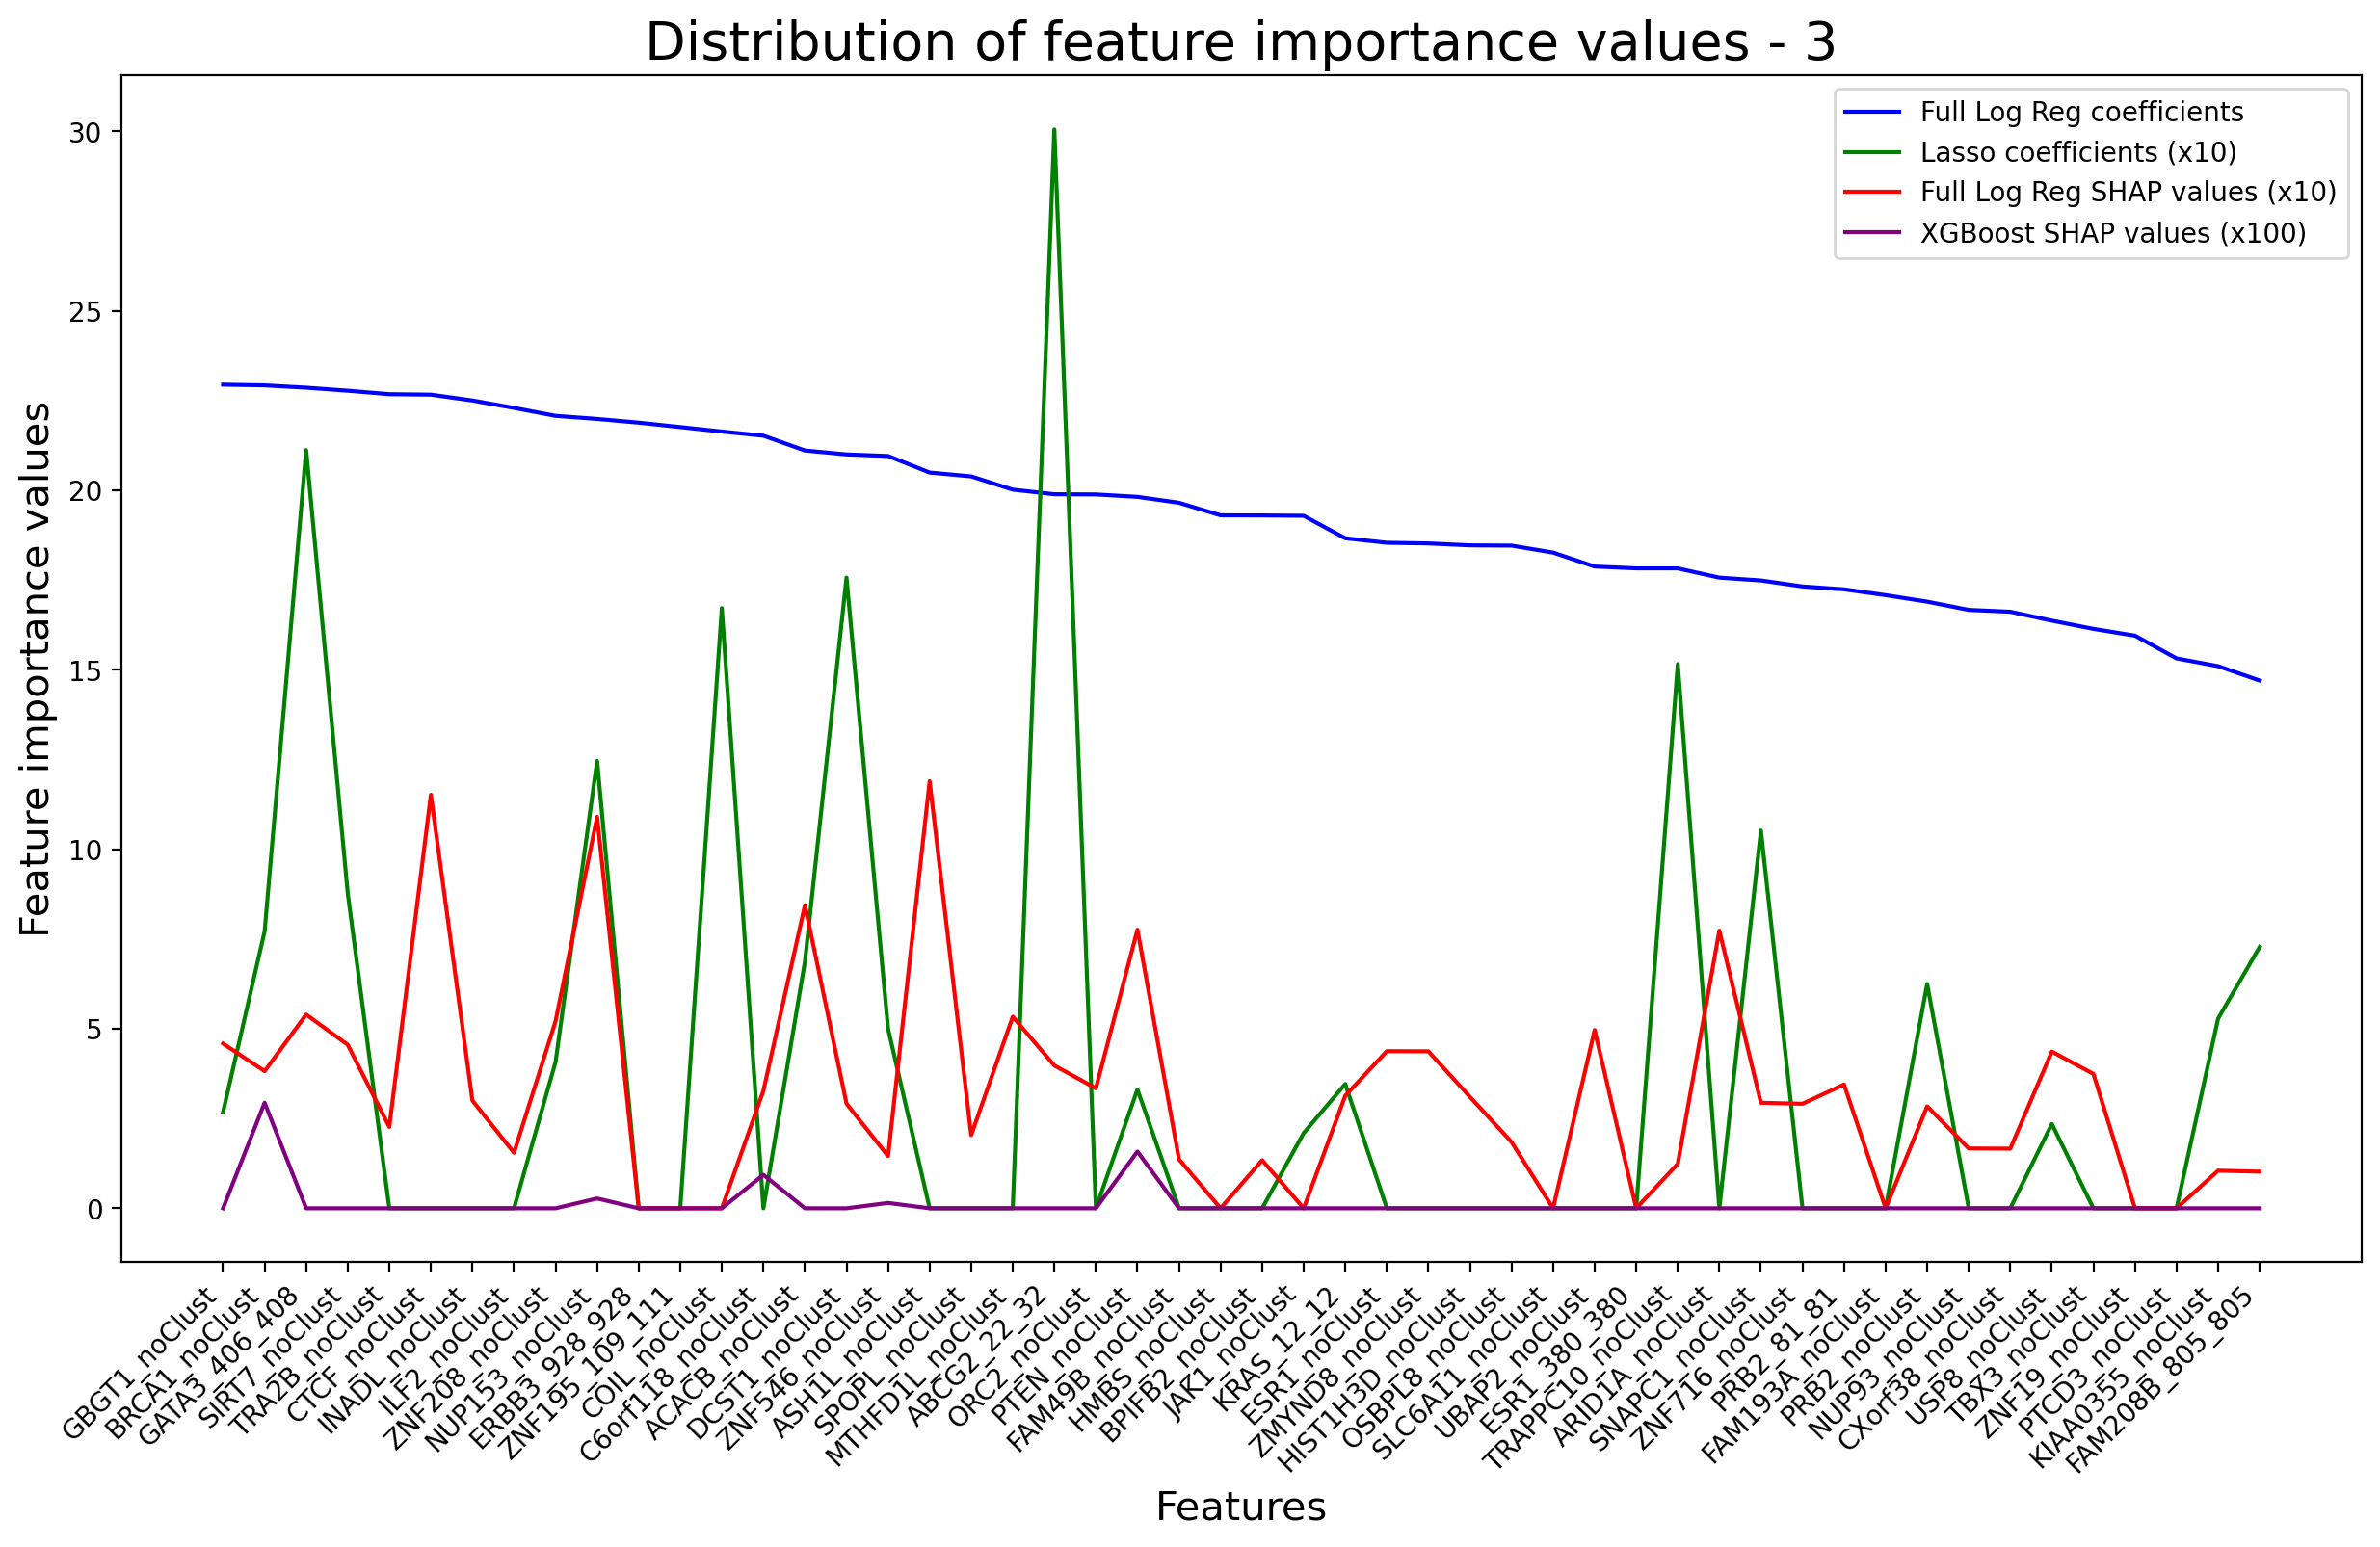

In [350]:
# third plot 
%config InlineBackend.figure_format = 'retina'
# Sample data for the four curves
coefficients_logreg_2 = sub_dataframes_logreg_coef_2[['Absolute Coefficient']].to_numpy()
coefficients_Lasso_2 = sub_dataframes_lasso_2[['Absolute Coefficient*10']].to_numpy()
shap_logreg_2 = sub_dataframes_logreg_shap_2[['feature_importance_vals*10']].to_numpy()
shap_xgboost_2 = sub_dataframes_xgb_shap_2[['feature_importance_vals*100']].to_numpy()

plt.rcParams['figure.figsize'] = (15, 8)

# Plotting all curves on the same figure
plt.plot(feature_2_list, coefficients_logreg_2, label='Full Log Reg coefficients', color='blue')
plt.plot(feature_2_list, coefficients_Lasso_2, label='Lasso coefficients (x10)', color='green')
plt.plot(feature_2_list, shap_logreg_2, label='Full Log Reg SHAP values (x10)', color='red')
plt.plot(feature_2_list, shap_xgboost_2, label='XGBoost SHAP values (x100)', color='purple')

# Labeling and legend
plt.xlabel("Features", fontsize=15)
plt.ylabel("Feature importance values", fontsize=15)
plt.title('Distribution of feature importance values - 3', fontsize=20)
plt.legend()

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

Text(0.5, 0, 'Features')

Text(0, 0.5, 'Feature importance values')

Text(0.5, 1.0, 'Distribution of feature importance values - 4')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 [Text(0, 0, 'SYBU_noClust'),
  Text(1, 0, 'KMT2E_noClust'),
  Text(2, 0, 'MAP3K1_noClust'),
  Text(3, 0, 'TSC1_noClust'),
  Text(4, 0, 'PIK3CA_102_113'),
  Text(5, 0, 'CDC73_noClust'),
  Text(6, 0, 'PKN2_noClust'),
  Text(7, 0, 'RAD54B_noClust'),
  Text(8, 0, 'NKX3-2_noClust'),
  Text(9, 0, 'SEC63_noClust'),
  Text(10, 0, 'PTEN_317_318'),
  Text(11, 0, 'MAML3_503_503'),
  Text(12, 0, 'CBFB_noClust'),
  Text(13, 0, 'FGFR2_noClust'),
  Text(14, 0, 'XPO4_noClust'),
  Text(15, 0, 'ZNF195_noClust'),
  Text(16, 0, 'KRTAP5-1_noClust'),
  Text(17, 0, 'FHDC1_57_57'),
  Text(18, 0, 'RBM27_719_719'),
  Text(19, 0, 'NUP93_14_15'),
  Text(20, 0, 'CDH1_noClust'),
  Text(21, 0, 'GNL3L_noClust'),
  Text(22, 0, 'PNN

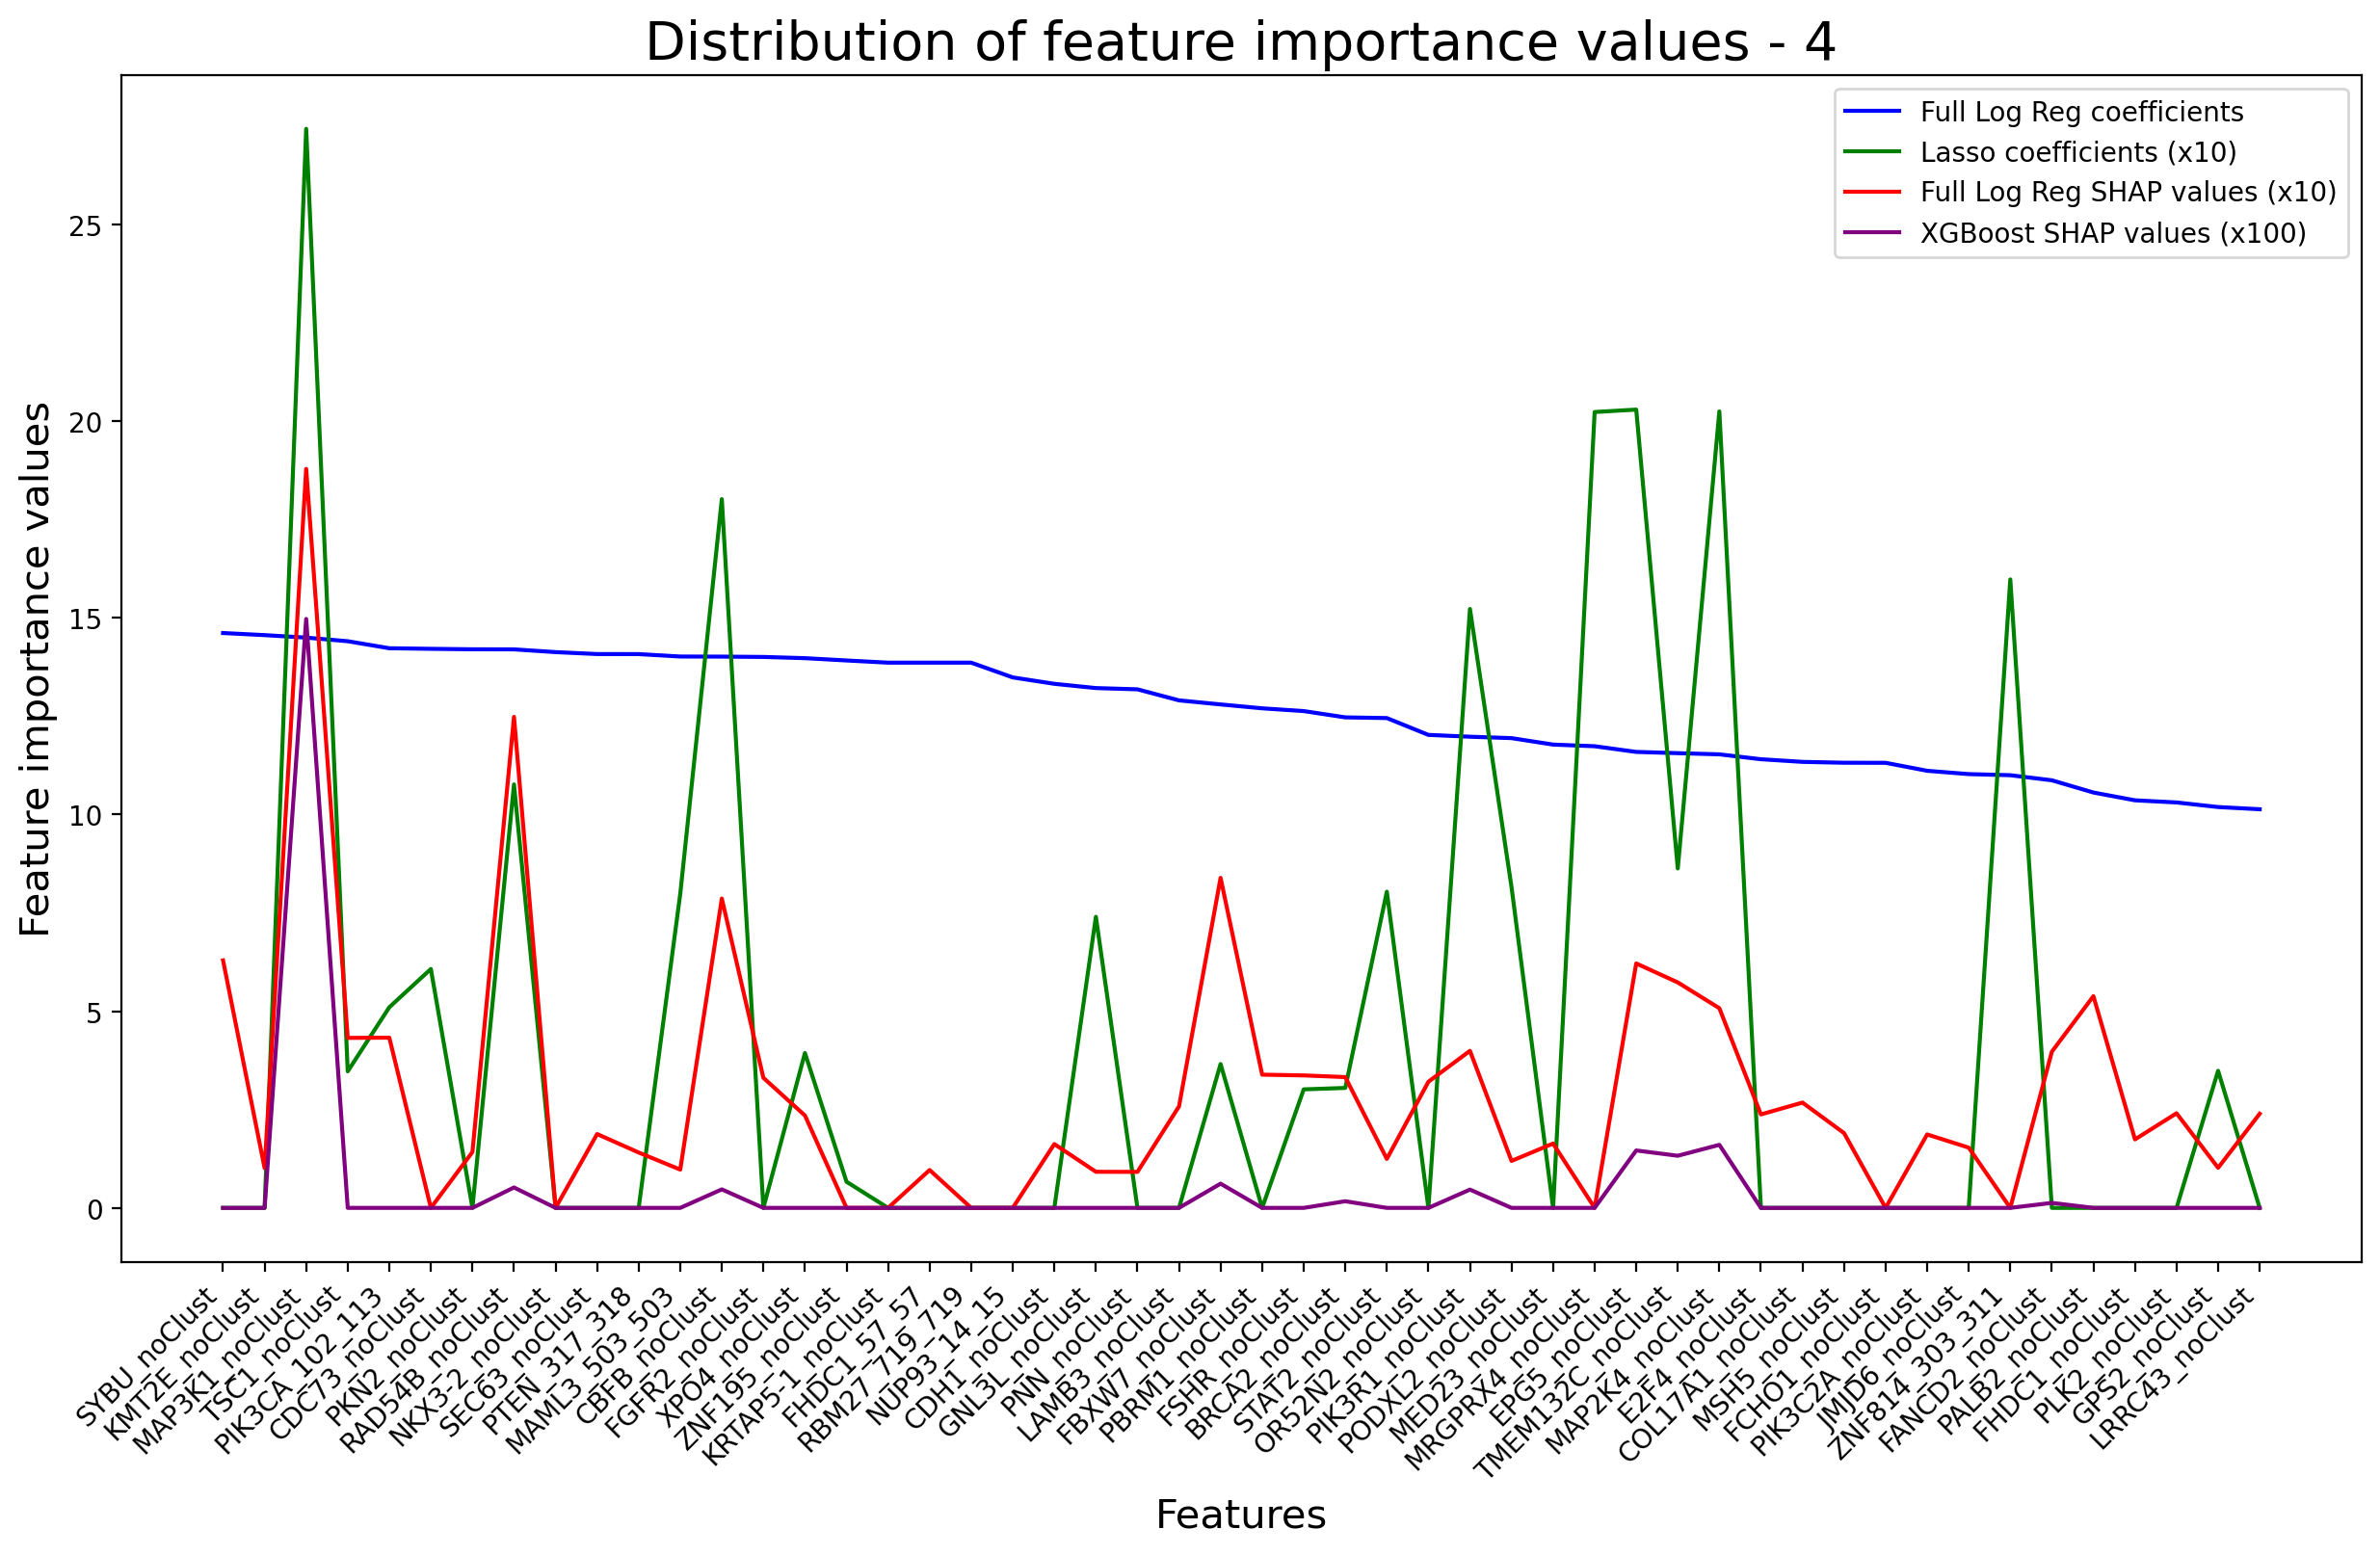

In [351]:
# fourth plot 
%config InlineBackend.figure_format = 'retina'
# Sample data for the four curves
coefficients_logreg_3 = sub_dataframes_logreg_coef_3[['Absolute Coefficient']].to_numpy()
coefficients_Lasso_3 = sub_dataframes_lasso_3[['Absolute Coefficient*10']].to_numpy()
shap_logreg_3 = sub_dataframes_logreg_shap_3[['feature_importance_vals*10']].to_numpy()
shap_xgboost_3 = sub_dataframes_xgb_shap_3[['feature_importance_vals*100']].to_numpy()

plt.rcParams['figure.figsize'] = (15, 8)

# Plotting all curves on the same figure
plt.plot(feature_3_list, coefficients_logreg_3, label='Full Log Reg coefficients', color='blue')
plt.plot(feature_3_list, coefficients_Lasso_3, label='Lasso coefficients (x10)', color='green')
plt.plot(feature_3_list, shap_logreg_3, label='Full Log Reg SHAP values (x10)', color='red')
plt.plot(feature_3_list, shap_xgboost_3, label='XGBoost SHAP values (x100)', color='purple')

# Labeling and legend
plt.xlabel("Features", fontsize=15)
plt.ylabel("Feature importance values", fontsize=15)
plt.title('Distribution of feature importance values - 4', fontsize=20)
plt.legend()

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

Text(0.5, 0, 'Features')

Text(0, 0.5, 'Feature importance values')

Text(0.5, 1.0, 'Distribution of feature importance values - 5')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 [Text(0, 0, 'CEP152_noClust'),
  Text(1, 0, 'TRAPPC12_noClust'),
  Text(2, 0, 'ZW10_noClust'),
  Text(3, 0, 'NCOR1_noClust'),
  Text(4, 0, 'PODXL_noClust'),
  Text(5, 0, 'CDKN2A_noClust'),
  Text(6, 0, 'ATP8B1_noClust'),
  Text(7, 0, 'NCOA6_noClust'),
  Text(8, 0, 'KIF1B_noClust'),
  Text(9, 0, 'KRT6B_noClust'),
  Text(10, 0, 'TSSK3_noClust'),
  Text(11, 0, 'ANKRD37_noClust'),
  Text(12, 0, 'IL25_noClust'),
  Text(13, 0, 'IL31RA_noClust'),
  Text(14, 0, 'RGS11_noClust'),
  Text(15, 0, 'PLA2G4D_noClust'),
  Text(16, 0, 'TNC_noClust'),
  Text(17, 0, 'OSBPL1A_noClust'),
  Text(18, 0, 'MAP4K1_noClust'),
  Text(19, 0, 'HPD_noClust'),
  Text(20, 0, 'CCT6B_noClust'),
  Text(21, 0, 'B2M_noClust'),
  Text(22

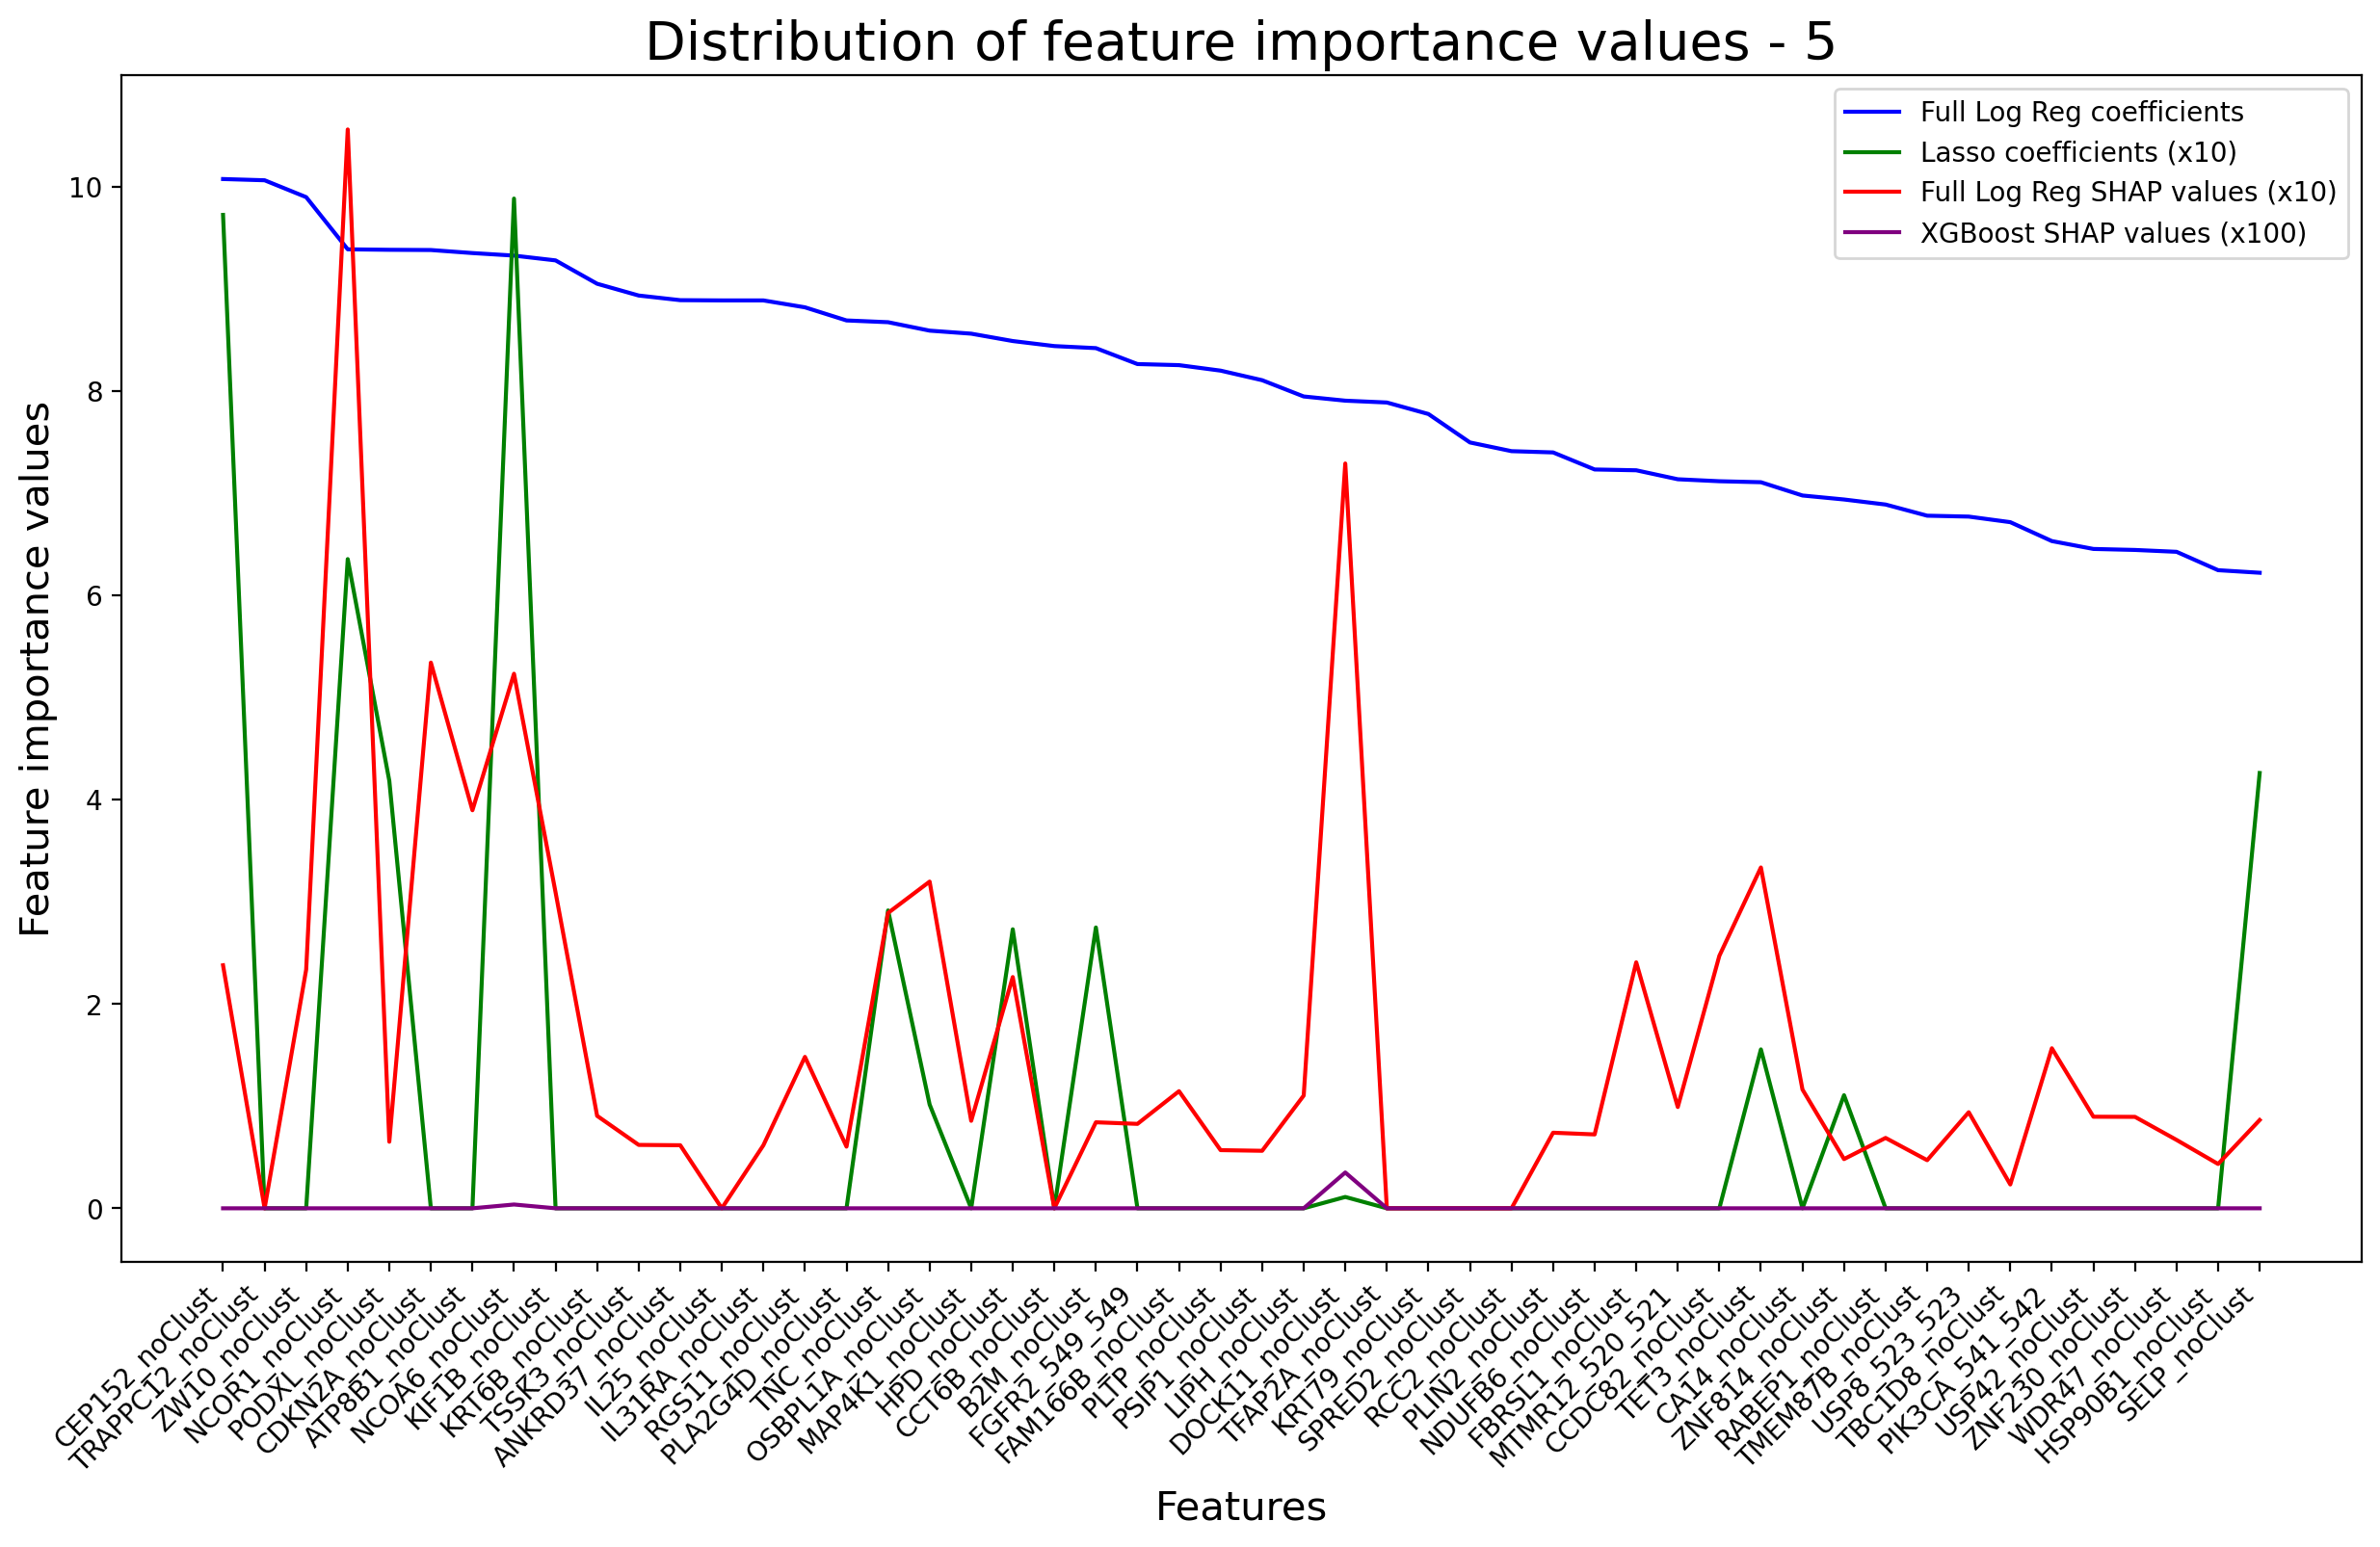

In [352]:
# fifth plot 
%config InlineBackend.figure_format = 'retina'
# Sample data for the four curves
coefficients_logreg_4 = sub_dataframes_logreg_coef_4[['Absolute Coefficient']].to_numpy()
coefficients_Lasso_4 = sub_dataframes_lasso_4[['Absolute Coefficient*10']].to_numpy()
shap_logreg_4 = sub_dataframes_logreg_shap_4[['feature_importance_vals*10']].to_numpy()
shap_xgboost_4 = sub_dataframes_xgb_shap_4[['feature_importance_vals*100']].to_numpy()

plt.rcParams['figure.figsize'] = (15, 8)

# Plotting all curves on the same figure
plt.plot(feature_4_list, coefficients_logreg_4, label='Full Log Reg coefficients', color='blue')
plt.plot(feature_4_list, coefficients_Lasso_4, label='Lasso coefficients (x10)', color='green')
plt.plot(feature_4_list, shap_logreg_4, label='Full Log Reg SHAP values (x10)', color='red')
plt.plot(feature_4_list, shap_xgboost_4, label='XGBoost SHAP values (x100)', color='purple')

# Labeling and legend
plt.xlabel("Features", fontsize=15)
plt.ylabel("Feature importance values", fontsize=15)
plt.title('Distribution of feature importance values - 5', fontsize=20)
plt.legend()

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

Text(0.5, 0, 'Features')

Text(0, 0.5, 'Feature importance values')

Text(0.5, 1.0, 'Distribution of feature importance values - 6')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 [Text(0, 0, 'RPL5_noClust'),
  Text(1, 0, 'LRRC16B_noClust'),
  Text(2, 0, 'ATG4C_noClust'),
  Text(3, 0, 'USP15_noClust'),
  Text(4, 0, 'GLT6D1_noClust'),
  Text(5, 0, 'SLC28A2_noClust'),
  Text(6, 0, 'MTHFD1_noClust'),
  Text(7, 0, 'FABP1_noClust'),
  Text(8, 0, 'KLF4_noClust'),
  Text(9, 0, 'FAM193A_1170_1214'),
  Text(10, 0, 'RBM27_noClust'),
  Text(11, 0, 'SF3B1_noClust'),
  Text(12, 0, 'SLC26A9_noClust'),
  Text(13, 0, 'TYRP1_noClust'),
  Text(14, 0, 'GARNL3_noClust'),
  Text(15, 0, 'CAPN2_noClust'),
  Text(16, 0, 'MATN4_noClust'),
  Text(17, 0, 'SUPT16H_noClust'),
  Text(18, 0, 'IBSP_noClust'),
  Text(19, 0, 'SP3_noClust'),
  Text(20, 0, 'TSC22D1_noClust'),
  Text(21, 0, 'GATA3_429_434'),
  T

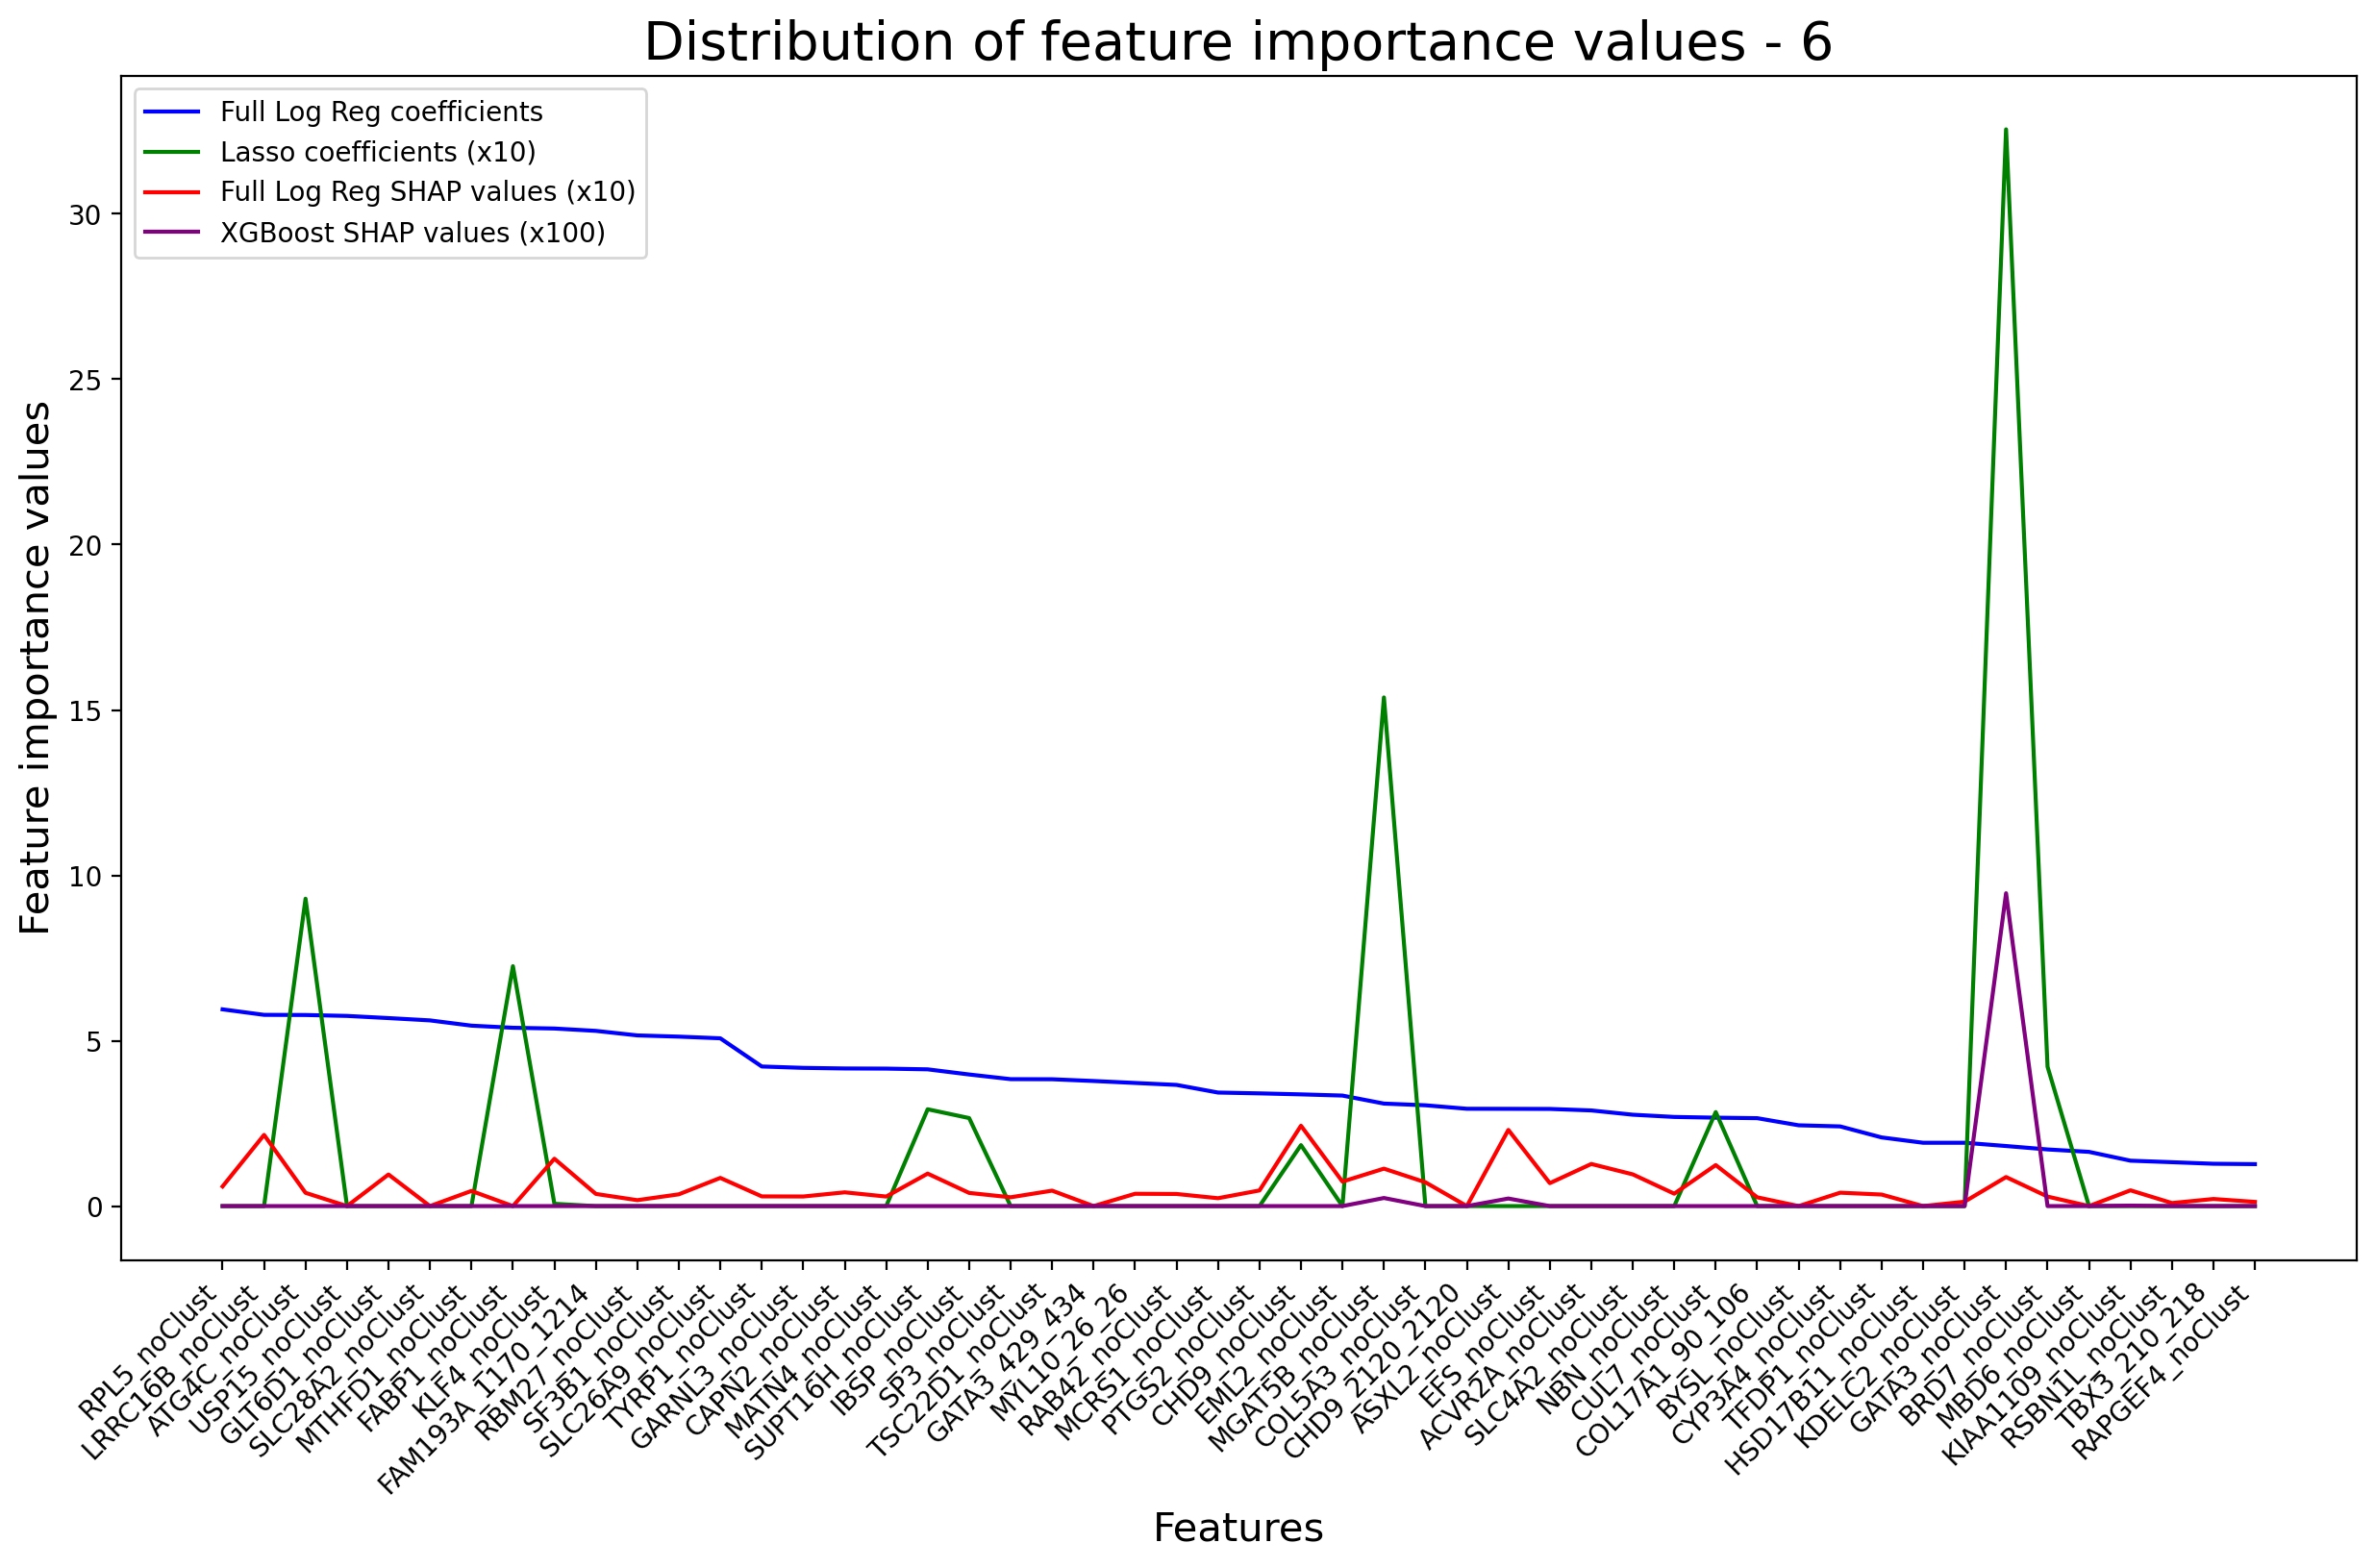

In [353]:
# sixth plot 
%config InlineBackend.figure_format = 'retina'
# Sample data for the four curves
coefficients_logreg_5 = sub_dataframes_logreg_coef_5[['Absolute Coefficient']].to_numpy()
coefficients_Lasso_5 = sub_dataframes_lasso_5[['Absolute Coefficient*10']].to_numpy()
shap_logreg_5 = sub_dataframes_logreg_shap_5[['feature_importance_vals*10']].to_numpy()
shap_xgboost_5 = sub_dataframes_xgb_shap_5[['feature_importance_vals*100']].to_numpy()

plt.rcParams['figure.figsize'] = (15, 8)

# Plotting all curves on the same figure
plt.plot(feature_5_list, coefficients_logreg_5, label='Full Log Reg coefficients', color='blue')
plt.plot(feature_5_list, coefficients_Lasso_5, label='Lasso coefficients (x10)', color='green')
plt.plot(feature_5_list, shap_logreg_5, label='Full Log Reg SHAP values (x10)', color='red')
plt.plot(feature_5_list, shap_xgboost_5, label='XGBoost SHAP values (x100)', color='purple')

# Labeling and legend
plt.xlabel("Features", fontsize=15)
plt.ylabel("Feature importance values", fontsize=15)
plt.title('Distribution of feature importance values - 6', fontsize=20)
plt.legend()

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

Text(0.5, 0, 'Features')

Text(0, 0.5, 'Feature importance values')

Text(0.5, 1.0, 'Distribution of feature importance values - 7')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48],
 [Text(0, 0, 'LINGO3_noClust'),
  Text(1, 0, 'SAMD14_noClust'),
  Text(2, 0, 'SF3B1_700_700'),
  Text(3, 0, 'ZKSCAN1_270_270'),
  Text(4, 0, 'DIAPH1_noClust'),
  Text(5, 0, 'ARRDC1_noClust'),
  Text(6, 0, 'AKR1C3_noClust'),
  Text(7, 0, 'SLC45A1_noClust'),
  Text(8, 0, 'ITPR3_noClust'),
  Text(9, 0, 'ZNF208_548_549'),
  Text(10, 0, 'GRB10_noClust'),
  Text(11, 0, 'MEN1_noClust'),
  Text(12, 0, 'EPHX3_noClust'),
  Text(13, 0, 'SF3B4_noClust'),
  Text(14, 0, 'OR4D10_noClust'),
  Text(15, 0, 'ZFHX3_noClust'),
  Text(16, 0, 'MAML3_noClust'),
  Text(17, 0, 'ATL3_noClust'),
  Text(18, 0, 'PEX11G_noClust'),
  Text(19, 0, 'EML5_noClust'),
  Text(20, 0, 'PIK3CA_418_420'),
  Text(21, 0, 'COL2A1_noClust'),
  Text(22,

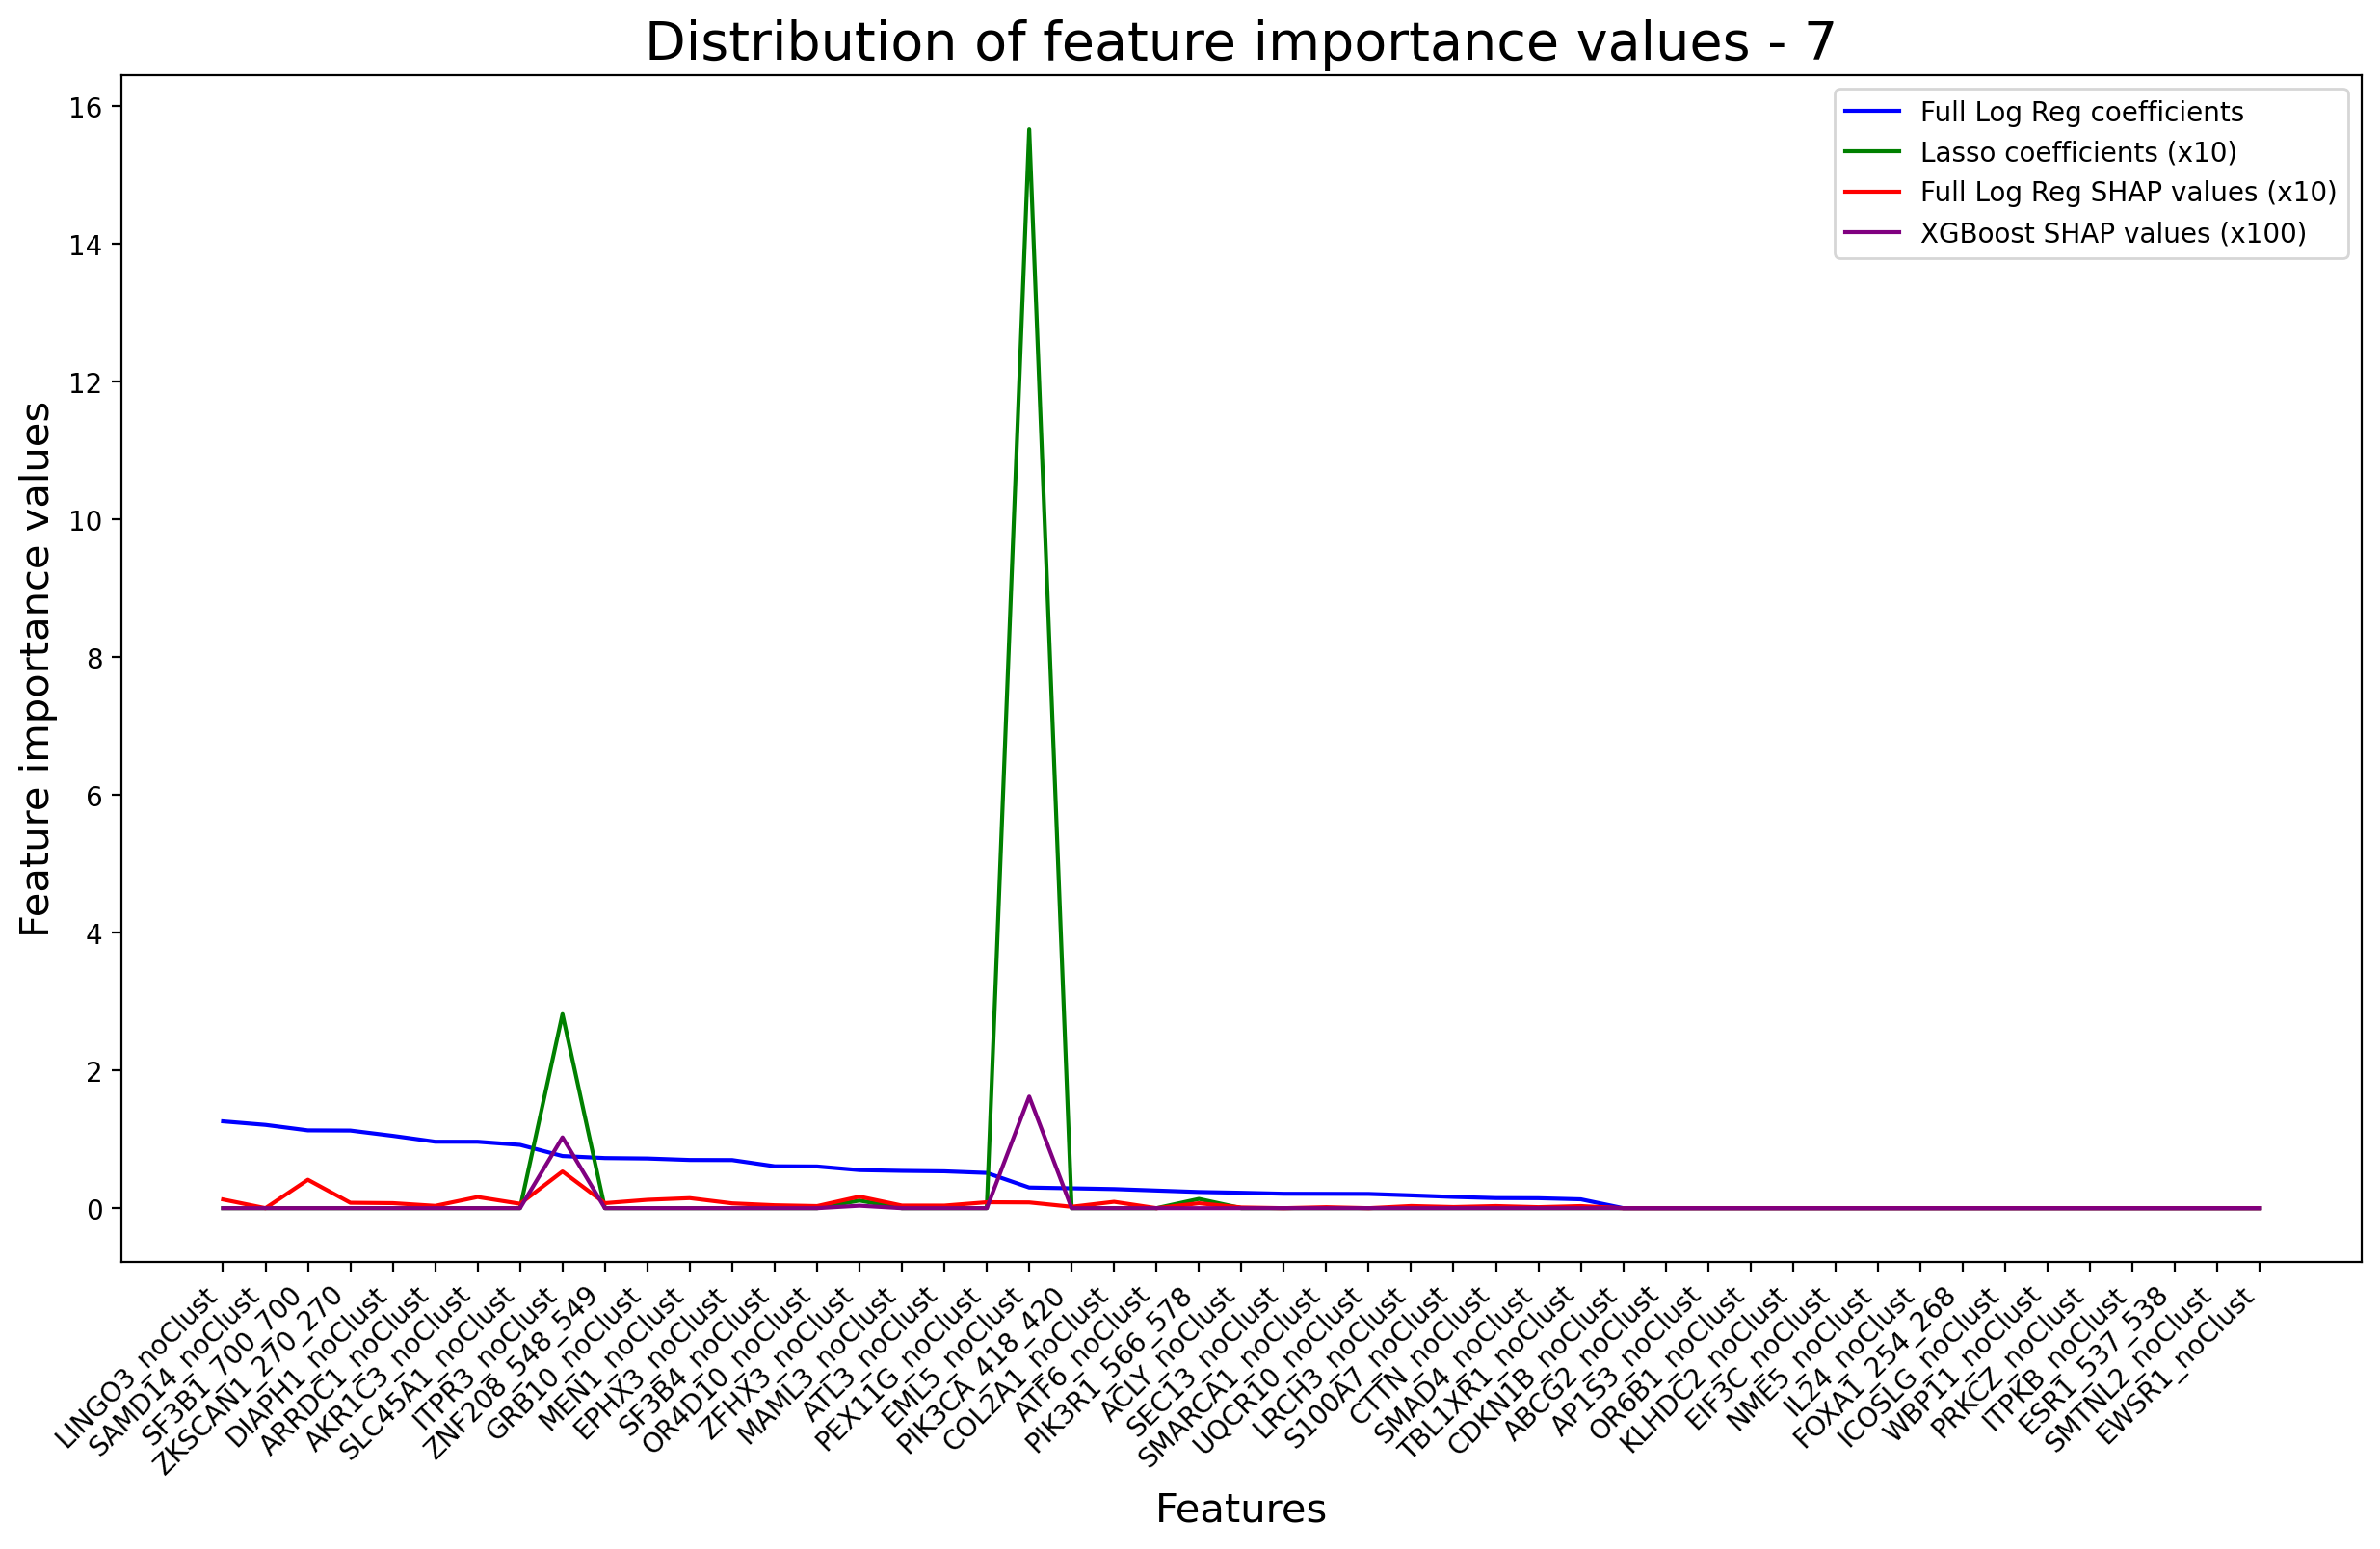

In [354]:
# seventh plot 
%config InlineBackend.figure_format = 'retina'
# Sample data for the four curves
coefficients_logreg_6 = sub_dataframes_logreg_coef_6[['Absolute Coefficient']].to_numpy()
coefficients_Lasso_6 = sub_dataframes_lasso_6[['Absolute Coefficient*10']].to_numpy()
shap_logreg_6 = sub_dataframes_logreg_shap_6[['feature_importance_vals*10']].to_numpy()
shap_xgboost_6 = sub_dataframes_xgb_shap_6[['feature_importance_vals*100']].to_numpy()

plt.rcParams['figure.figsize'] = (15, 8)

# Plotting all curves on the same figure
plt.plot(feature_6_list, coefficients_logreg_6, label='Full Log Reg coefficients', color='blue')
plt.plot(feature_6_list, coefficients_Lasso_6, label='Lasso coefficients (x10)', color='green')
plt.plot(feature_6_list, shap_logreg_6, label='Full Log Reg SHAP values (x10)', color='red')
plt.plot(feature_6_list, shap_xgboost_6, label='XGBoost SHAP values (x100)', color='purple')

# Labeling and legend
plt.xlabel("Features", fontsize=15)
plt.ylabel("Feature importance values", fontsize=15)
plt.title('Distribution of feature importance values - 7', fontsize=20)
plt.legend()

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

In [141]:
import scipy.stats

# Example data (unordered arrays)
x = [5, 1, 3, 2, 4]
y = [4, 3, 5, 1, 2]

# Calculate Spearman correlation coefficient and p-value
rho, p_value = scipy.stats.spearmanr(x, y)

print(f"Spearman correlation coefficient: {rho}")
print(f"P-value: {p_value}")

Spearman correlation coefficient: 0.3
P-value: 0.6238376647810728


In [143]:
import scipy.stats

# Example data (unordered arrays)
x = [5, 1, 3, 2, 4]
y = [5, 1, 3, 2, 4]

# Calculate Spearman correlation coefficient and p-value
rho, p_value = scipy.stats.spearmanr(x, y)

print(f"Spearman correlation coefficient: {rho}")
print(f"P-value: {p_value}")

Spearman correlation coefficient: 0.9999999999999999
P-value: 1.4042654220543672e-24


NameError: name 'dtype' is not defined